
# Walmart_Weekly_Sales_Linear_Regression_Analysis

**Let's Do Some Real "Work"**

We are creating this Notebook to illustrate that how you can "Approach almost any Regression Problem" 

**A Comprehensive Checklist for Solving Any Regression Problem:**

* Data Fetching
* Understanding the Data
* Checking the Skwewness of the Output Variable
* Performing Log Transformation (if required)
* Exploratory Data Analysis
* Analysing Correlation
* Finding out Important Predictors
* Feature Engineering: -
     1. Missing Values
     2. Outliers
     3. Categorical Feature Encoding     
* Creating Folds and Defining Fold Map
* Defining Models
* Fitting the Model and Running Cross Validation
* Stacking and Ensembling
* Hyperparameter Optimization

The above mentioned checklist is very important for solving any regression based problem. The similar kind of checklist can also be prepared for other Machine Learning based problems.

Let's begin!


# IMPORTING LIBRARIES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline

# import some of the necessary libraries

In [3]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
import seaborn as sns
sns.set(rc={'figure.figsize':(15,12)})
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from scipy import stats
from scipy.stats import norm 
import warnings 
warnings.filterwarnings('ignore') #ignore warnings
%matplotlib inline
import gc
import datetime as dt

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.formula.api as sm

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import os

# EDA

In [8]:
#Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from scipy import stats
from scipy.stats import norm 
import warnings 
warnings.filterwarnings('ignore') #ignore warnings

%matplotlib inline
import gc
import datetime as dt

In [9]:
train = pd.read_csv("D:\\Wallmart\\train.csv", parse_dates=["Date"])
train

Store  Dept       Date  Weekly_Sales  IsHoliday
0           1     1 2010-02-05      24924.50      False
1           1     1 2010-02-12      46039.49       True
2           1     1 2010-02-19      41595.55      False
3           1     1 2010-02-26      19403.54      False
4           1     1 2010-03-05      21827.90      False
...       ...   ...        ...           ...        ...
421565     45    98 2012-09-28        508.37      False
421566     45    98 2012-10-05        628.10      False
421567     45    98 2012-10-12       1061.02      False
421568     45    98 2012-10-19        760.01      False
421569     45    98 2012-10-26       1076.80      False

[421570 rows x 5 columns]

In [10]:
test = pd.read_csv("D:\\Wallmart\\test.csv", parse_dates=["Date"])
test

Store  Dept       Date  IsHoliday
0           1     1 2012-11-02      False
1           1     1 2012-11-09      False
2           1     1 2012-11-16      False
3           1     1 2012-11-23       True
4           1     1 2012-11-30      False
...       ...   ...        ...        ...
115059     45    98 2013-06-28      False
115060     45    98 2013-07-05      False
115061     45    98 2013-07-12      False
115062     45    98 2013-07-19      False
115063     45    98 2013-07-26      False

[115064 rows x 4 columns]

In [11]:
stores=pd.read_csv("D:\\Wallmart\\stores.csv")
stores

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [12]:
features = pd.read_csv("D:\\Wallmart\\features.csv")
features

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1   2/5/2010        42.31       2.572        NaN        NaN   
1         1  2/12/2010        38.51       2.548        NaN        NaN   
2         1  2/19/2010        39.93       2.514        NaN        NaN   
3         1  2/26/2010        46.63       2.561        NaN        NaN   
4         1   3/5/2010        46.50       2.625        NaN        NaN   
...     ...        ...          ...         ...        ...        ...   
8185     45  6/28/2013        76.05       3.639    4842.29     975.03   
8186     45   7/5/2013        77.50       3.614    9090.48    2268.58   
8187     45  7/12/2013        79.37       3.614    3789.94    1827.31   
8188     45  7/19/2013        82.84       3.737    2961.49    1047.07   
8189     45  7/26/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [13]:
print("the structure of train data is ", train.shape)
print("the structure of test  data is ", test.shape)
print("the ratio of train data : test data is ", (round(train.shape[0]*100/(train.shape[0]+test.shape[0])),100-round(train.shape[0]*100/(train.shape[0]+test.shape[0]))))

the structure of train data is  (421570, 5)
the structure of test  data is  (115064, 4)
the ratio of train data : test data is  (79, 21)


In [14]:
train=train.merge(stores, on='Store', how='left')
train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size
0      1     1 2010-02-05      24924.50      False    A  151315
1      1     1 2010-02-12      46039.49       True    A  151315
2      1     1 2010-02-19      41595.55      False    A  151315
3      1     1 2010-02-26      19403.54      False    A  151315
4      1     1 2010-03-05      21827.90      False    A  151315

# Year / Month / Week / Days / passed days are extracted from 'Date' column

In [15]:
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Week']=train['Date'].dt.week
train['Day']=train['Date'].dt.day
train['n_days']=(train['Date'].dt.date-train['Date'].dt.date.min()).apply(lambda x:x.days)

In [16]:
Year=pd.Series(train['Year'].unique())
Week=pd.Series(train['Week'].unique())
Month=pd.Series(train['Month'].unique())
Day=pd.Series(train['Day'].unique())
n_days=pd.Series(train['n_days'].unique())

In [17]:
Year

0    2010
1    2011
2    2012
dtype: int64

In [18]:
Week

0      5
1      6
2      7
3      8
4      9
5     10
6     11
7     12
8     13
9     14
10    15
11    16
12    17
13    18
14    19
15    20
16    21
17    22
18    23
19    24
20    25
21    26
22    27
23    28
24    29
25    30
26    31
27    32
28    33
29    34
30    35
31    36
32    37
33    38
34    39
35    40
36    41
37    42
38    43
39    44
40    45
41    46
42    47
43    48
44    49
45    50
46    51
47    52
48     1
49     2
50     3
51     4
dtype: int64

In [19]:
Month

0      2
1      3
2      4
3      5
4      6
5      7
6      8
7      9
8     10
9     11
10    12
11     1
dtype: int64

In [20]:
Day

0      5
1     12
2     19
3     26
4      2
5      9
6     16
7     23
8     30
9      7
10    14
11    21
12    28
13     4
14    11
15    18
16    25
17     6
18    13
19    20
20    27
21     3
22    10
23    17
24    24
25     1
26     8
27    15
28    22
29    29
30    31
dtype: int64

n_days

**Stores table consists of three columns
1.store ID, 2. store type, 3. store size.
A, B, and C are the types of stores and total 45 Walmart stores are selling goods to customers**

In [21]:
print("the shape of stores data set is", stores.shape)
print("the unique value of store is", stores['Store'].unique())
print("the unique value of Type is", stores['Type'].unique())

the shape of stores data set is (45, 3)
the unique value of store is [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
the unique value of Type is ['A' 'B' 'C']


**Let's make a pie chart to show the ratio of A, B, and C types of total 45 Walmart stores.
First, let's group data by type of stores and see the descriptive figures**

In [22]:
print(stores.head())
grouped=stores.groupby('Type')
print(grouped.describe()['Size'].round(2))

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
      count       mean       std      min        25%       50%       75%  \
Type                                                                       
A      22.0  177247.73  49392.62  39690.0  155840.75  202406.0  203819.0   
B      17.0  101190.71  32371.14  34875.0   93188.00  114533.0  123737.0   
C       6.0   40541.67   1304.15  39690.0   39745.00   39910.0   40774.0   

           max  
Type            
A     219622.0  
B     140167.0  
C      42988.0  


In [23]:
grouped

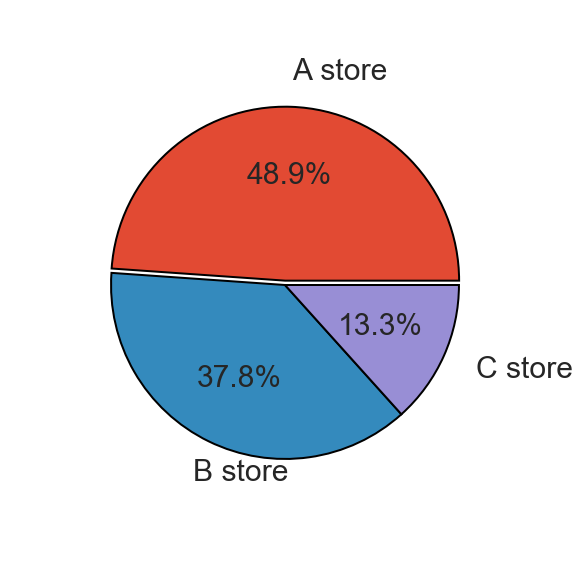

In [24]:
plt.style.use('ggplot')
labels=['A store','B store','C store']
sizes=grouped.describe()['Size'].round(1)
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100] # convert to the proportion


fig, axes = plt.subplots(1,1, figsize=(10,10))

wprops={'edgecolor':'black',
      'linewidth':2}

tprops = {'fontsize':30}


axes.pie(sizes,
        labels=labels,
        explode=(0.02,0,0),
        autopct='%1.1f%%',
        pctdistance=0.6,
        labeldistance=1.2,
        wedgeprops=wprops,
        textprops=tprops,
        radius=0.8,
        center=(0.5,0.5))
plt.show()

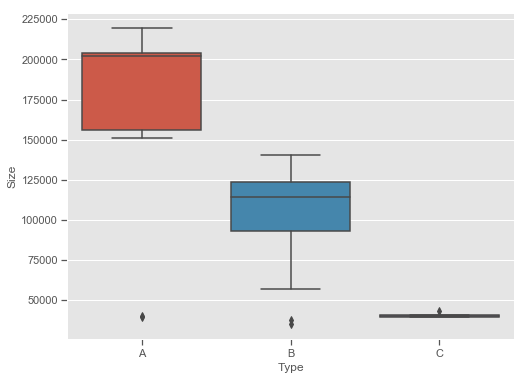

In [25]:
data = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=data)

**Assumption 1 is correct. By boxplot, we can infer that type A store is the largest store and C is the smallest
Even more, there is no overlapped area in size among A, B, and C. Type is the best predictor for Size
To check assumption 2, boxplot showing relation between sales and type is made**

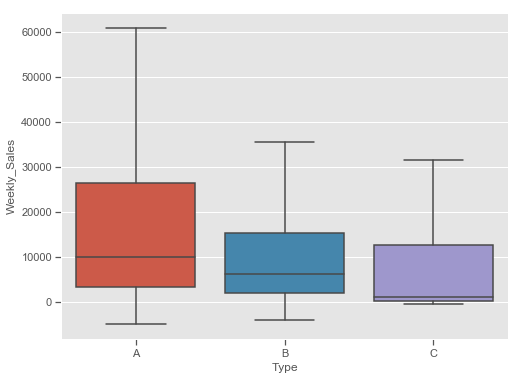

In [26]:
data = pd.concat([train['Type'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=data, showfliers=False)

**The median of A is the highest and C is the lowest.
That means stores with more sizes have higher sales record (The order of median of size and median of sales is the same)**

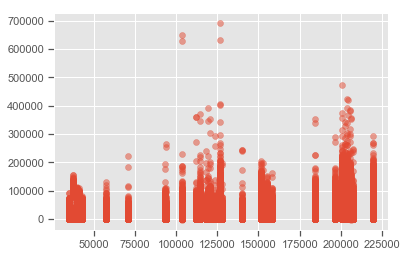

In [27]:
plt.style.use('ggplot')

fig=plt.figure()
ax=fig.add_subplot(111)

ax.scatter(train['Size'],train['Weekly_Sales'], alpha=0.5)

plt.show()

**The result is not so good. There can be no distinct relation between size and sales.
It seems a bit linear.
To make it more clear, facet data with store type (A, B, C)**

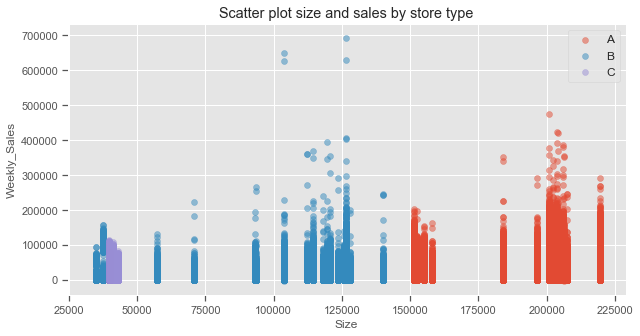

In [28]:
types=stores['Type'].unique()

plt.style.use('ggplot')

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)

for t in types:
    x=train.loc[train['Type']==t, 'Size']
    y=train.loc[train['Type']==t, 'Weekly_Sales']
    
    ax.scatter(x,y,alpha=0.5, label=t)

ax.set_title('Scatter plot size and sales by store type')
ax.set_xlabel('Size')
ax.set_ylabel('Weekly_Sales')

ax.legend(loc='higher right',fontsize=12)

plt.show()

**Faceting type gives no additional information except the relation between size and type**

In [29]:
train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Year  Month  \
0      1     1 2010-02-05      24924.50      False    A  151315  2010      2   
1      1     1 2010-02-12      46039.49       True    A  151315  2010      2   
2      1     1 2010-02-19      41595.55      False    A  151315  2010      2   
3      1     1 2010-02-26      19403.54      False    A  151315  2010      2   
4      1     1 2010-03-05      21827.90      False    A  151315  2010      3   

   Week  Day  n_days  
0     5    5       0  
1     6   12       7  
2     7   19      14  
3     8   26      21  
4     9    5      28

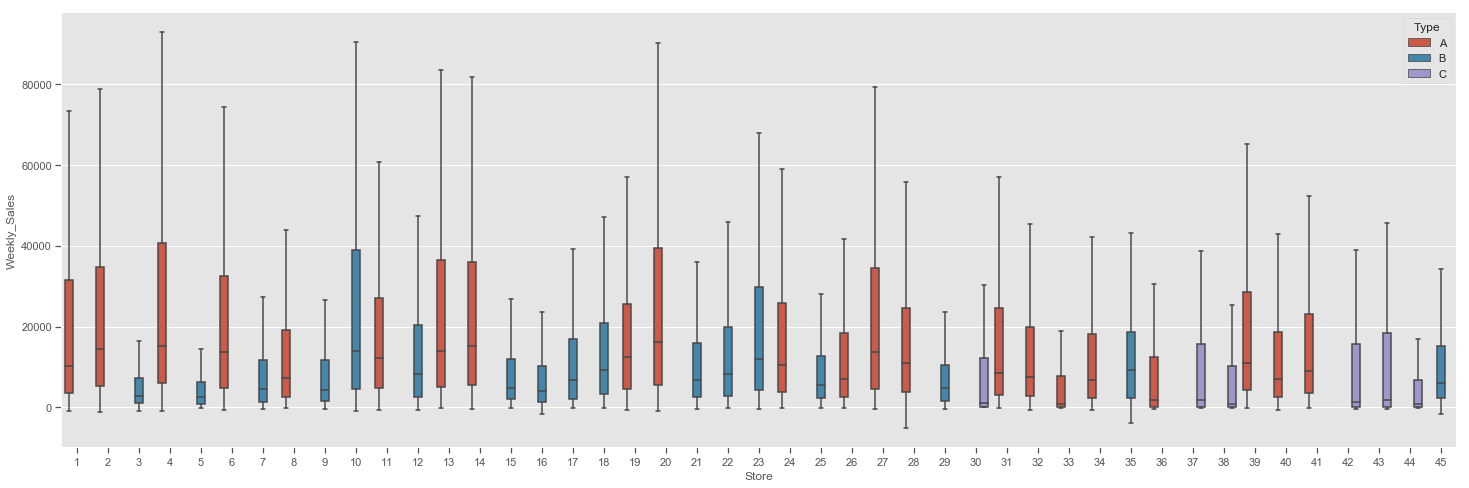

In [30]:
data = pd.concat([train['Store'], train['Weekly_Sales'], train['Type']], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data, showfliers=False, hue="Type")

**Store can be the variable giving information on sales.
But store is including much intrinsic information of type, size, and department**

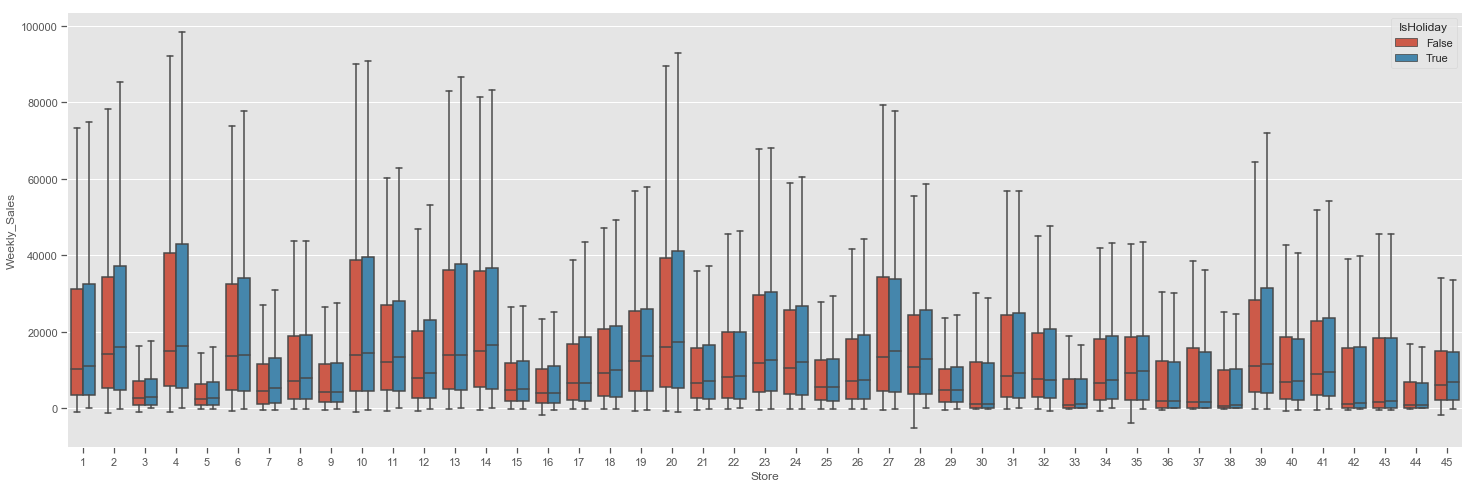

In [31]:
data = pd.concat([train['Store'], train['Weekly_Sales'], train['IsHoliday']], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data, showfliers=False, hue="IsHoliday")

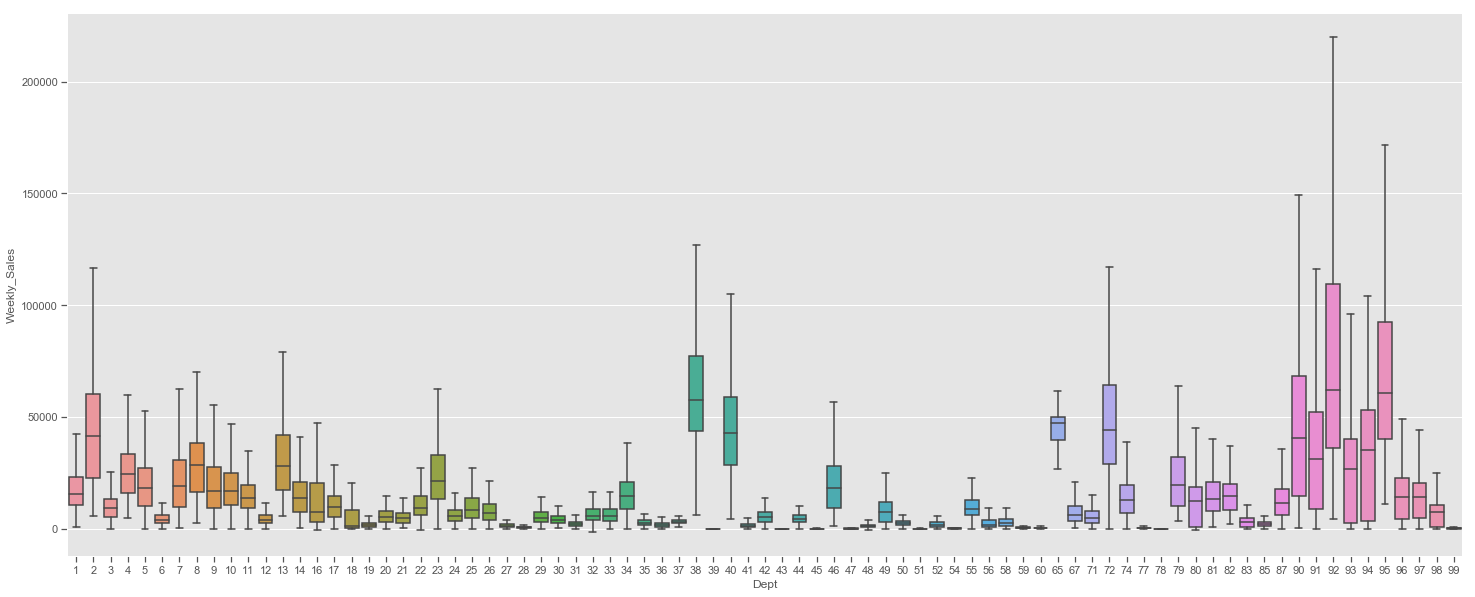

In [32]:
data = pd.concat([train['Dept'], train['Weekly_Sales'], train['Type']], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=data, showfliers=False)

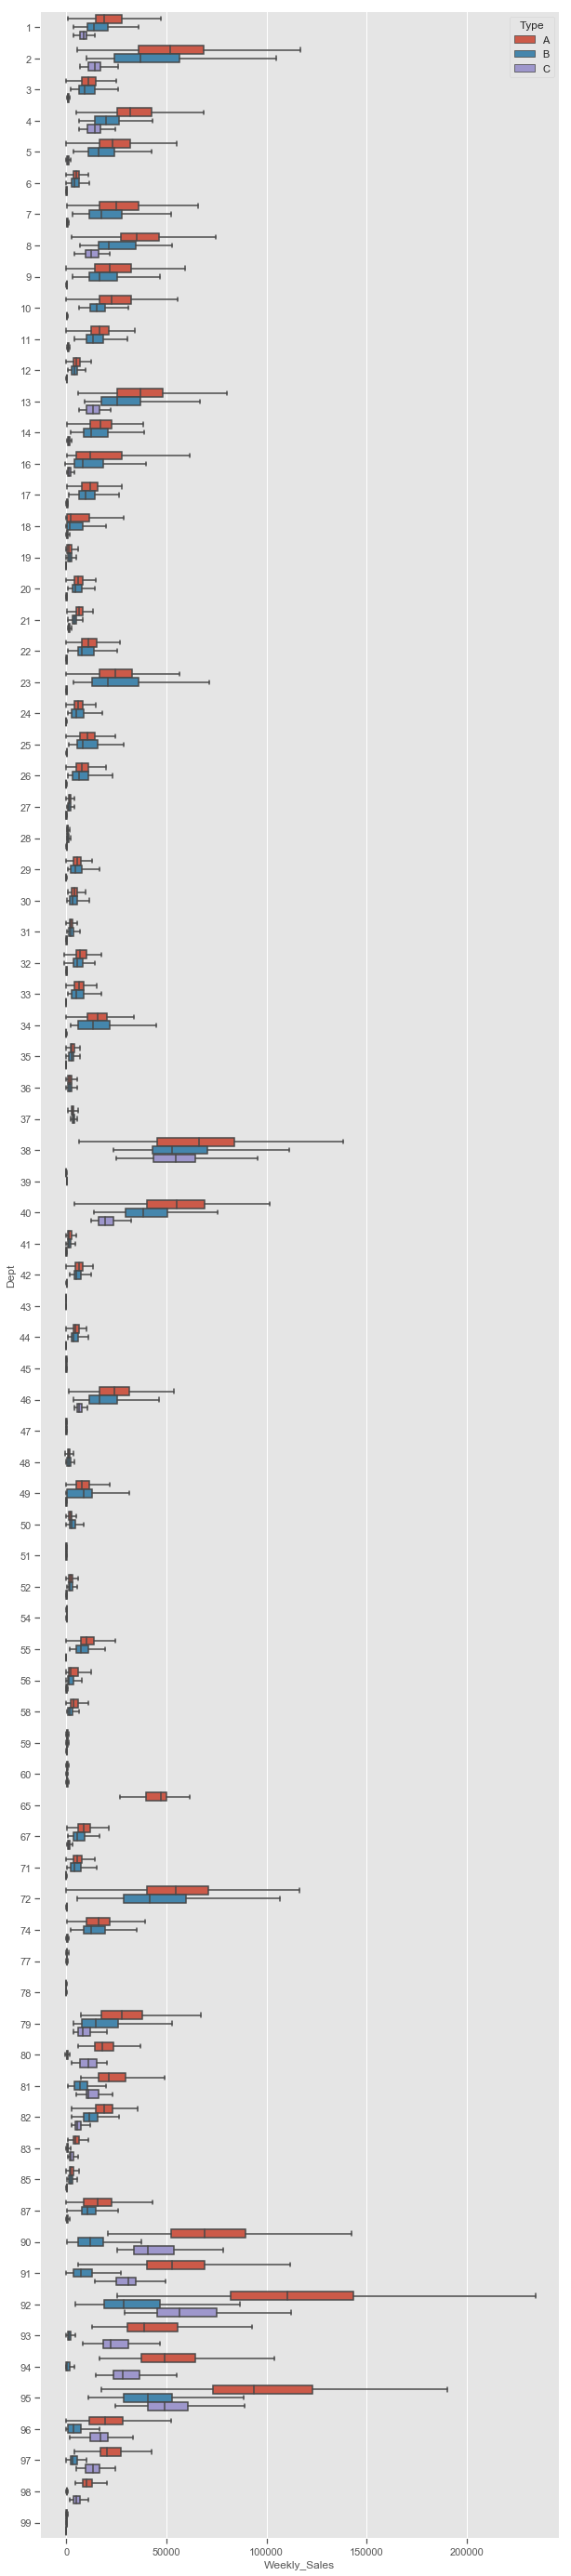

In [33]:
data = pd.concat([train['Dept'], train['Weekly_Sales'], train['Type']], axis=1)
f, ax = plt.subplots(figsize=(10, 50))
fig = sns.boxplot(y='Dept', x='Weekly_Sales', data=data, showfliers=False, hue="Type",orient="h") 

**Each department shows the different level of sales.
Department may be the powerful variable to predict sales.
When department and type of store are considered together, generally department in A type shows the highest sales record.
Assumption 4: Type and department may have the interaction effect.**

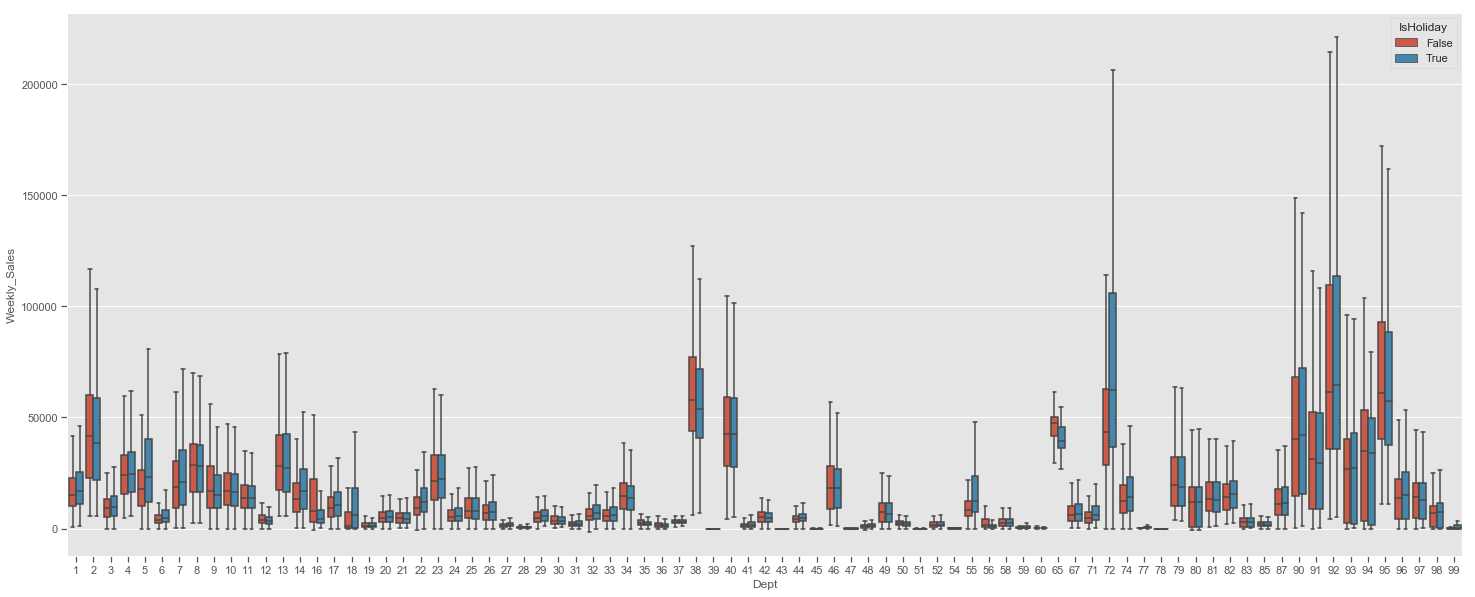

In [34]:
data = pd.concat([train['Dept'], train['Weekly_Sales'], train['IsHoliday']], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=data, showfliers=False, hue="IsHoliday")

**Unlike store and holiday relation, department and holiday do not explain any relation.
72 department shows the highest surge in sales during holiday.
However others don't and even more in some dopartments non-holidays' sales is higher.
That means the character of product (department) is different relation with sales.**

In [35]:
train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Year  Month  \
0      1     1 2010-02-05      24924.50      False    A  151315  2010      2   
1      1     1 2010-02-12      46039.49       True    A  151315  2010      2   
2      1     1 2010-02-19      41595.55      False    A  151315  2010      2   
3      1     1 2010-02-26      19403.54      False    A  151315  2010      2   
4      1     1 2010-03-05      21827.90      False    A  151315  2010      3   

   Week  Day  n_days  
0     5    5       0  
1     6   12       7  
2     7   19      14  
3     8   26      21  
4     9    5      28

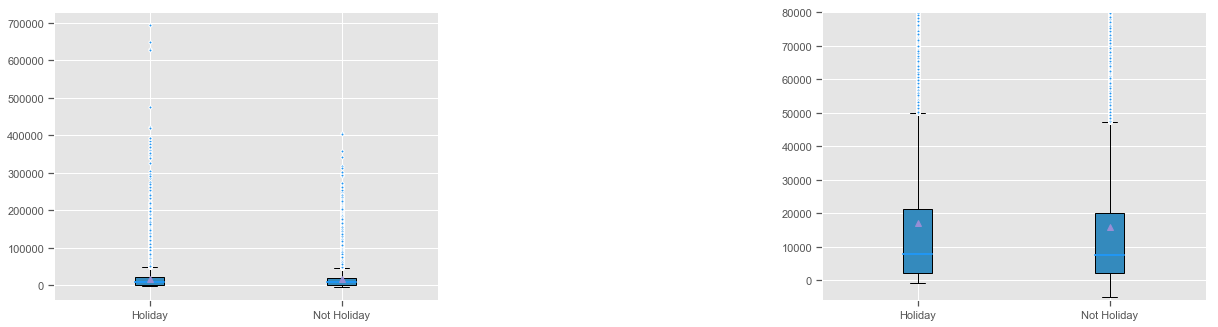

In [36]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

sales_holiday=train[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']

#median
medianprop={'color':'#2196F3',
            'linewidth': 2,
            'linestyle':'-'}

# outliers

flierprop={'color' : '#EC407A',
          'marker' : 'o',
          'markerfacecolor': '#2196F3',
          'markeredgecolor':'white',
          'markersize' : 3,
          'linestyle' : 'None',
          'linewidth' : 0.1}



axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)




axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)

axes[1].set_ylim(-6000,80000)

plt.show()

In [37]:
print(train[train['IsHoliday']==True]['Weekly_Sales'].describe().round(1))
print(train[train['IsHoliday']==False]['Weekly_Sales'].describe().round(1))

count     29661.0
mean      17035.8
std       27222.0
min        -798.0
25%        2078.5
50%        7947.7
75%       21189.2
max      693099.4
Name: Weekly_Sales, dtype: float64
count    391909.0
mean      15901.4
std       22330.7
min       -4988.9
25%        2079.8
50%        7590.0
75%       20131.2
max      406988.6
Name: Weekly_Sales, dtype: float64


**Sales in holiday is a little bit more than sales in not-holiday**

In [38]:
train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Year  Month  \
0      1     1 2010-02-05      24924.50      False    A  151315  2010      2   
1      1     1 2010-02-12      46039.49       True    A  151315  2010      2   
2      1     1 2010-02-19      41595.55      False    A  151315  2010      2   
3      1     1 2010-02-26      19403.54      False    A  151315  2010      2   
4      1     1 2010-03-05      21827.90      False    A  151315  2010      3   

   Week  Day  n_days  
0     5    5       0  
1     6   12       7  
2     7   19      14  
3     8   26      21  
4     9    5      28

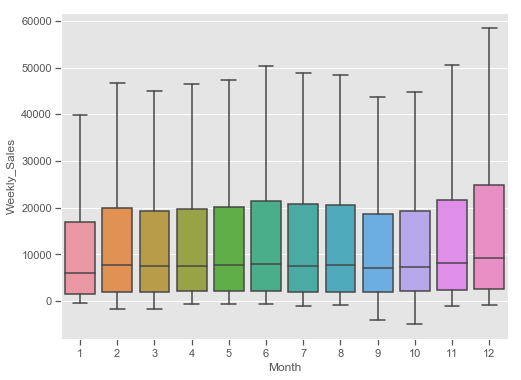

In [39]:
data = pd.concat([train['Month'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data, showfliers=False)

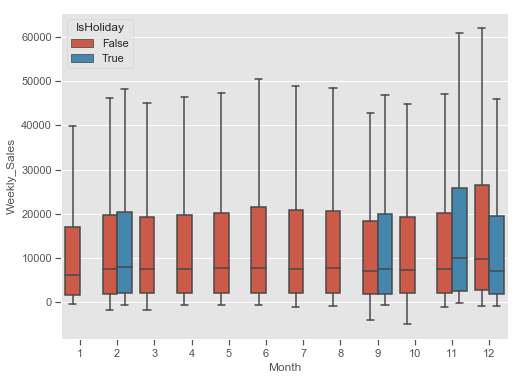

In [40]:
data = pd.concat([train['Month'], train['Weekly_Sales'],train['IsHoliday']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data, showfliers=False, hue='IsHoliday')

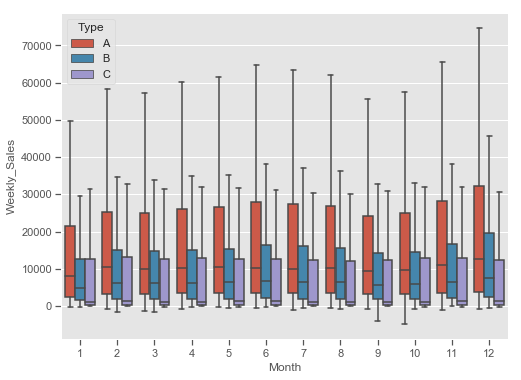

In [41]:
data = pd.concat([train['Month'], train['Weekly_Sales'],train['Type']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data, showfliers=False, hue='Type')

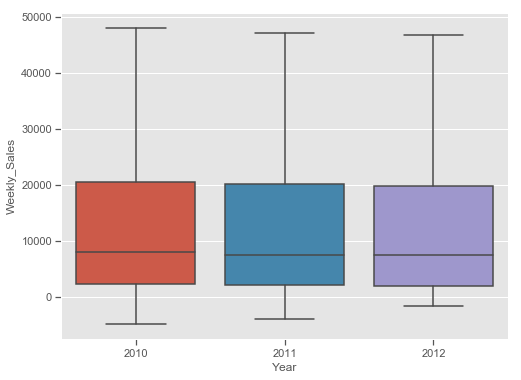

In [42]:
data = pd.concat([train['Year'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Year', y="Weekly_Sales", data=data, showfliers=False)

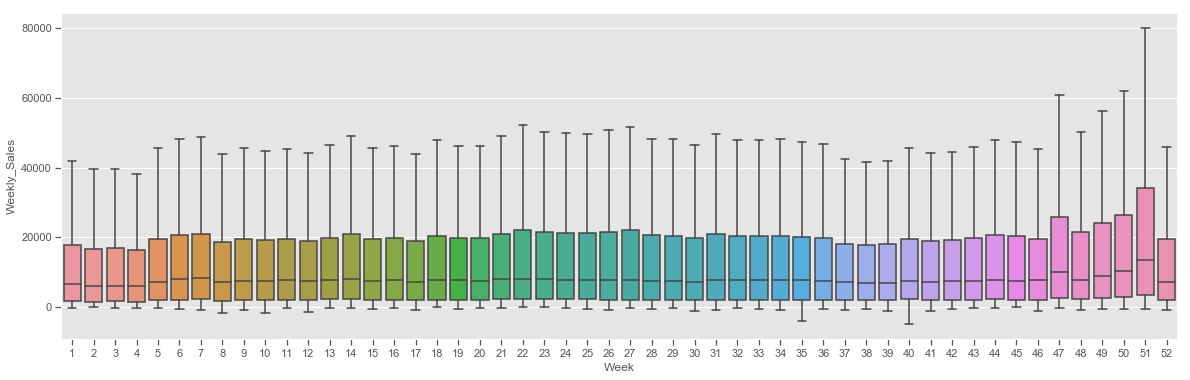

In [43]:
data = pd.concat([train['Week'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Week', y="Weekly_Sales", data=data, showfliers=False)

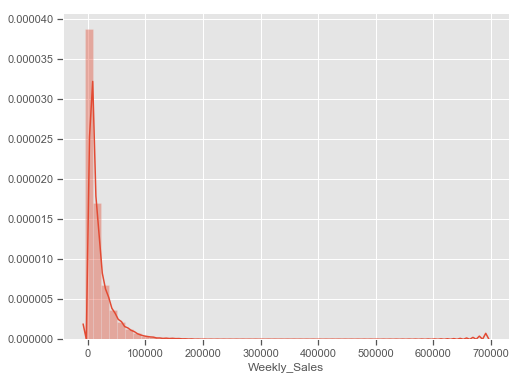

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['Weekly_Sales'])

In [45]:
print("Skewness: ", train['Weekly_Sales'].skew()) #skewness
print("Kurtosis: ", train['Weekly_Sales'].kurt()) #kurtosis

Skewness:  3.2620081854656657
Kurtosis:  21.49128990832619


In [46]:
train['Weekly_Sales'].min()

-4988.94

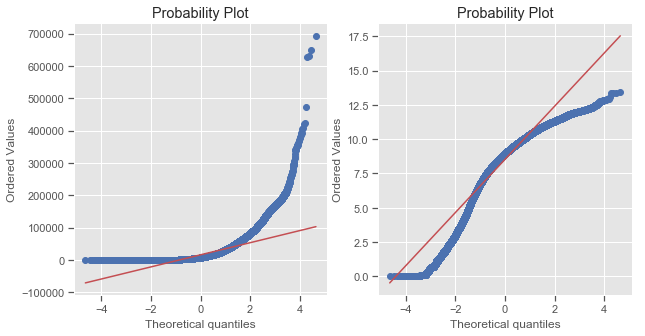

In [47]:
fig = plt.figure(figsize = (10,5))

fig.add_subplot(1,2,1)
res = stats.probplot(train.loc[train['Weekly_Sales']>0,'Weekly_Sales'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(train.loc[train['Weekly_Sales']>0,'Weekly_Sales']), plot=plt)


In [48]:
train.describe()['Weekly_Sales']

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

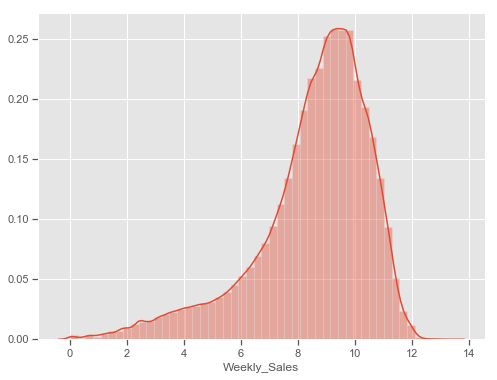

In [49]:
train_over_zero=train[train['Weekly_Sales']>0]
train_below_zero=train[train['Weekly_Sales']<=0]
sales_over_zero = np.log1p(train_over_zero['Weekly_Sales'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(sales_over_zero)

In [50]:
print("Skewness: ", sales_over_zero.skew()) #skewness
print("Kurtosis: ", sales_over_zero.kurt()) #kurtosis

Skewness:  -1.2011878481918052
Kurtosis:  1.5541238937236335


(11090, 11)
   Dept       Date  Store  Weekly_Sales  IsHoliday      Size    Year  Month  \
0     1 2010-02-05   23.0       19596.0      False  130288.0  2010.0    2.0   
1     1 2010-02-12   23.0       32382.0       True  130288.0  2010.0    2.0   
2     1 2010-02-19   23.0       24850.0      False  130288.0  2010.0    2.0   
3     1 2010-02-26   23.0       15142.0      False  130288.0  2010.0    2.0   
4     1 2010-03-05   23.0       16948.0      False  130288.0  2010.0    3.0   

   Week   Day  n_days  
0   5.0   5.0     0.0  
1   6.0  12.0     7.0  
2   7.0  19.0    14.0  
3   8.0  26.0    21.0  
4   9.0   5.0    28.0  


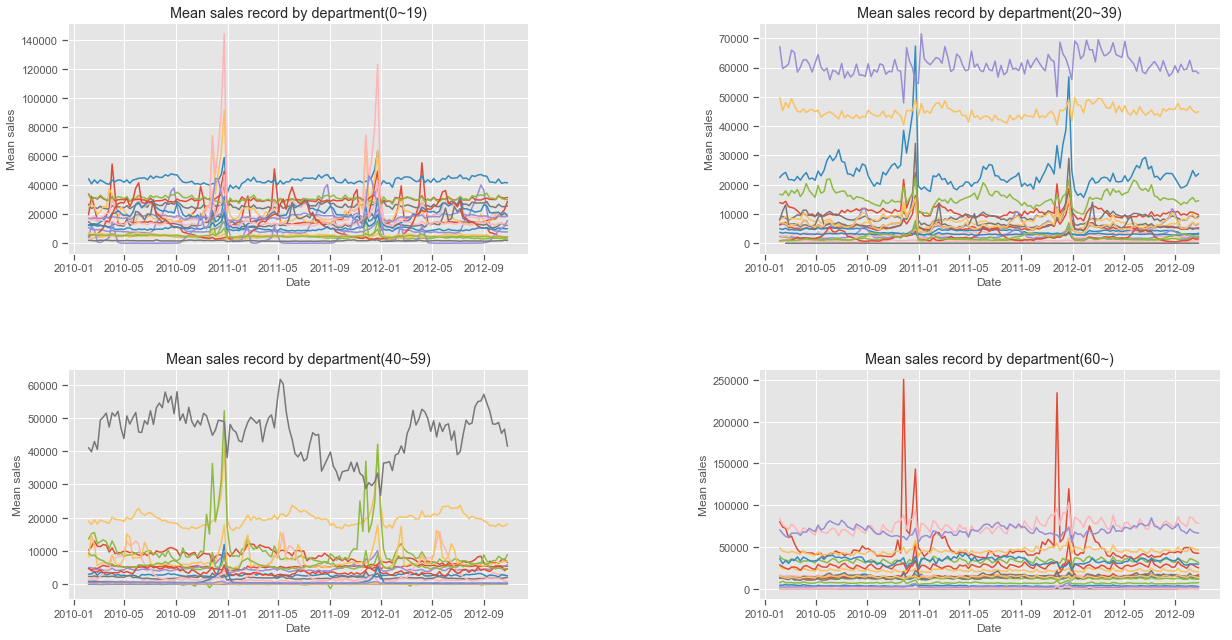

In [51]:
grouped=train.groupby(['Dept','Date']).mean().round(0).reset_index()
print(grouped.shape)
print(grouped.head())
data=grouped[['Dept','Date','Weekly_Sales']]


dept=train['Dept'].unique()
dept.sort()
dept_1=dept[0:20]
dept_2=dept[20:40]
dept_3=dept[40:60]
dept_4=dept[60:]

fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for i in dept_1 :
    data_1=data[data['Dept']==i]
    ax[0,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')

for i in dept_2 :
    data_1=data[data['Dept']==i]
    ax[0,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')
for i in dept_3 :
    data_1=data[data['Dept']==i]
    ax[1,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')    

for i in dept_4 :
    data_1=data[data['Dept']==i]
    ax[1,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')        
    
ax[0,0].set_title('Mean sales record by department(0~19)')
ax[0,1].set_title('Mean sales record by department(20~39)')
ax[1,0].set_title('Mean sales record by department(40~59)')
ax[1,1].set_title('Mean sales record by department(60~)')


ax[0,0].set_ylabel('Mean sales')
ax[0,0].set_xlabel('Date')
ax[0,1].set_ylabel('Mean sales')
ax[0,1].set_xlabel('Date')
ax[1,0].set_ylabel('Mean sales')
ax[1,0].set_xlabel('Date')
ax[1,1].set_ylabel('Mean sales')
ax[1,1].set_xlabel('Date')


plt.show()

**By the line plot, we can see the followings:
The sales level is different by department and the sales record level of one department is stable.
There is some peaked points around January and May. So there may be an event for high sales.
Some departments are highly related with those events. Thus, the sales record goes up steeply around Jan or May.
Conclusion 1 : Department is a good feature to predict sales.
Couclusion 2 : Date (especially event) is a good feature to predict sales.
Like department, time series of sales by store will show trend of sales.
Assumption : Like department, store will give a sense of sales level.
Assumption_2 : In addition, this will also give the day of the highest sales.**

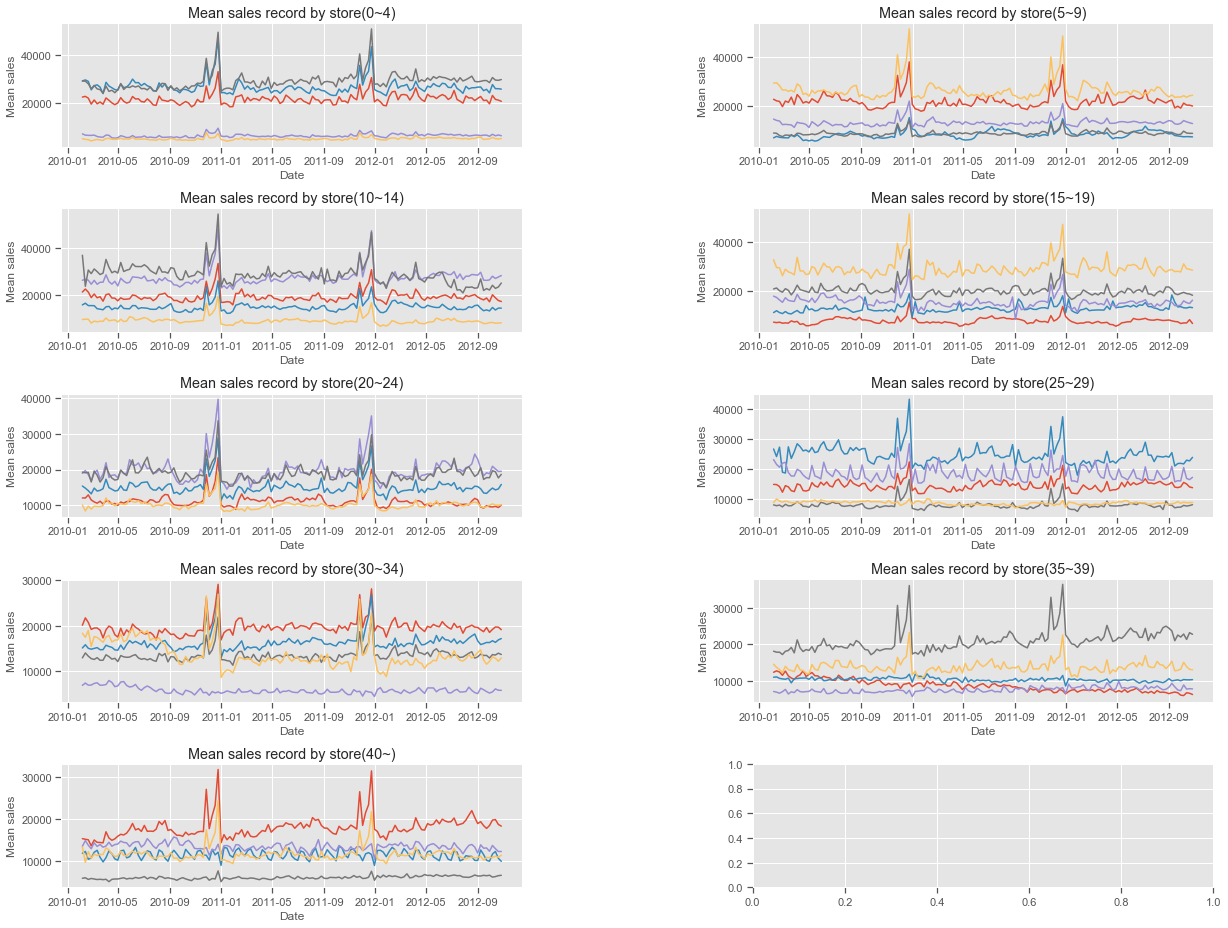

In [52]:
grouped=train.groupby(['Store','Date']).mean().round(0).reset_index()
grouped.shape
grouped.head()

data=grouped[['Store','Date','Weekly_Sales']]
type(data)


store=train['Store'].unique()
store.sort()
store_1=store[0:5]
store_2=store[5:10]
store_3=store[10:15]
store_4=store[15:20]
store_5=store[20:25]
store_6=store[25:30]
store_7=store[30:35]
store_8=store[35:40]
store_9=store[40:]

fig, ax = plt.subplots(5,2,figsize=(20,15))

fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for i in store_1 :
    data_1=data[data['Store']==i]
    ax[0,0].plot(data_1['Date'], data_1['Weekly_Sales'])
    
for i in store_2 :
    data_2=data[data['Store']==i]
    ax[0,1].plot(data_2['Date'], data_2['Weekly_Sales'])
    
for i in store_3 :
    data_3=data[data['Store']==i]
    ax[1,0].plot(data_3['Date'], data_3['Weekly_Sales'])
for i in store_4 :
    data_4=data[data['Store']==i]
    ax[1,1].plot(data_4['Date'], data_4['Weekly_Sales'])
    
for i in store_5 :
    data_5=data[data['Store']==i]
    ax[2,0].plot(data_5['Date'], data_5['Weekly_Sales'])  

for i in store_6 :
    data_6=data[data['Store']==i]
    ax[2,1].plot(data_6['Date'], data_6['Weekly_Sales'])  

for i in store_7 :
    data_7=data[data['Store']==i]
    ax[3,0].plot(data_7['Date'], data_7['Weekly_Sales'])      

for i in store_8 :
    data_8=data[data['Store']==i]
    ax[3,1].plot(data_8['Date'], data_8['Weekly_Sales'])     
for i in store_9 :
    data_9=data[data['Store']==i]
    ax[4,0].plot(data_9['Date'], data_9['Weekly_Sales'])     

    
ax[0,0].set_title('Mean sales record by store(0~4)')
ax[0,1].set_title('Mean sales record by store(5~9)')
ax[1,0].set_title('Mean sales record by store(10~14)')
ax[1,1].set_title('Mean sales record by store(15~19)')
ax[2,0].set_title('Mean sales record by store(20~24)')
ax[2,1].set_title('Mean sales record by store(25~29)')
ax[3,0].set_title('Mean sales record by store(30~34)')
ax[3,1].set_title('Mean sales record by store(35~39)')
ax[4,0].set_title('Mean sales record by store(40~)')

ax[0,0].set_ylabel('Mean sales')
ax[0,0].set_xlabel('Date')
ax[0,1].set_ylabel('Mean sales')
ax[0,1].set_xlabel('Date')
ax[1,0].set_ylabel('Mean sales')
ax[1,0].set_xlabel('Date')
ax[1,1].set_ylabel('Mean sales')
ax[1,1].set_xlabel('Date')
ax[2,0].set_ylabel('Mean sales')
ax[2,0].set_xlabel('Date')
ax[2,1].set_ylabel('Mean sales')
ax[2,1].set_xlabel('Date')
ax[3,0].set_ylabel('Mean sales')
ax[3,0].set_xlabel('Date')
ax[3,1].set_ylabel('Mean sales')
ax[3,1].set_xlabel('Date')
ax[4,0].set_ylabel('Mean sales')
ax[4,0].set_xlabel('Date')



plt.show()
    

**Assumption : The highest sales day (e.g. Christ mas) will provide high prediction power.
Assumption : The highest sales day will differ by department and store (e.g. some departments are not sensitive to Chisrt mas).
Thus, extract the higest day and match that day with train data set.**

In [53]:
grouped=train.groupby(['Store','Dept'])['Weekly_Sales'].max().reset_index()
grouped['Store']=grouped['Store'].astype(str)
grouped['Dept']=grouped['Dept'].astype(str)
grouped['Weekly_Sales']=grouped['Weekly_Sales'].astype(str)
grouped['key']=grouped['Weekly_Sales'] +'_'+ grouped['Store'] +'_'+ grouped['Dept']
grouped.head()

train['Store']=train['Store'].astype(str)
train['Dept']=train['Dept'].astype(str)
train['Weekly_Sales_2']=train['Weekly_Sales'].astype(str)
train['key']=train['Weekly_Sales'].astype(str) +'_'+ train['Store'].astype(str) +'_'+ train['Dept'].astype(str)
train

train_2=pd.merge(train, grouped['key'], how='inner', on='key' )
train_2['Date_2']=train_2['Month'].astype(str) + '-' + train_2['Day'].astype(str)
train_2

grouped_2=train_2.groupby(['Date_2','Store','Dept']).count().reset_index()
grouped_2.sort_values('Weekly_Sales',ascending=False,inplace=True)

In [54]:
grouped_2['key_2']=grouped_2['Date_2'].astype(str) + grouped_2['Store'].astype(str) + grouped_2['Dept'].astype(str)
grouped_2['Count']=grouped_2['Weekly_Sales']
data=grouped_2[['key_2','Count']]

train['Date_2']=train['Month'].astype(str) + '-' + train['Day'].astype(str)
train['key_2']=train['Date_2'].astype(str) + train['Store'].astype(str) + train['Dept'].astype(str)
train=pd.merge(train, data, how='left', on='key_2' )
train.loc[train['Count'].isnull(),'Count']=0

#grouped_2['proportion']=grouped_2['Weekly_Sales']/sum(grouped_2['Store'])
#grouped_2['Count']=grouped_2['Weekly_Sales']
#data=grouped_2[['Date_2','Count']]
#print(data.head(100))

#train['Date_2']=train['Month'].astype(str) + '-' + train['Day'].astype(str)

#train=pd.merge(train, data, how='left', on='Date_2' )
#train.head(150)


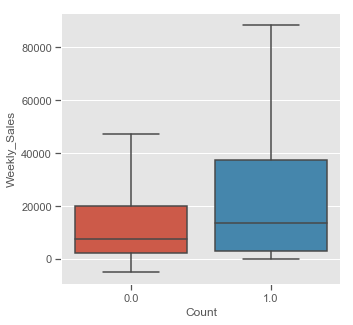

In [55]:
data = pd.concat([train['Count'], train['Weekly_Sales'], train['Store']], axis=1)
f, ax = plt.subplots(figsize=(5, 5))
fig=sns.boxplot(x='Count', y="Weekly_Sales", data=data, showfliers=False)

**In conclusion, the highest sales day information will give information power to predict.
Count 1 (the highest sales day by dept and store) show higher median than Count 0 (normal sales day)**

In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

In [57]:
import os

In [58]:
stores = pd.read_csv("D:\\Wallmart\\stores.csv",low_memory=False)
stores

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [59]:
train = pd.read_csv("D:\\Wallmart\\train.csv",low_memory=False)
train

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1    2/5/2010      24924.50      False
1           1     1   2/12/2010      46039.49       True
2           1     1   2/19/2010      41595.55      False
3           1     1   2/26/2010      19403.54      False
4           1     1    3/5/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98   9/28/2012        508.37      False
421566     45    98   10/5/2012        628.10      False
421567     45    98  10/12/2012       1061.02      False
421568     45    98  10/19/2012        760.01      False
421569     45    98  10/26/2012       1076.80      False

[421570 rows x 5 columns]

In [60]:
test = pd.read_csv("D:\\Wallmart\\test.csv",low_memory=False)
test

Store  Dept        Date  IsHoliday
0           1     1   11/2/2012      False
1           1     1   11/9/2012      False
2           1     1  11/16/2012      False
3           1     1  11/23/2012       True
4           1     1  11/30/2012      False
...       ...   ...         ...        ...
115059     45    98   6/28/2013      False
115060     45    98    7/5/2013      False
115061     45    98   7/12/2013      False
115062     45    98   7/19/2013      False
115063     45    98   7/26/2013      False

[115064 rows x 4 columns]

In [61]:
features = pd.read_csv("D:\\Wallmart\\features.csv",low_memory=False)
features

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1   2/5/2010        42.31       2.572        NaN        NaN   
1         1  2/12/2010        38.51       2.548        NaN        NaN   
2         1  2/19/2010        39.93       2.514        NaN        NaN   
3         1  2/26/2010        46.63       2.561        NaN        NaN   
4         1   3/5/2010        46.50       2.625        NaN        NaN   
...     ...        ...          ...         ...        ...        ...   
8185     45  6/28/2013        76.05       3.639    4842.29     975.03   
8186     45   7/5/2013        77.50       3.614    9090.48    2268.58   
8187     45  7/12/2013        79.37       3.614    3789.94    1827.31   
8188     45  7/19/2013        82.84       3.737    2961.49    1047.07   
8189     45  7/26/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [62]:
one_df_to_rule_them_all = train.merge(stores, how='left').merge(features, how='left')

In [63]:
one_df_to_rule_them_all.head()

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1   2/5/2010      24924.50      False    A  151315        42.31   
1      1     1  2/12/2010      46039.49       True    A  151315        38.51   
2      1     1  2/19/2010      41595.55      False    A  151315        39.93   
3      1     1  2/26/2010      19403.54      False    A  151315        46.63   
4      1     1   3/5/2010      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [64]:
one_ruler = one_df_to_rule_them_all

In [65]:
one_ruler

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1    2/5/2010      24924.50      False    A  151315   
1           1     1   2/12/2010      46039.49       True    A  151315   
2           1     1   2/19/2010      41595.55      False    A  151315   
3           1     1   2/26/2010      19403.54      False    A  151315   
4           1     1    3/5/2010      21827.90      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
421565     45    98   9/28/2012        508.37      False    B  118221   
421566     45    98   10/5/2012        628.10      False    B  118221   
421567     45    98  10/12/2012       1061.02      False    B  118221   
421568     45    98  10/19/2012        760.01      False    B  118221   
421569     45    98  10/26/2012       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             38.51       2.548        NaN        NaN        NaN        NaN   
2             39.93       2.514        NaN        NaN        NaN        NaN   
3             46.63       2.561        NaN        NaN        NaN        NaN   
4             46.50       2.625        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
421565        64.88       3.997    4556.61      20.64       1.50    1601.01   
421566        64.89       3.985    5046.74        NaN      18.82    2253.43   
421567        54.47       4.000    1956.28        NaN       7.89     599.32   
421568        56.47       3.969    2004.02        NaN       3.18     437.73   
421569        58.85       3.882    4018.91      58.08     100.00     211.94   

        MarkDown5         CPI  Unemployment  
0             NaN  211.096358         8.106  
1             NaN  211.242170         8.106  
2             NaN  211.289143         8.106  
3             NaN  211.319643         8.106  
4             NaN  211.350143         8.106  
...           ...         ...           ...  
421565    3288.25  192.013558         8.684  
421566    2340.01  192.170412         8.667  
421567    3990.54  192.327265         8.667  
421568    1537.49  192.330854         8.667  
421569     858.33  192.308899         8.667  

[421570 rows x 16 columns]

In [66]:
ans = one_ruler['Store'].unique().shape[0] * one_ruler['Dept'].unique().shape[0]
print("Number of possible store-department pairs: %d" % ans)

Number of possible store-department pairs: 3645


In [67]:
ans

3645

In [68]:
print((one_ruler.groupby(['Store', 'Dept']).size()).shape)

(3331,)


(143, 16)


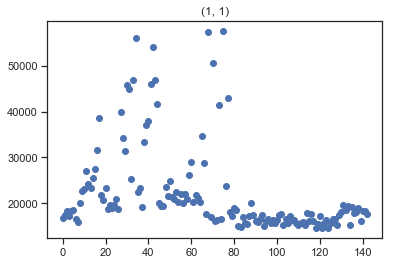

(143, 16)


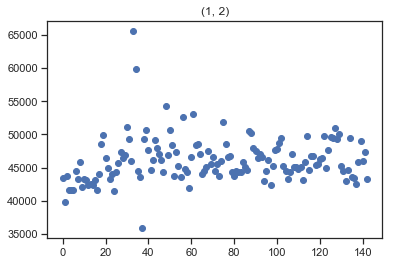

(143, 16)


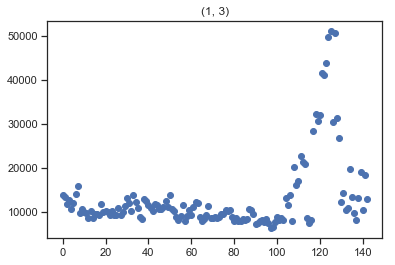

(143, 16)


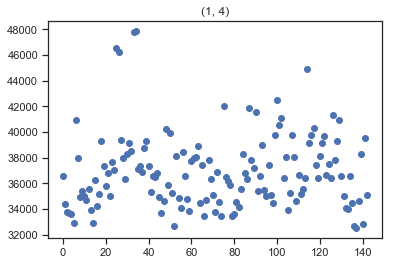

(143, 16)


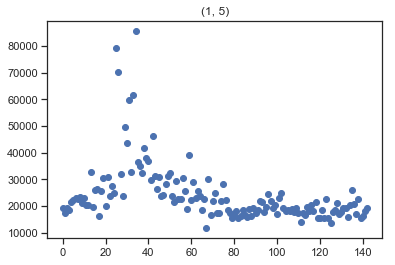

(143, 16)


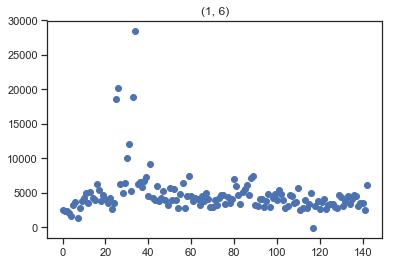

(143, 16)


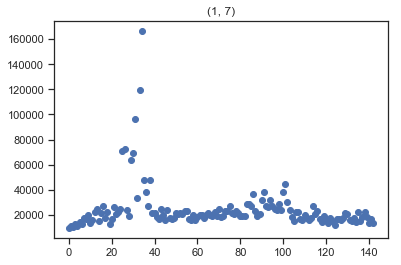

(143, 16)


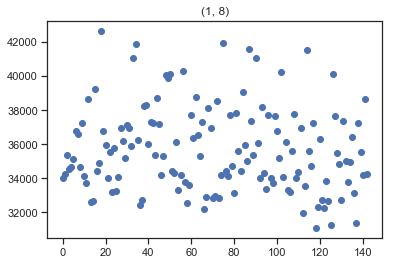

(143, 16)


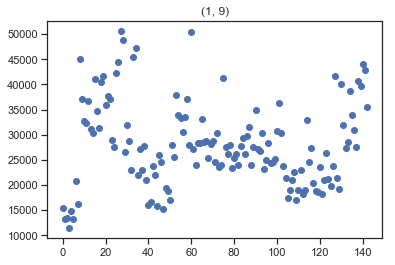

(143, 16)


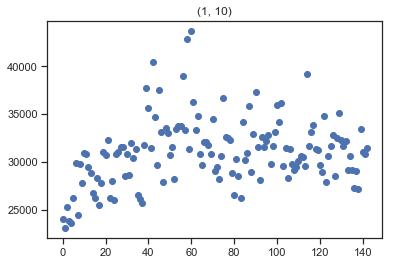

(143, 16)


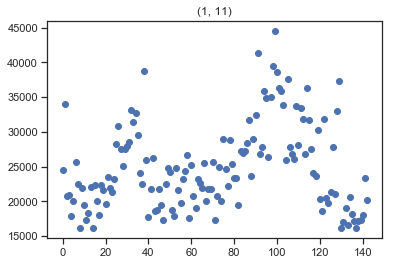

(143, 16)


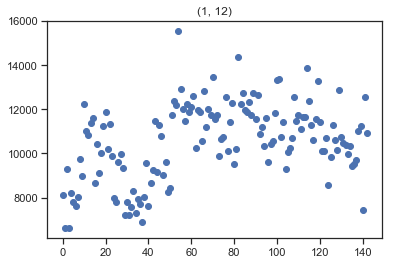

In [69]:
cnt = 0
for name, group in one_ruler.groupby(["Store", "Dept"]):
    plt.title(name)
    print(group.shape)
    group = group.sort_values(by=['Date'])
    plt.scatter(range(len(group)), group["Weekly_Sales"])
    plt.show()
    if cnt > 10:
        break
    cnt += 1

In [70]:
def scatter_(df, column):
    plt.figure()
    plt.scatter(df[column] , df['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

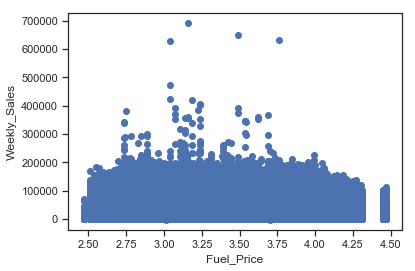

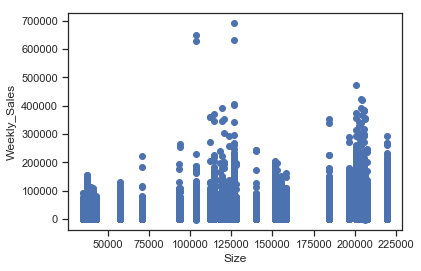

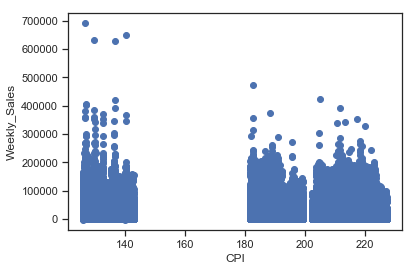

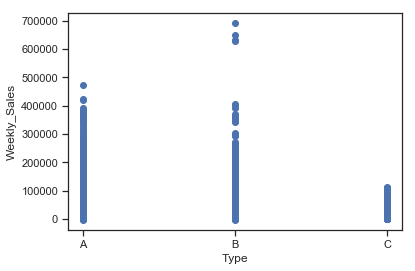

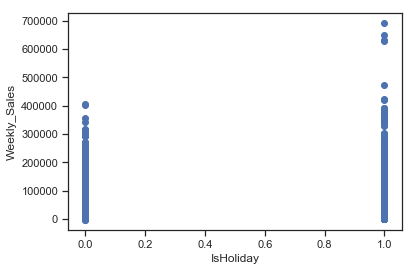

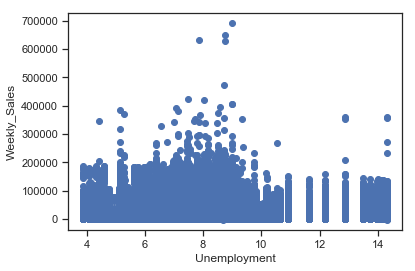

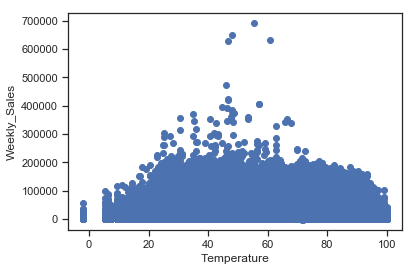

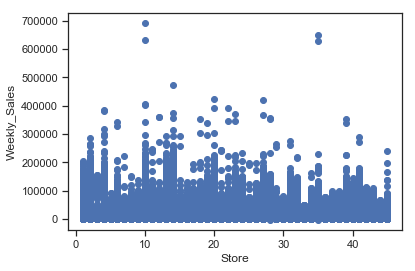

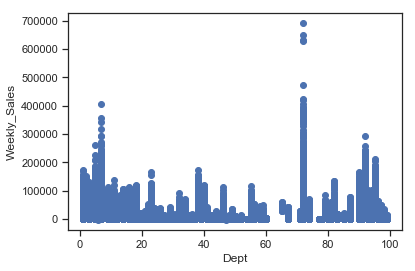

In [71]:
scatter_(one_ruler, 'Fuel_Price')
scatter_(one_ruler, 'Size')
scatter_(one_ruler, 'CPI')
scatter_(one_ruler, 'Type')
scatter_(one_ruler, 'IsHoliday')
scatter_(one_ruler, 'Unemployment')
scatter_(one_ruler, 'Temperature')
scatter_(one_ruler, 'Store')
scatter_(one_ruler, 'Dept')

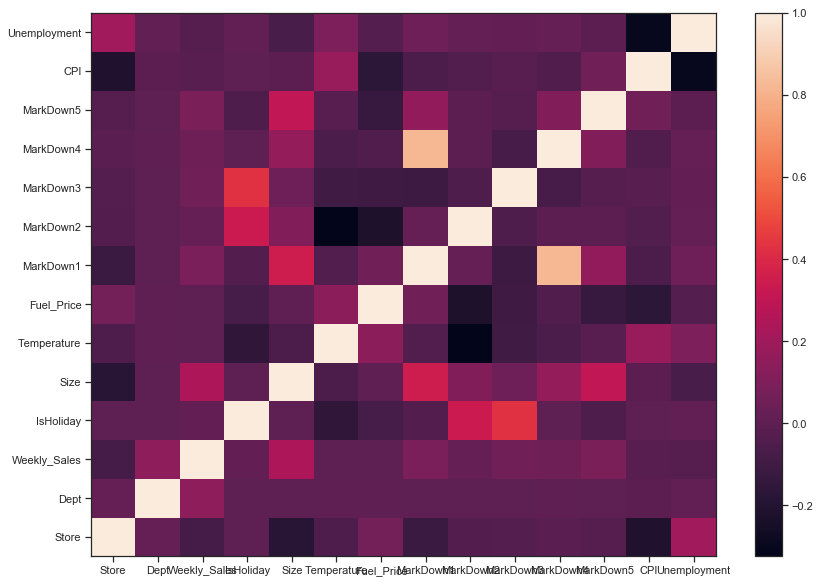

In [72]:
fig = plt.figure(figsize=(14, 10))
corr = one_ruler.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

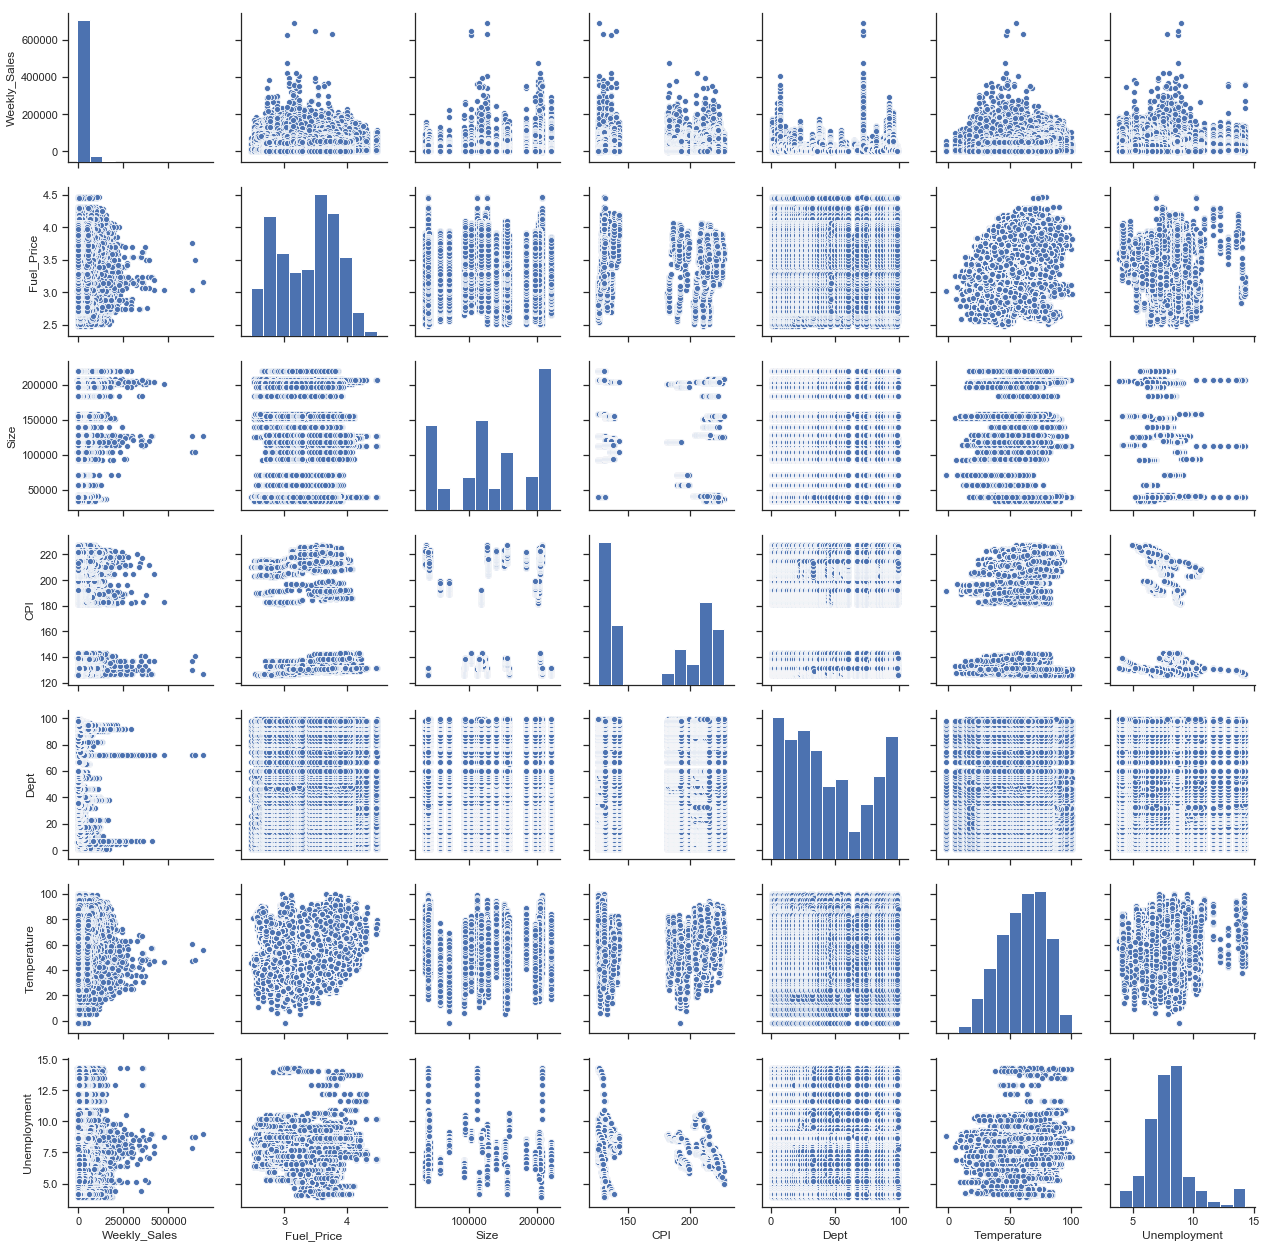

In [73]:
sns.pairplot(one_ruler, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [74]:
print(one_ruler.shape)
print(one_ruler[one_ruler['Weekly_Sales'] >= 100000].shape)

(421570, 16)
(5140, 16)


In [75]:
df_to_plot = one_ruler[one_ruler['Weekly_Sales'] <= 100000]

In [76]:
df_to_plot

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1    2/5/2010      24924.50      False    A  151315   
1           1     1   2/12/2010      46039.49       True    A  151315   
2           1     1   2/19/2010      41595.55      False    A  151315   
3           1     1   2/26/2010      19403.54      False    A  151315   
4           1     1    3/5/2010      21827.90      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
421565     45    98   9/28/2012        508.37      False    B  118221   
421566     45    98   10/5/2012        628.10      False    B  118221   
421567     45    98  10/12/2012       1061.02      False    B  118221   
421568     45    98  10/19/2012        760.01      False    B  118221   
421569     45    98  10/26/2012       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             38.51       2.548        NaN        NaN        NaN        NaN   
2             39.93       2.514        NaN        NaN        NaN        NaN   
3             46.63       2.561        NaN        NaN        NaN        NaN   
4             46.50       2.625        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
421565        64.88       3.997    4556.61      20.64       1.50    1601.01   
421566        64.89       3.985    5046.74        NaN      18.82    2253.43   
421567        54.47       4.000    1956.28        NaN       7.89     599.32   
421568        56.47       3.969    2004.02        NaN       3.18     437.73   
421569        58.85       3.882    4018.91      58.08     100.00     211.94   

        MarkDown5         CPI  Unemployment  
0             NaN  211.096358         8.106  
1             NaN  211.242170         8.106  
2             NaN  211.289143         8.106  
3             NaN  211.319643         8.106  
4             NaN  211.350143         8.106  
...           ...         ...           ...  
421565    3288.25  192.013558         8.684  
421566    2340.01  192.170412         8.667  
421567    3990.54  192.327265         8.667  
421568    1537.49  192.330854         8.667  
421569     858.33  192.308899         8.667  

[416430 rows x 16 columns]

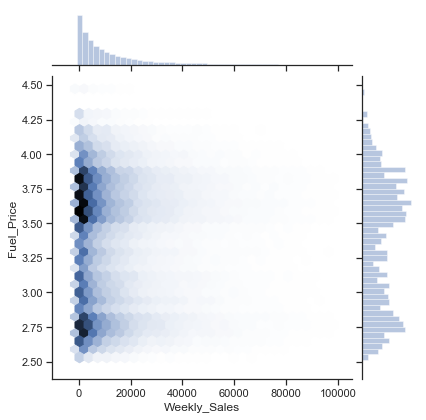

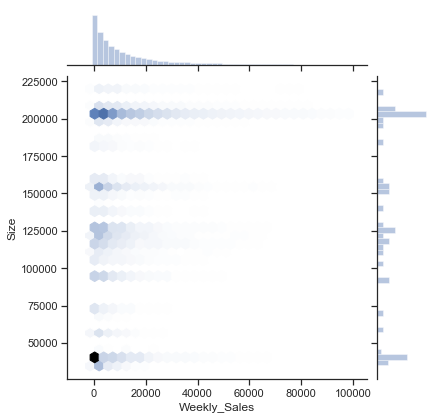

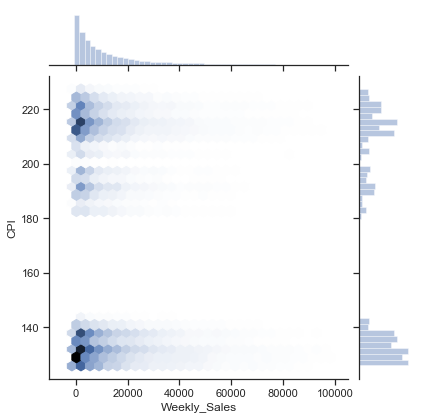

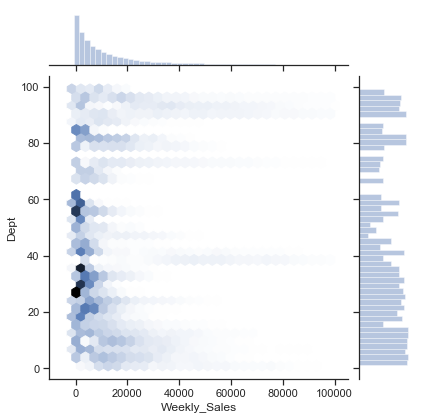

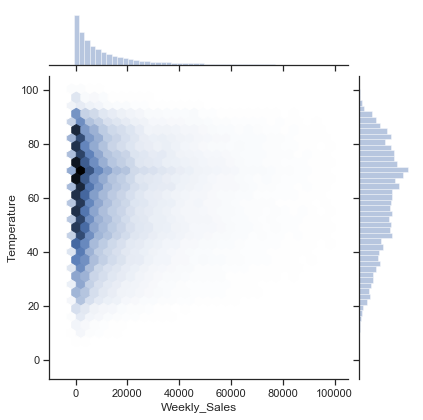

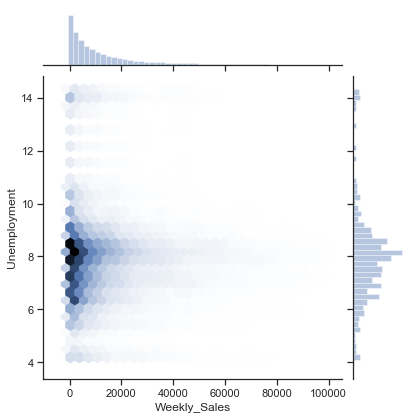

In [77]:
sns.jointplot( 'Weekly_Sales', 'Fuel_Price', data=df_to_plot, kind='hex', gridsize=30)
sns.jointplot( 'Weekly_Sales', 'Size', data=df_to_plot, kind='hex', gridsize=30)
sns.jointplot( 'Weekly_Sales', 'CPI', data=df_to_plot, kind='hex', gridsize=30)
sns.jointplot( 'Weekly_Sales', 'Dept', data=df_to_plot, kind='hex', gridsize=30)
sns.jointplot( 'Weekly_Sales', 'Temperature', data=df_to_plot, kind='hex', gridsize=30)
sns.jointplot( 'Weekly_Sales', 'Unemployment', data=df_to_plot, kind='hex', gridsize=30)

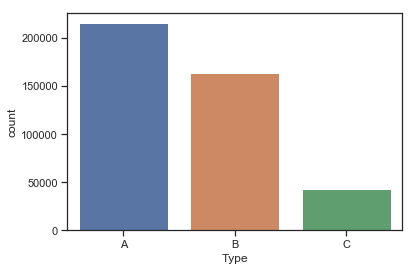

In [78]:
sns.countplot(one_ruler['Type'])

# Let's explore temperature

In [79]:
print("Min Temperature: ")
print(one_ruler['Temperature'].min())
print("Max Temperature: ")
print(one_ruler['Temperature'].max())
print("Mean Temperature: ")
print(one_ruler['Temperature'].mean())
print("Std Temperature: ")
print(one_ruler['Temperature'].std())

Min Temperature: 
-2.06
Max Temperature: 
100.14
Mean Temperature: 
60.09005873281449
Std Temperature: 
18.447931147614106


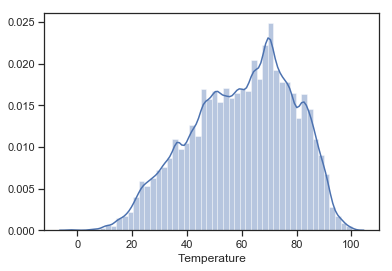

In [80]:
sns.distplot(one_ruler['Temperature'])

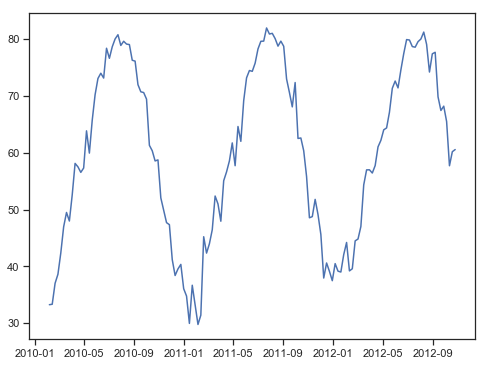

In [81]:
df = one_ruler
df['dt'] = pd.to_datetime(one_ruler['Date'])
df_to_plot = df.groupby(['dt'])['Temperature'].mean()

fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.lineplot(data=df_to_plot, ax=ax)

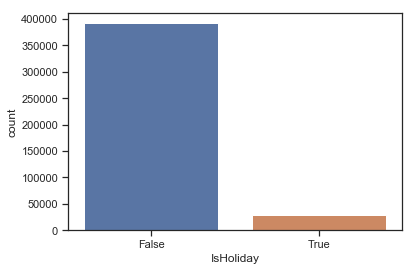

In [82]:
sns.countplot(one_ruler['IsHoliday'])

# Exploring CPI

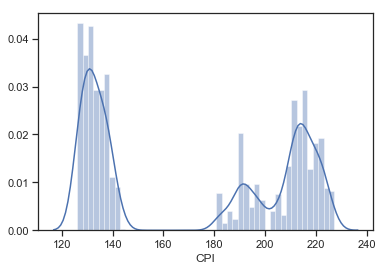

In [83]:
sns.distplot(one_ruler['CPI'])

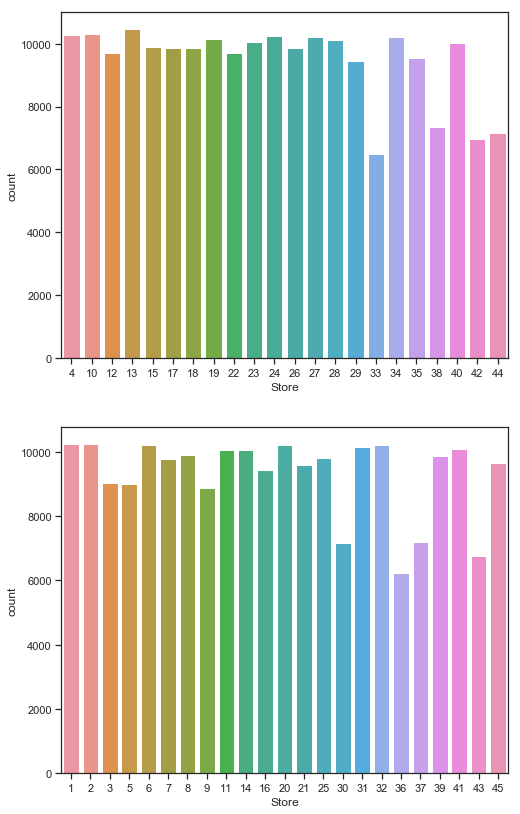

In [84]:
df1 = one_ruler[one_ruler.CPI < 160]
df2 = one_ruler[one_ruler.CPI >= 160]
fig, ax = plt.subplots(2, 1, figsize=(8,14))
sns.countplot(df1['Store'], ax=ax[0])
sns.countplot(df2['Store'], ax=ax[1])

# It seems that some stores might be located in separate areas due to the difference in the CPI's

In [85]:
s1 = set(df1['Store'].unique())
s2 = set(df2['Store'].unique())
print(len(s1.intersection(s2)))

0


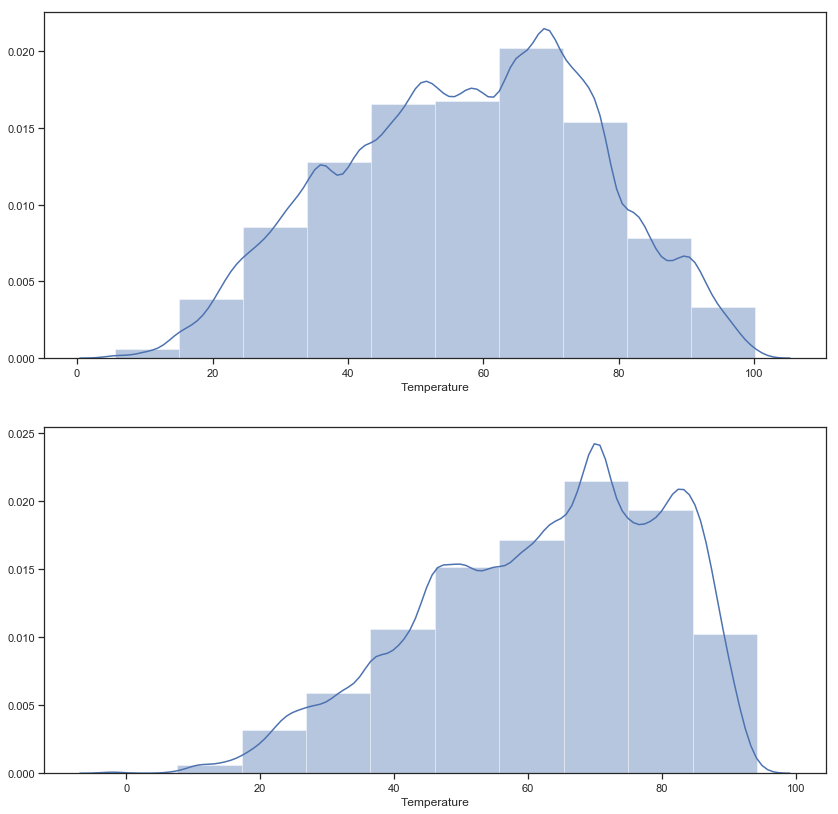

In [86]:
fig, ax = plt.subplots(2, 1, figsize=(14,14))
sns.distplot(df1['Temperature'],bins=10, ax=ax[0])
sns.distplot(df2['Temperature'], bins=10, ax=ax[1])

# Lower mean-CPI plot over time

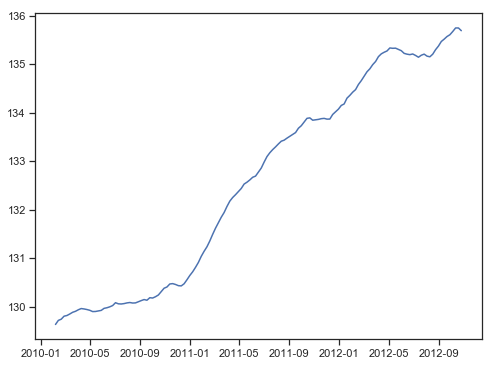

In [87]:
df = df1
df['dt'] = pd.to_datetime(df['Date'])
df_to_plot = df.groupby(['dt'])['CPI'].mean()
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.lineplot(data=df_to_plot, ax=ax)

# Higher mean-CPI plot over time

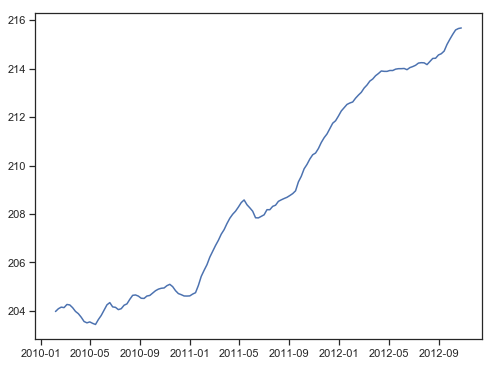

In [88]:
df = df2
df['dt'] = pd.to_datetime(df['Date'])
df_to_plot = df.groupby(['dt'])['CPI'].mean()
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.lineplot(data=df_to_plot, ax=ax)

# mean CPI over time

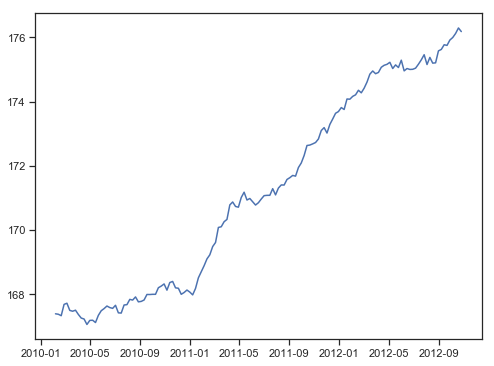

In [89]:
df = one_ruler
df['dt'] = pd.to_datetime(one_ruler['Date'])
df_to_plot = df.groupby(['dt'])['CPI'].mean()
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.lineplot(data=df_to_plot, ax=ax)

# Other explorations

In [90]:
one_df_to_rule_them_all = train.merge(stores, how='left').merge(features, how='left')
train_df_merged = one_df_to_rule_them_all
train_df_merged = pd.get_dummies(train_df_merged, columns=['Type'])
train_df_merged.head()

Store  Dept       Date  Weekly_Sales  IsHoliday    Size  Temperature  \
0      1     1   2/5/2010      24924.50      False  151315        42.31   
1      1     1  2/12/2010      46039.49       True  151315        38.51   
2      1     1  2/19/2010      41595.55      False  151315        39.93   
3      1     1  2/26/2010      19403.54      False  151315        46.63   
4      1     1   3/5/2010      21827.90      False  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  Type_A  Type_B  Type_C  
0  211.096358         8.106       1       0       0  
1  211.242170         8.106       1       0       0  
2  211.289143         8.106       1       0       0  
3  211.319643         8.106       1       0       0  
4  211.350143         8.106       1       0       0

In [91]:
def extract_date_features(df):
    df['Date_dt'] = pd.to_datetime(df['Date'])
    df['day_of_week'] = df['Date_dt'].dt.dayofweek
    df['day'] = df['Date_dt'].dt.day
    df['year'] = df['Date_dt'].dt.year
    df['month'] = df['Date_dt'].dt.month
    df['weight'] = df['IsHoliday'].replace(True,5).replace(False,1)

In [92]:
extract_date_features(train_df_merged)
train_df_merged = train_df_merged.drop(['Date', 'Date_dt', 'IsHoliday'], axis=1)
train_df_merged = train_df_merged.fillna(0)

In [93]:
lst = []
for name, group in train_df_merged.groupby(['Store', 'Dept']):
    lst.append(name)
print(len(lst))

3331


In [94]:
test_df = test.merge(stores, how='left').merge(features, how='left')

In [95]:
train_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type_A          421570 non-null uint8
Type_B          421570 non-null uint8
Type_C          421570 non-null uint8
day_of_week     421570 non-null int64
day             421570 non-null int64
year            421570 non-null int64
month           421570 non-null int64
weight          421570 non-null float64
dtypes: float64(11), int64(7), uint8(3)
memory usage: 62.3 MB


In [96]:
print(test_df.Date.min())
print(test_df.Date.max())

1/11/2013
7/5/2013


In [97]:
test_df[test_df.Date >= '2013-04-20'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64626 entries, 17 to 115063
Data columns (total 15 columns):
Store           64626 non-null int64
Dept            64626 non-null int64
Date            64626 non-null object
IsHoliday       64626 non-null bool
Type            64626 non-null object
Size            64626 non-null int64
Temperature     64626 non-null float64
Fuel_Price      64626 non-null float64
MarkDown1       64526 non-null float64
MarkDown2       47213 non-null float64
MarkDown3       59277 non-null float64
MarkDown4       57028 non-null float64
MarkDown5       64626 non-null float64
CPI             26464 non-null float64
Unemployment    26464 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 7.5+ MB


In [98]:
test_df['dt'] = pd.to_datetime(test_df['Date'])

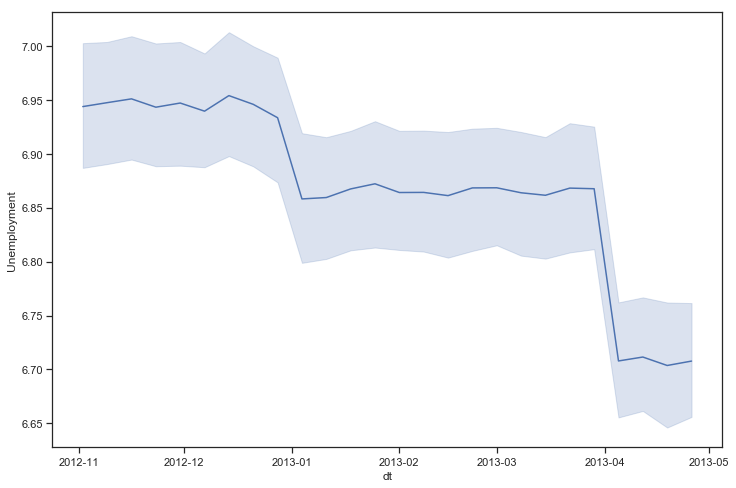

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.lineplot(x='dt',y='Unemployment',data=test_df, ax=ax)

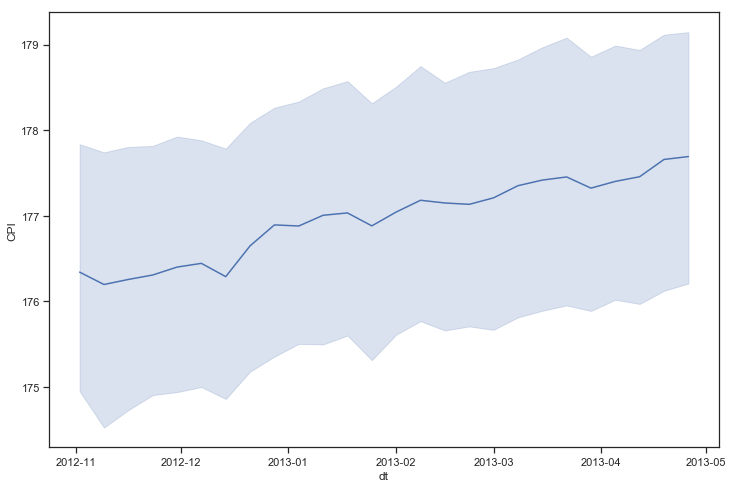

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.lineplot(x='dt',y='CPI',data=test_df, ax=ax)

In [101]:
one_df_to_rule_them_all['dt'] = pd.to_datetime(one_df_to_rule_them_all['Date'])

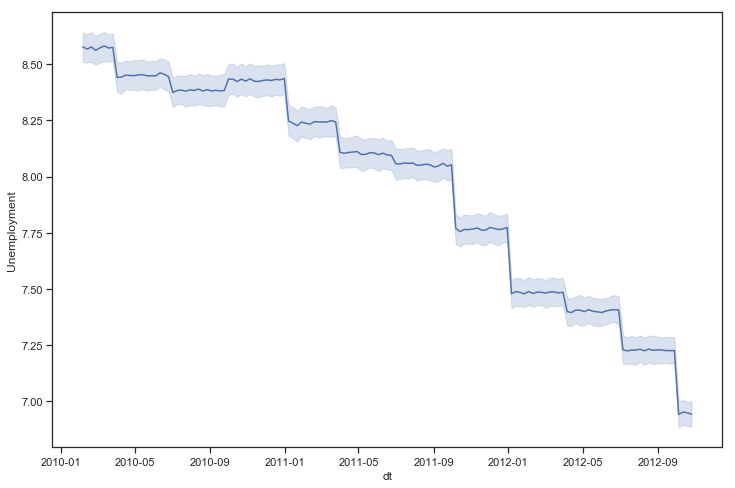

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.lineplot(x='dt',y='Unemployment',data=one_df_to_rule_them_all, ax=ax)

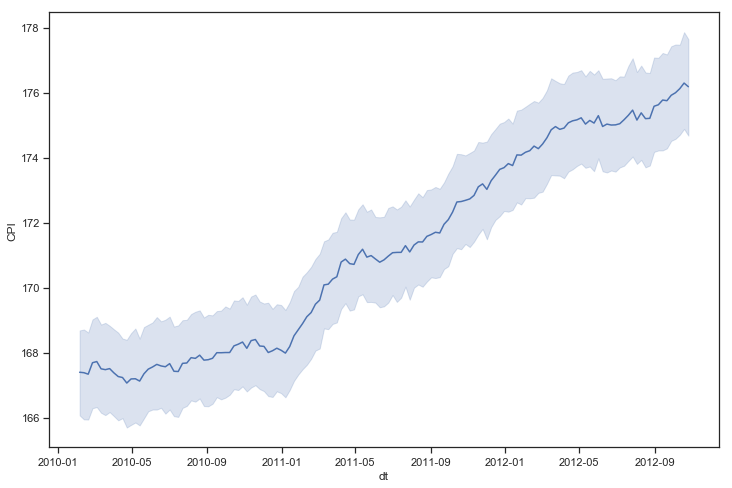

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.lineplot(x='dt',y='CPI',data=one_df_to_rule_them_all, ax=ax)

In [104]:
dfs1_train = one_df_to_rule_them_all[one_df_to_rule_them_all.Store == 1]
dfs1_test = test_df[test_df.Store == 1]

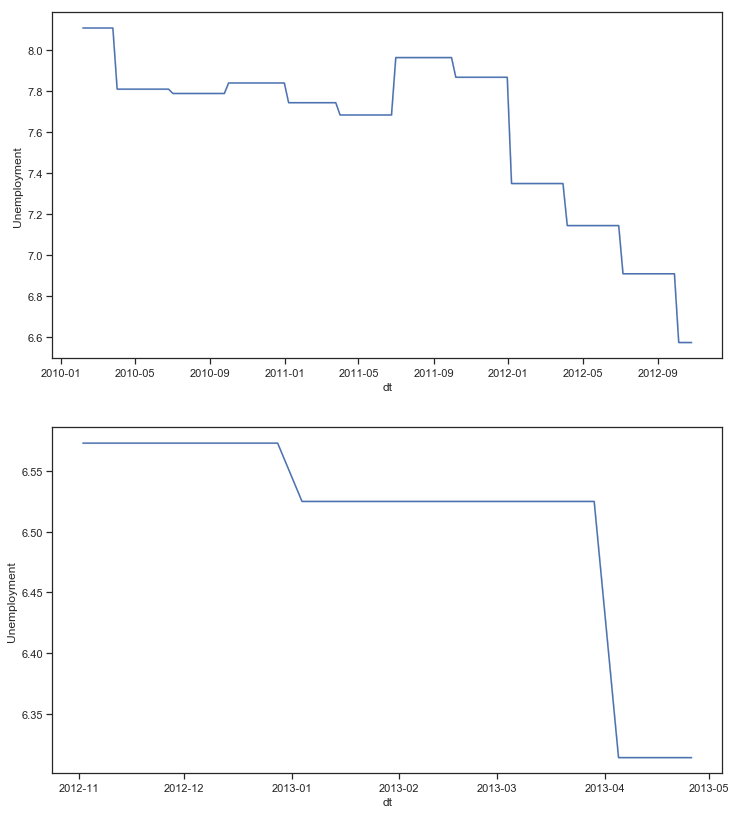

In [105]:
fig, ax = plt.subplots(2, 1, figsize=(12,14))
sns.lineplot(x='dt',y='Unemployment',data=dfs1_train, ax=ax[0])
sns.lineplot(x='dt',y='Unemployment',data=dfs1_test, ax=ax[1])

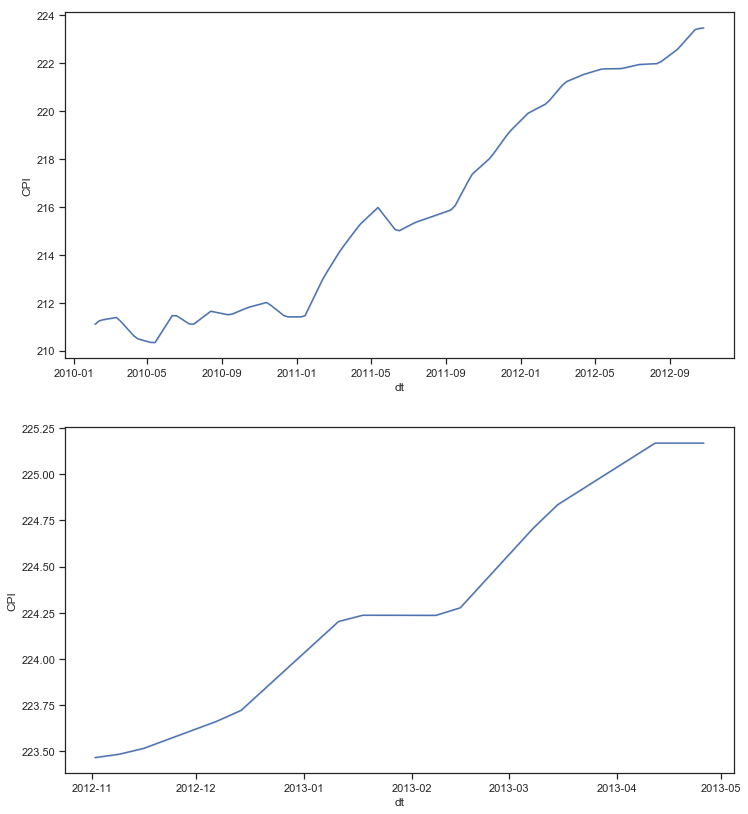

In [106]:
fig, ax = plt.subplots(2, 1, figsize=(12,14))
sns.lineplot(x='dt',y='CPI',data=dfs1_train, ax=ax[0])
sns.lineplot(x='dt',y='CPI',data=dfs1_test, ax=ax[1])

# LINEAR REGRESSION

# LET'S IMPORT THE DATA

In [107]:
df = pd.read_csv("D:\\Wallmart\\stores.csv",low_memory=False)
df

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [108]:
df_train = pd.read_csv("D:\\Wallmart\\train.csv",low_memory=False)
df_train

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1    2/5/2010      24924.50      False
1           1     1   2/12/2010      46039.49       True
2           1     1   2/19/2010      41595.55      False
3           1     1   2/26/2010      19403.54      False
4           1     1    3/5/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98   9/28/2012        508.37      False
421566     45    98   10/5/2012        628.10      False
421567     45    98  10/12/2012       1061.02      False
421568     45    98  10/19/2012        760.01      False
421569     45    98  10/26/2012       1076.80      False

[421570 rows x 5 columns]

In [109]:
df_test = pd.read_csv("D:\\Wallmart\\test.csv",low_memory=False)
df_test

Store  Dept        Date  IsHoliday
0           1     1   11/2/2012      False
1           1     1   11/9/2012      False
2           1     1  11/16/2012      False
3           1     1  11/23/2012       True
4           1     1  11/30/2012      False
...       ...   ...         ...        ...
115059     45    98   6/28/2013      False
115060     45    98    7/5/2013      False
115061     45    98   7/12/2013      False
115062     45    98   7/19/2013      False
115063     45    98   7/26/2013      False

[115064 rows x 4 columns]

In [110]:
df_fts = pd.read_csv("D:\\Wallmart\\features.csv",low_memory=False)
df_fts

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1   2/5/2010        42.31       2.572        NaN        NaN   
1         1  2/12/2010        38.51       2.548        NaN        NaN   
2         1  2/19/2010        39.93       2.514        NaN        NaN   
3         1  2/26/2010        46.63       2.561        NaN        NaN   
4         1   3/5/2010        46.50       2.625        NaN        NaN   
...     ...        ...          ...         ...        ...        ...   
8185     45  6/28/2013        76.05       3.639    4842.29     975.03   
8186     45   7/5/2013        77.50       3.614    9090.48    2268.58   
8187     45  7/12/2013        79.37       3.614    3789.94    1827.31   
8188     45  7/19/2013        82.84       3.737    2961.49    1047.07   
8189     45  7/26/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [111]:
#Merge info
def mergeData(df):
    features =pd.read_csv("D:\\Wallmart\\features.csv")
    storesdata =pd.read_csv("D:\\Wallmart\\stores.csv")
    df = pd.merge(df, features, on=['Store','Date','IsHoliday'],
                  how='inner')
    df = pd.merge(df, storesdata, on=['Store'],
                  how='inner')
    return df

In [112]:
df

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [113]:
train = mergeData(pd.read_csv("D:\\Wallmart\\train.csv"))
test = mergeData(pd.read_csv("D:\\Wallmart\\test.csv"))
train['Split'] = 'Train'
test['Split'] = 'Test'
test.head()

Store  Dept       Date  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0      1     1  11/2/2012      False        55.32       3.386    6766.44   
1      1     2  11/2/2012      False        55.32       3.386    6766.44   
2      1     3  11/2/2012      False        55.32       3.386    6766.44   
3      1     4  11/2/2012      False        55.32       3.386    6766.44   
4      1     5  11/2/2012      False        55.32       3.386    6766.44   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment Type  \
0     5147.7      50.82     3639.9    2737.42  223.462779         6.573    A   
1     5147.7      50.82     3639.9    2737.42  223.462779         6.573    A   
2     5147.7      50.82     3639.9    2737.42  223.462779         6.573    A   
3     5147.7      50.82     3639.9    2737.42  223.462779         6.573    A   
4     5147.7      50.82     3639.9    2737.42  223.462779         6.573    A   

     Size Split  
0  151315  Test  
1  151315  Test  
2  151315  Test  
3  151315  Test  
4  151315  Test

In [114]:
train

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1    2/5/2010      24924.50      False        42.31   
1           1     2    2/5/2010      50605.27      False        42.31   
2           1     3    2/5/2010      13740.12      False        42.31   
3           1     4    2/5/2010      39954.04      False        42.31   
4           1     5    2/5/2010      32229.38      False        42.31   
...       ...   ...         ...           ...        ...          ...   
421565     45    93  10/26/2012       2487.80      False        58.85   
421566     45    94  10/26/2012       5203.31      False        58.85   
421567     45    95  10/26/2012      56017.47      False        58.85   
421568     45    97  10/26/2012       6817.48      False        58.85   
421569     45    98  10/26/2012       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.572        NaN        NaN        NaN        NaN        NaN   
2            2.572        NaN        NaN        NaN        NaN        NaN   
3            2.572        NaN        NaN        NaN        NaN        NaN   
4            2.572        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.882    4018.91      58.08      100.0     211.94     858.33   
421566       3.882    4018.91      58.08      100.0     211.94     858.33   
421567       3.882    4018.91      58.08      100.0     211.94     858.33   
421568       3.882    4018.91      58.08      100.0     211.94     858.33   
421569       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment Type    Size  Split  
0       211.096358         8.106    A  151315  Train  
1       211.096358         8.106    A  151315  Train  
2       211.096358         8.106    A  151315  Train  
3       211.096358         8.106    A  151315  Train  
4       211.096358         8.106    A  151315  Train  
...            ...           ...  ...     ...    ...  
421565  192.308899         8.667    B  118221  Train  
421566  192.308899         8.667    B  118221  Train  
421567  192.308899         8.667    B  118221  Train  
421568  192.308899         8.667    B  118221  Train  
421569  192.308899         8.667    B  118221  Train  

[421570 rows x 17 columns]

In [115]:
test

Store  Dept       Date  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0           1     1  11/2/2012      False        55.32       3.386    6766.44   
1           1     2  11/2/2012      False        55.32       3.386    6766.44   
2           1     3  11/2/2012      False        55.32       3.386    6766.44   
3           1     4  11/2/2012      False        55.32       3.386    6766.44   
4           1     5  11/2/2012      False        55.32       3.386    6766.44   
...       ...   ...        ...        ...          ...         ...        ...   
115059     45    93  7/26/2013      False        76.06       3.804     212.02   
115060     45    94  7/26/2013      False        76.06       3.804     212.02   
115061     45    95  7/26/2013      False        76.06       3.804     212.02   
115062     45    97  7/26/2013      False        76.06       3.804     212.02   
115063     45    98  7/26/2013      False        76.06       3.804     212.02   

        MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0         5147.70      50.82    3639.90    2737.42  223.462779         6.573   
1         5147.70      50.82    3639.90    2737.42  223.462779         6.573   
2         5147.70      50.82    3639.90    2737.42  223.462779         6.573   
3         5147.70      50.82    3639.90    2737.42  223.462779         6.573   
4         5147.70      50.82    3639.90    2737.42  223.462779         6.573   
...           ...        ...        ...        ...         ...           ...   
115059     851.73       2.06      10.88    1864.57         NaN           NaN   
115060     851.73       2.06      10.88    1864.57         NaN           NaN   
115061     851.73       2.06      10.88    1864.57         NaN           NaN   
115062     851.73       2.06      10.88    1864.57         NaN           NaN   
115063     851.73       2.06      10.88    1864.57         NaN           NaN   

       Type    Size Split  
0         A  151315  Test  
1         A  151315  Test  
2         A  151315  Test  
3         A  151315  Test  
4         A  151315  Test  
...     ...     ...   ...  
115059    B  118221  Test  
115060    B  118221  Test  
115061    B  118221  Test  
115062    B  118221  Test  
115063    B  118221  Test  

[115064 rows x 16 columns]

In [116]:
t_len = len(train) # Get number of training examples
t_len

421570

In [117]:
df = train.merge(test.drop_duplicates(subset=['Date']), how='left')
df

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1    2/5/2010      24924.50      False        42.31   
1           1     2    2/5/2010      50605.27      False        42.31   
2           1     3    2/5/2010      13740.12      False        42.31   
3           1     4    2/5/2010      39954.04      False        42.31   
4           1     5    2/5/2010      32229.38      False        42.31   
...       ...   ...         ...           ...        ...          ...   
421565     45    93  10/26/2012       2487.80      False        58.85   
421566     45    94  10/26/2012       5203.31      False        58.85   
421567     45    95  10/26/2012      56017.47      False        58.85   
421568     45    97  10/26/2012       6817.48      False        58.85   
421569     45    98  10/26/2012       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.572        NaN        NaN        NaN        NaN        NaN   
2            2.572        NaN        NaN        NaN        NaN        NaN   
3            2.572        NaN        NaN        NaN        NaN        NaN   
4            2.572        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.882    4018.91      58.08      100.0     211.94     858.33   
421566       3.882    4018.91      58.08      100.0     211.94     858.33   
421567       3.882    4018.91      58.08      100.0     211.94     858.33   
421568       3.882    4018.91      58.08      100.0     211.94     858.33   
421569       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment Type    Size  Split  
0       211.096358         8.106    A  151315  Train  
1       211.096358         8.106    A  151315  Train  
2       211.096358         8.106    A  151315  Train  
3       211.096358         8.106    A  151315  Train  
4       211.096358         8.106    A  151315  Train  
...            ...           ...  ...     ...    ...  
421565  192.308899         8.667    B  118221  Train  
421566  192.308899         8.667    B  118221  Train  
421567  192.308899         8.667    B  118221  Train  
421568  192.308899         8.667    B  118221  Train  
421569  192.308899         8.667    B  118221  Train  

[421570 rows x 17 columns]

In [118]:
#df = pd.concat([train,test],axis=0) # Join train and test
#df

In [119]:
df.tail() # Get an overview of the data

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
421565     45    93  10/26/2012       2487.80      False        58.85   
421566     45    94  10/26/2012       5203.31      False        58.85   
421567     45    95  10/26/2012      56017.47      False        58.85   
421568     45    97  10/26/2012       6817.48      False        58.85   
421569     45    98  10/26/2012       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
421565       3.882    4018.91      58.08      100.0     211.94     858.33   
421566       3.882    4018.91      58.08      100.0     211.94     858.33   
421567       3.882    4018.91      58.08      100.0     211.94     858.33   
421568       3.882    4018.91      58.08      100.0     211.94     858.33   
421569       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment Type    Size  Split  
421565  192.308899         8.667    B  118221  Train  
421566  192.308899         8.667    B  118221  Train  
421567  192.308899         8.667    B  118221  Train  
421568  192.308899         8.667    B  118221  Train  
421569  192.308899         8.667    B  118221  Train

In [120]:
df

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1    2/5/2010      24924.50      False        42.31   
1           1     2    2/5/2010      50605.27      False        42.31   
2           1     3    2/5/2010      13740.12      False        42.31   
3           1     4    2/5/2010      39954.04      False        42.31   
4           1     5    2/5/2010      32229.38      False        42.31   
...       ...   ...         ...           ...        ...          ...   
421565     45    93  10/26/2012       2487.80      False        58.85   
421566     45    94  10/26/2012       5203.31      False        58.85   
421567     45    95  10/26/2012      56017.47      False        58.85   
421568     45    97  10/26/2012       6817.48      False        58.85   
421569     45    98  10/26/2012       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.572        NaN        NaN        NaN        NaN        NaN   
2            2.572        NaN        NaN        NaN        NaN        NaN   
3            2.572        NaN        NaN        NaN        NaN        NaN   
4            2.572        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.882    4018.91      58.08      100.0     211.94     858.33   
421566       3.882    4018.91      58.08      100.0     211.94     858.33   
421567       3.882    4018.91      58.08      100.0     211.94     858.33   
421568       3.882    4018.91      58.08      100.0     211.94     858.33   
421569       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment Type    Size  Split  
0       211.096358         8.106    A  151315  Train  
1       211.096358         8.106    A  151315  Train  
2       211.096358         8.106    A  151315  Train  
3       211.096358         8.106    A  151315  Train  
4       211.096358         8.106    A  151315  Train  
...            ...           ...  ...     ...    ...  
421565  192.308899         8.667    B  118221  Train  
421566  192.308899         8.667    B  118221  Train  
421567  192.308899         8.667    B  118221  Train  
421568  192.308899         8.667    B  118221  Train  
421569  192.308899         8.667    B  118221  Train  

[421570 rows x 17 columns]

In [121]:
result = df.groupby(by=['Store','Dept','Date'])[['Store','Dept']].sum().add_prefix('SumOf_').reset_index()
result

Store  Dept       Date  SumOf_Store  SumOf_Dept
0           1     1  1/13/2012            1           1
1           1     1  1/14/2011            1           1
2           1     1  1/20/2012            1           1
3           1     1  1/21/2011            1           1
4           1     1  1/27/2012            1           1
...       ...   ...        ...          ...         ...
421565     45    98  9/28/2012           45          98
421566     45    98   9/3/2010           45          98
421567     45    98  9/30/2011           45          98
421568     45    98   9/7/2012           45          98
421569     45    98   9/9/2011           45          98

[421570 rows x 5 columns]

In [122]:
result.to_csv("result20.csv")

In [123]:
df.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        3.361027    7246.420196    3334.628621    1439.421384   
std         0.458515    8291.221345    9475.357325    9623.078290   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    2240.270000      41.600000       5.080000   
50%         3.452000    5347.450000     192.000000      24.600000   
75%         3.738000    9210.900000    1926.940000     103.990000   
max         4.468000   88646.760000  104519.540000  141630.610000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  134967.000000  151432.000000  421570.000000  421570.000000   
mean     3383.168256    4628.975079     171.201947       7.960289   
std      6292.384031    5962.887455      39.159276       1.863296   
min         0.220000     135.160000     126.064000       3.879000   
25%       504.220000    1878.440000     132.022667       6.891000   
50%      1481.310000    3359.450000     182.318780       7.866000   
75%      3595.040000    5563.800000     212.416993       8.572000   
max     67474.850000  108519.280000     227.232807      14.313000   

                Size  
count  421570.000000  
mean   136727.915739  
std     60980.583328  
min     34875.000000  
25%     93638.000000  
50%    140167.000000  
75%    202505.000000  
max    219622.000000

# From this plot, we notice that type C stores have fewer sales in general and holidays clearly show more sales.¶

In [124]:
#Really need these
import pandas as pd 
import numpy as np
from numpy import *

#Handy for debugging
import gc
import time
import warnings
import os

#Date stuff
from datetime import datetime
from datetime import timedelta

#Do some statistics
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss
import math

#Nice graphing tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls

#Machine learning tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse

## Keras for deep learning
import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras import optimizers

## Performance measures
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


In [125]:
def scatterplots(feature, label):
    x = feature
    y = df['Weekly_Sales']
    plt.scatter(x, y)
    plt.ylabel('sales')
    plt.xlabel(label)
    plt.show()

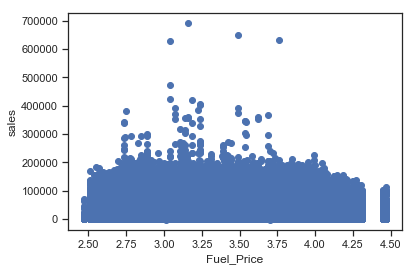

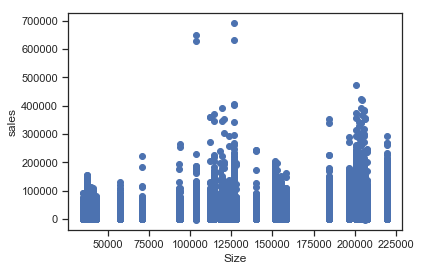

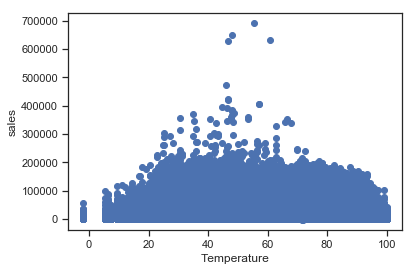

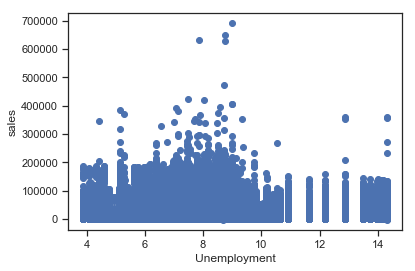

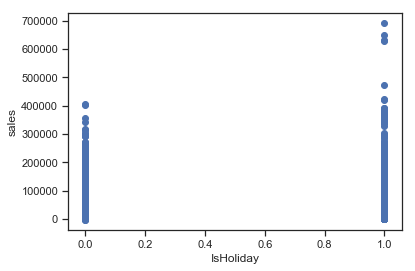

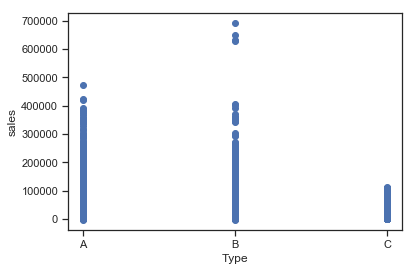

In [126]:
%matplotlib inline
headers = list(df)
labels = headers
scatterplots(df['Fuel_Price'], 'Fuel_Price')
scatterplots(df['Size'], 'Size')
scatterplots(df['Temperature'], 'Temperature')
scatterplots(df['Unemployment'], 'Unemployment')
scatterplots(df['IsHoliday'], 'IsHoliday')
scatterplots(df['Type'], 'Type')

In [127]:
df.loc[df['Weekly_Sales'] >300000]

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
32594       4    72  11/26/2010     381072.11       True        48.08   
36312       4    72  11/25/2011     385051.04       True        47.96   
36557       4     7  12/23/2011     318422.01      False        35.92   
51826       6    72  11/26/2010     342578.65       True        65.79   
55545       6    72  11/25/2011     326866.60       True        62.78   
90645      10    72  11/26/2010     693099.36       True        55.33   
90886      10     7  12/24/2010     406988.63      False        57.06   
90936      10    72  12/24/2010     404245.03      False        57.06   
94393      10    72  11/25/2011     630999.19       True        60.68   
94634      10     7  12/23/2011     341308.00      False        48.36   
110792     12    72  11/26/2010     359995.60       True        47.66   
114299     12    72  11/25/2011     360140.66       True        53.25   
131088     14    72  11/26/2010     474330.10       True        46.15   
131321     14     7  12/24/2010     356867.25      False        30.59   
131368     14    72  12/24/2010     313933.22      False        30.59   
134722     14    72  11/25/2011     375948.31       True        48.71   
170247     18    72  11/26/2010     353008.64       True        40.81   
173813     18    72  11/25/2011     305161.38       True        41.97   
180227     19    72  11/26/2010     339846.03       True        42.62   
190370     20    72  11/26/2010     422306.25       True        46.66   
190660     20    72  12/24/2010     303006.44      False        25.17   
194093     20    72  11/25/2011     392023.02       True        46.38   
210037     22    72  11/26/2010     393705.20       True        44.61   
213530     22    72  11/25/2011     345532.23       True        46.28   
219800     23    72  11/26/2010     369830.98       True        34.95   
223478     23    72  11/25/2011     347680.08       True        35.23   
259799     27    72  11/26/2010     420586.57       True        46.67   
263519     27    72  11/25/2011     368484.19       True        47.88   
269997     28    72  11/26/2010     355356.39       True        47.66   
273668     28    72  11/25/2011     351763.71       True        53.25   
333594     35    72  11/26/2010     627962.93       True        46.67   
337053     35    72  11/25/2011     649770.18       True        47.88   
364033     39    72  11/26/2010     339700.62       True        67.75   
367624     39    72  11/25/2011     351553.98       True        66.36   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
32594        2.752        NaN        NaN        NaN        NaN        NaN   
36312        3.225     561.45     137.88   83340.33      44.04    9239.23   
36557        3.103    2461.94      69.05    2938.24      52.00    4396.76   
51826        2.735        NaN        NaN        NaN        NaN        NaN   
55545        3.236     429.03     171.88   83192.81      15.00     986.23   
90645        3.162        NaN        NaN        NaN        NaN        NaN   
90886        3.236        NaN        NaN        NaN        NaN        NaN   
90936        3.236        NaN        NaN        NaN        NaN        NaN   
94393        3.760     174.72     329.00  141630.61      79.00    1009.98   
94634        3.541     300.02      77.73    2432.01     108.37    4078.21   
110792       3.162        NaN        NaN        NaN        NaN        NaN   
114299       3.622    5391.83       8.00   63143.29      49.27    2115.67   
131088       3.039        NaN        NaN        NaN        NaN        NaN   
131321       3.141        NaN        NaN        NaN        NaN        NaN   
131368       3.141        NaN        NaN        NaN        NaN        NaN   
134722       3.492     286.52      54.00   89402.64      13.00    1915.80   
170247       3.070        NaN        NaN        NaN        NaN        NaN   
173813       3.536     748.82      46.00   71366.86      19.00    

In [128]:
df.loc[df['Weekly_Sales'] >240000]

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
13293       2    72  11/26/2010     285353.53       True        62.98   
13533       2     7  12/24/2010     264837.42      False        49.97   
17017       2    72  11/25/2011     263558.03       True        56.36   
17320       2    92  12/23/2011     257375.39      False        46.66   
32594       4    72  11/26/2010     381072.11       True        48.08   
...       ...   ...         ...           ...        ...          ...   
364033     39    72  11/26/2010     339700.62       True        67.75   
367624     39    72  11/25/2011     351553.98       True        66.36   
383950     41    72  11/26/2010     290809.17       True        25.30   
387605     41    72  11/25/2011     271392.45       True        36.37   
414800     45    72  11/26/2010     240758.86       True        46.15   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
13293        2.735        NaN        NaN        NaN        NaN        NaN   
13533        2.886        NaN        NaN        NaN        NaN        NaN   
17017        3.236     919.71      62.00   77451.26      23.00    1589.43   
17320        3.112    2971.04      15.18    1501.75      88.76    6437.61   
32594        2.752        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
364033       2.735        NaN        NaN        NaN        NaN        NaN   
367624       3.236     224.08     292.94   77126.16      77.74    4875.43   
383950       2.742        NaN        NaN        NaN        NaN        NaN   
387605       3.424     256.95    1053.98   79621.20      40.76    2616.56   
414800       3.039        NaN        NaN        NaN        NaN        NaN   

               CPI  Unemployment Type    Size  Split  
13293   211.406287         8.163    A  202307  Train  
13533   211.064660         8.163    A  202307  Train  
17017   218.113027         7.441    A  202307  Train  
17320   218.999550         7.441    A  202307  Train  
32594   126.669267         7.127    A  205863  Train  
...            ...           ...  ...     ...    ...  
364033  210.515277         8.476    A  184109  Train  
367624  217.181253         7.716    A  184109  Train  
383950  191.012180         7.508    A  196321  Train  
387605  195.770400         6.759    A  196321  Train  
414800  182.783277         8.724    B  118221  Train  

[72 rows x 17 columns]

In [129]:
df.loc[df['Weekly_Sales'] >240000,"Date"]

13293     11/26/2010
13533     12/24/2010
17017     11/25/2011
17320     12/23/2011
32594     11/26/2010
             ...    
364033    11/26/2010
367624    11/25/2011
383950    11/26/2010
387605    11/25/2011
414800    11/26/2010
Name: Date, Length: 72, dtype: object

In [130]:
df.loc[df['Weekly_Sales'] >240000,"Date"].value_counts()

11/26/2010    23
11/25/2011    22
12/24/2010    14
12/23/2011     9
12/17/2010     2
8/26/2011      1
2/5/2010       1
Name: Date, dtype: int64

# Dummy variables: Categorical Data
    
    
Now we have to create some dummy variebles for categorical data.

In [131]:
#Really need these
import pandas as pd 
import numpy as np
from numpy import *

#Handy for debugging
import gc
import time
import warnings
import os

#Date stuff
from datetime import datetime
from datetime import timedelta

#Do some statistics
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss
import math

#Nice graphing tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls

#Machine learning tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse

## Keras for deep learning
import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras import optimizers

## Performance measures
from sklearn.metrics import mean_squared_error

In [132]:
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [133]:
# Make sure we can later recognize what a dummy once belonged to
df['Type'] = 'Type_' + df['Type'].map(str)
df['Store'] = 'Store_' + df['Store'].map(str)
df['Dept'] = 'Dept_' + df['Dept'].map(str)
df['IsHoliday'] = 'IsHoliday_' + df['IsHoliday'].map(str)

In [134]:
df

Store     Dept        Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1    2/5/2010      24924.50  IsHoliday_False   
1        Store_1   Dept_2    2/5/2010      50605.27  IsHoliday_False   
2        Store_1   Dept_3    2/5/2010      13740.12  IsHoliday_False   
3        Store_1   Dept_4    2/5/2010      39954.04  IsHoliday_False   
4        Store_1   Dept_5    2/5/2010      32229.38  IsHoliday_False   
...          ...      ...         ...           ...              ...   
421565  Store_45  Dept_93  10/26/2012       2487.80  IsHoliday_False   
421566  Store_45  Dept_94  10/26/2012       5203.31  IsHoliday_False   
421567  Store_45  Dept_95  10/26/2012      56017.47  IsHoliday_False   
421568  Store_45  Dept_97  10/26/2012       6817.48  IsHoliday_False   
421569  Store_45  Dept_98  10/26/2012       1076.80  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
421565        58.85       3.882    4018.91      58.08      100.0     211.94   
421566        58.85       3.882    4018.91      58.08      100.0     211.94   
421567        58.85       3.882    4018.91      58.08      100.0     211.94   
421568        58.85       3.882    4018.91      58.08      100.0     211.94   
421569        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5         CPI  Unemployment    Type    Size  Split  
0             NaN  211.096358         8.106  Type_A  151315  Train  
1             NaN  211.096358         8.106  Type_A  151315  Train  
2             NaN  211.096358         8.106  Type_A  151315  Train  
3             NaN  211.096358         8.106  Type_A  151315  Train  
4             NaN  211.096358         8.106  Type_A  151315  Train  
...           ...         ...           ...     ...     ...    ...  
421565     858.33  192.308899         8.667  Type_B  118221  Train  
421566     858.33  192.308899         8.667  Type_B  118221  Train  
421567     858.33  192.308899         8.667  Type_B  118221  Train  
421568     858.33  192.308899         8.667  Type_B  118221  Train  
421569     858.33  192.308899         8.667  Type_B  118221  Train  

[421570 rows x 17 columns]

In [135]:
# Create dummies
type_dummies = pd.get_dummies(df['Type'])
store_dummies = pd.get_dummies(df['Store'])
dept_dummies = pd.get_dummies(df['Dept'])
holiday_dummies = pd.get_dummies(df['IsHoliday'])

In [136]:
type_dummies

Type_A  Type_B  Type_C
0            1       0       0
1            1       0       0
2            1       0       0
3            1       0       0
4            1       0       0
...        ...     ...     ...
421565       0       1       0
421566       0       1       0
421567       0       1       0
421568       0       1       0
421569       0       1       0

[421570 rows x 3 columns]

In [137]:
store_dummies

Store_1  Store_10  Store_11  Store_12  Store_13  Store_14  Store_15  \
0             1         0         0         0         0         0         0   
1             1         0         0         0         0         0         0   
2             1         0         0         0         0         0         0   
3             1         0         0         0         0         0         0   
4             1         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
421565        0         0         0         0         0         0         0   
421566        0         0         0         0         0         0         0   
421567        0         0         0         0         0         0         0   
421568        0         0         0         0         0         0         0   
421569        0         0         0         0         0         0         0   

        Store_16  Store_17  Store_18  ...  Store_41  Store_42  Store_43  \
0              0         0         0  ...         0         0         0   
1              0         0         0  ...         0         0         0   
2              0         0         0  ...         0         0         0   
3              0         0         0  ...         0         0         0   
4              0         0         0  ...         0         0         0   
...          ...       ...       ...  ...       ...       ...       ...   
421565         0         0         0  ...         0         0         0   
421566         0         0         0  ...         0         0         0   
421567         0         0         0  ...         0         0         0   
421568         0         0         0  ...         0         0         0   
421569         0         0         0  ...         0         0         0   

        Store_44  Store_45  Store_5  Store_6  Store_7  Store_8  Store_9  
0              0         0        0        0        0        0        0  
1              0         0        0        0        0        0        0  
2              0         0        0        0        0        0        0  
3              0         0        0        0        0        0        0  
4              0         0        0        0        0        0        0  
...          ...       ...      ...      ...      ...      ...      ...  
421565         0         1        0        0        0        0        0  
421566         0         1        0        0        0        0        0  
421567         0         1        0        0        0        0        0  
421568         0         1        0        0        0        0        0  
421569         0         1        0        0        0        0        0  

[421570 rows x 45 columns]

In [138]:
dept_dummies

Dept_1  Dept_10  Dept_11  Dept_12  Dept_13  Dept_14  Dept_16  Dept_17  \
0            1        0        0        0        0        0        0        0   
1            0        0        0        0        0        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        0        0        0        0        0        0        0   
4            0        0        0        0        0        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
421565       0        0        0        0        0        0        0        0   
421566       0        0        0        0        0        0        0        0   
421567       0        0        0        0        0        0        0        0   
421568       0        0        0        0        0        0        0        0   
421569       0        0        0        0        0        0        0        0   

        Dept_18  Dept_19  ...  Dept_90  Dept_91  Dept_92  Dept_93  Dept_94  \
0             0        0  ...        0        0        0        0        0   
1             0        0  ...        0        0        0        0        0   
2             0        0  ...        0        0        0        0        0   
3             0        0  ...        0        0        0        0        0   
4             0        0  ...        0        0        0        0        0   
...         ...      ...  ...      ...      ...      ...      ...      ...   
421565        0        0  ...        0        0        0        1        0   
421566        0        0  ...        0        0        0        0        1   
421567        0        0  ...        0        0        0        0        0   
421568        0        0  ...        0        0        0        0        0   
421569        0        0  ...        0        0        0        0        0   

        Dept_95  Dept_96  Dept_97  Dept_98  Dept_99  
0             0        0        0        0        0  
1             0        0        0        0        0  
2             0        0        0        0        0  
3             0        0        0        0        0  
4             0        0        0        0        0  
...         ...      ...      ...      ...      ...  
421565        0        0        0        0        0  
421566        0        0        0        0        0  
421567        1        0        0        0        0  
421568        0        0        1        0        0  
421569        0        0        0        1        0  

[421570 rows x 81 columns]

In [139]:
holiday_dummies

IsHoliday_False  IsHoliday_True
0                     1               0
1                     1               0
2                     1               0
3                     1               0
4                     1               0
...                 ...             ...
421565                1               0
421566                1               0
421567                1               0
421568                1               0
421569                1               0

[421570 rows x 2 columns]

# Dummy variables: Dates

In [140]:
#df['n_days']=(df['Date'].dt.date-df['Date'].dt.date.min()).apply(lambda x:x.days)
#df['n_days']
#df['n_days'] = [t.n_days for t in pd.DatetimeIndex(df.Date)]
#df['n_days'] = 'n_days_' + df['n_days'].map(str)
#n_days_dummies = pd.get_dummies(df['n_days'] )

In [141]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [142]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week']=df['Date'].dt.week
df['Day']=df['Date'].dt.day
df['n_days']=(df['Date'].dt.date-df['Date'].dt.date.min()).apply(lambda x:x.days)

In [143]:
Year=pd.Series(df['Year'].unique())
Week=pd.Series(df['Week'].unique())
Month=pd.Series(df['Month'].unique())
Day=pd.Series(df['Day'].unique())
n_days=pd.Series(df['n_days'].unique())

In [144]:
#df['n_days'] = [t.n_days for t in pd.DatetimeIndex(df.Date)]
df['n_days'] = 'n_days_' + df['n_days'].map(str)
n_days_dummies = pd.get_dummies(df['n_days'] )
n_days_dummies

n_days_0  n_days_105  n_days_112  n_days_119  n_days_126  n_days_133  \
0              1           0           0           0           0           0   
1              1           0           0           0           0           0   
2              1           0           0           0           0           0   
3              1           0           0           0           0           0   
4              1           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
421565         0           0           0           0           0           0   
421566         0           0           0           0           0           0   
421567         0           0           0           0           0           0   
421568         0           0           0           0           0           0   
421569         0           0           0           0           0           0   

        n_days_14  n_days_140  n_days_147  n_days_154  ...  n_days_938  \
0               0           0           0           0  ...           0   
1               0           0           0           0  ...           0   
2               0           0           0           0  ...           0   
3               0           0           0           0  ...           0   
4               0           0           0           0  ...           0   
...           ...         ...         ...         ...  ...         ...   
421565          0           0           0           0  ...           0   
421566          0           0           0           0  ...           0   
421567          0           0           0           0  ...           0   
421568          0           0           0           0  ...           0   
421569          0           0           0           0  ...           0   

        n_days_945  n_days_952  n_days_959  n_days_966  n_days_973  n_days_98  \
0                0           0           0           0           0          0   
1                0           0           0           0           0          0   
2                0           0           0           0           0          0   
3                0           0           0           0           0          0   
4                0           0           0           0           0          0   
...            ...         ...         ...         ...         ...        ...   
421565           0           0           0           0           0          0   
421566           0           0           0           0           0          0   
421567           0           0           0           0           0          0   
421568           0           0           0           0           0          0   
421569           0           0           0           0           0          0   

        n_days_980  n_days_987  n_days_994  
0                0           0           0  
1                0           0           0  
2                0           0           0  
3                0           0           0  
4                0           0           0  
...            ...         ...         ...  
421565           0           0           1  
421566           0           0           1  
421567           0           0           1  
421568           0           0           1  
421569           0           0           1  

[421570 rows x 143 columns]

In [145]:
df['week'] = [t.week for t in pd.DatetimeIndex(df.Date)]

In [146]:
df['week']

0          5
1          5
2          5
3          5
4          5
          ..
421565    43
421566    43
421567    43
421568    43
421569    43
Name: week, Length: 421570, dtype: int64

In [147]:
df['week'] = 'week_' + df['week'].map(str)

In [148]:
week_dummies = pd.get_dummies(df['week'] )

In [149]:
#df['DateType'] = [datetime.strptime(date, '%m/%d/%Y').date() for date in df['Date'].astype(str).values.tolist()]
#df['Month'] = [date.month for date in df['DateType']]
df['Month'] = [t.month for t in pd.DatetimeIndex(df.Date)]
df['Month'] = 'Month_' + df['Month'].map(str)
Month_dummies = pd.get_dummies(df['Month'] )

In [150]:
#df['DateType'] = [datetime.strptime(date, '%m/%d/%Y').date() for date in df['Date'].astype(str).values.tolist()]
#df['Year'] = [date.year for date in df['DateType']]
df['Year'] = [t.year for t in pd.DatetimeIndex(df.Date)]
df['Year'] = 'Year_' + df['Year'].map(str)
Year_dummies = pd.get_dummies(df['Year'] )

In [151]:
#df['DateType'] = [datetime.strptime(date, '%m/%d/%Y').date() for date in df['Date'].astype(str).values.tolist()]
#df['Day'] = [date.day for date in df['DateType']]
df['Day'] = [t.day for t in pd.DatetimeIndex(df.Date)]
df['Day'] = 'Day_' + df['Day'].map(str)
Day_dummies = pd.get_dummies(df['Day'] )

In [152]:
df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1        Store_1   Dept_2 2010-02-05      50605.27  IsHoliday_False   
2        Store_1   Dept_3 2010-02-05      13740.12  IsHoliday_False   
3        Store_1   Dept_4 2010-02-05      39954.04  IsHoliday_False   
4        Store_1   Dept_5 2010-02-05      32229.38  IsHoliday_False   
...          ...      ...        ...           ...              ...   
421565  Store_45  Dept_93 2012-10-26       2487.80  IsHoliday_False   
421566  Store_45  Dept_94 2012-10-26       5203.31  IsHoliday_False   
421567  Store_45  Dept_95 2012-10-26      56017.47  IsHoliday_False   
421568  Store_45  Dept_97 2012-10-26       6817.48  IsHoliday_False   
421569  Store_45  Dept_98 2012-10-26       1076.80  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             42.31       2.572        NaN        NaN        NaN  ...   
2             42.31       2.572        NaN        NaN        NaN  ...   
3             42.31       2.572        NaN        NaN        NaN  ...   
4             42.31       2.572        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        58.85       3.882    4018.91      58.08      100.0  ...   
421566        58.85       3.882    4018.91      58.08      100.0  ...   
421567        58.85       3.882    4018.91      58.08      100.0  ...   
421568        58.85       3.882    4018.91      58.08      100.0  ...   
421569        58.85       3.882    4018.91      58.08      100.0  ...   

        Unemployment    Type    Size  Split       Year     Month Week     Day  \
0              8.106  Type_A  151315  Train  Year_2010   Month_2    5   Day_5   
1              8.106  Type_A  151315  Train  Year_2010   Month_2    5   Day_5   
2              8.106  Type_A  151315  Train  Year_2010   Month_2    5   Day_5   
3              8.106  Type_A  151315  Train  Year_2010   Month_2    5   Day_5   
4              8.106  Type_A  151315  Train  Year_2010   Month_2    5   Day_5   
...              ...     ...     ...    ...        ...       ...  ...     ...   
421565         8.667  Type_B  118221  Train  Year_2012  Month_10   43  Day_26   
421566         8.667  Type_B  118221  Train  Year_2012  Month_10   43  Day_26   
421567         8.667  Type_B  118221  Train  Year_2012  Month_10   43  Day_26   
421568         8.667  Type_B  118221  Train  Year_2012  Month_10   43  Day_26   
421569         8.667  Type_B  118221  Train  Year_2012  Month_10   43  Day_26   

            n_days     week  
0         n_days_0   week_5  
1         n_days_0   week_5  
2         n_days_0   week_5  
3         n_days_0   week_5  
4         n_days_0   week_5  
...            ...      ...  
421565  n_days_994  week_43  
421566  n_days_994  week_43  
421567  n_days_994  week_43  
421568  n_days_994  week_43  
421569  n_days_994  week_43  

[421570 rows x 23 columns]

In [153]:
Month_dummies

Month_1  Month_10  Month_11  Month_12  Month_2  Month_3  Month_4  \
0             0         0         0         0        1        0        0   
1             0         0         0         0        1        0        0   
2             0         0         0         0        1        0        0   
3             0         0         0         0        1        0        0   
4             0         0         0         0        1        0        0   
...         ...       ...       ...       ...      ...      ...      ...   
421565        0         1         0         0        0        0        0   
421566        0         1         0         0        0        0        0   
421567        0         1         0         0        0        0        0   
421568        0         1         0         0        0        0        0   
421569        0         1         0         0        0        0        0   

        Month_5  Month_6  Month_7  Month_8  Month_9  
0             0        0        0        0        0  
1             0        0        0        0        0  
2             0        0        0        0        0  
3             0        0        0        0        0  
4             0        0        0        0        0  
...         ...      ...      ...      ...      ...  
421565        0        0        0        0        0  
421566        0        0        0        0        0  
421567        0        0        0        0        0  
421568        0        0        0        0        0  
421569        0        0        0        0        0  

[421570 rows x 12 columns]

In [154]:
week_dummies

week_1  week_10  week_11  week_12  week_13  week_14  week_15  week_16  \
0            0        0        0        0        0        0        0        0   
1            0        0        0        0        0        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        0        0        0        0        0        0        0   
4            0        0        0        0        0        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
421565       0        0        0        0        0        0        0        0   
421566       0        0        0        0        0        0        0        0   
421567       0        0        0        0        0        0        0        0   
421568       0        0        0        0        0        0        0        0   
421569       0        0        0        0        0        0        0        0   

        week_17  week_18  ...  week_48  week_49  week_5  week_50  week_51  \
0             0        0  ...        0        0       1        0        0   
1             0        0  ...        0        0       1        0        0   
2             0        0  ...        0        0       1        0        0   
3             0        0  ...        0        0       1        0        0   
4             0        0  ...        0        0       1        0        0   
...         ...      ...  ...      ...      ...     ...      ...      ...   
421565        0        0  ...        0        0       0        0        0   
421566        0        0  ...        0        0       0        0        0   
421567        0        0  ...        0        0       0        0        0   
421568        0        0  ...        0        0       0        0        0   
421569        0        0  ...        0        0       0        0        0   

        week_52  week_6  week_7  week_8  week_9  
0             0       0       0       0       0  
1             0       0       0       0       0  
2             0       0       0       0       0  
3             0       0       0       0       0  
4             0       0       0       0       0  
...         ...     ...     ...     ...     ...  
421565        0       0       0       0       0  
421566        0       0       0       0       0  
421567        0       0       0       0       0  
421568        0       0       0       0       0  
421569        0       0       0       0       0  

[421570 rows x 52 columns]

In [155]:
Year_dummies

Year_2010  Year_2011  Year_2012
0               1          0          0
1               1          0          0
2               1          0          0
3               1          0          0
4               1          0          0
...           ...        ...        ...
421565          0          0          1
421566          0          0          1
421567          0          0          1
421568          0          0          1
421569          0          0          1

[421570 rows x 3 columns]

In [156]:
Day_dummies

Day_1  Day_10  Day_11  Day_12  Day_13  Day_14  Day_15  Day_16  Day_17  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
421565      0       0       0       0       0       0       0       0       0   
421566      0       0       0       0       0       0       0       0       0   
421567      0       0       0       0       0       0       0       0       0   
421568      0       0       0       0       0       0       0       0       0   
421569      0       0       0       0       0       0       0       0       0   

        Day_18  ...  Day_29  Day_3  Day_30  Day_31  Day_4  Day_5  Day_6  \
0            0  ...       0      0       0       0      0      1      0   
1            0  ...       0      0       0       0      0      1      0   
2            0  ...       0      0       0       0      0      1      0   
3            0  ...       0      0       0       0      0      1      0   
4            0  ...       0      0       0       0      0      1      0   
...        ...  ...     ...    ...     ...     ...    ...    ...    ...   
421565       0  ...       0      0       0       0      0      0      0   
421566       0  ...       0      0       0       0      0      0      0   
421567       0  ...       0      0       0       0      0      0      0   
421568       0  ...       0      0       0       0      0      0      0   
421569       0  ...       0      0       0       0      0      0      0   

        Day_7  Day_8  Day_9  
0           0      0      0  
1           0      0      0  
2           0      0      0  
3           0      0      0  
4           0      0      0  
...       ...    ...    ...  
421565      0      0      0  
421566      0      0      0  
421567      0      0      0  
421568      0      0      0  
421569      0      0      0  

[421570 rows x 31 columns]

In [157]:
df['Super_Bowl'] = np.where((df['Date']==datetime(2010, 2, 12).date()) | (df['Date']==datetime(2011, 2, 11).date()) | (df['Date']==datetime(2012, 2, 10).date()) | (df['Date']==datetime(2013, 2, 8).date()), 'yes', 'no')
df['Labor_Day'] = np.where((df['Date']==datetime(2010, 9, 10).date()) | (df['Date']==datetime(2011, 9, 9).date()) | (df['Date']==datetime(2012, 9, 7).date()) | (df['Date']==datetime(2013, 9, 6).date()), 'yes', 'no')
df['Thanksgiving'] = np.where((df['Date']==datetime(2010, 11, 26).date()) | (df['Date']==datetime(2011, 11, 25).date()) | (df['Date']==datetime(2012, 11, 23).date()) | (df['Date']==datetime(2013, 11, 29).date()), 'yes', 'no')
df['Christmas'] = np.where((df['Date']==datetime(2010, 12, 31).date()) | (df['Date']==datetime(2011, 12, 30).date()) | (df['Date']==datetime(2012, 12, 28).date()) | (df['Date']==datetime(2013, 12, 27).date()), 'yes', 'no')

df['Super_Bowl'] = 'Super_Bowl_' + df['Super_Bowl'].map(str)
df['Labor_Day'] = 'Labor_Day_' + df['Labor_Day'].map(str)
df['Thanksgiving'] = 'Thanksgiving_' + df['Thanksgiving'].map(str)
df['Christmas'] = 'Christmas_' + df['Christmas'].map(str)

Super_Bowl_dummies = pd.get_dummies(df['Super_Bowl'] )
Labor_Day_dummies = pd.get_dummies(df['Labor_Day'] )
Thanksgiving_dummies = pd.get_dummies(df['Thanksgiving'] )
Christmas_dummies = pd.get_dummies(df['Christmas'] )

In [158]:
df['Black_Friday'] = np.where((df['Date']==datetime(2010, 11, 26).date()) | (df['Date']==datetime(2011, 11, 25).date()), 'yes', 'no')
df['Pre_christmas'] = np.where((df['Date']==datetime(2010, 12, 23).date()) | (df['Date']==datetime(2010, 12, 24).date()) | (df['Date']==datetime(2011, 12, 23).date()) | (df['Date']==datetime(2011, 12, 24).date()), 'yes', 'no')
df['Black_Friday'] = 'Black_Friday_' + df['Black_Friday'].map(str)
df['Pre_christmas'] = 'Pre_christmas_' + df['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(df['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(df['Pre_christmas'] )

In [159]:
Black_Friday_dummies 

Black_Friday_no  Black_Friday_yes
0                     1                 0
1                     1                 0
2                     1                 0
3                     1                 0
4                     1                 0
...                 ...               ...
421565                1                 0
421566                1                 0
421567                1                 0
421568                1                 0
421569                1                 0

[421570 rows x 2 columns]

In [160]:
Pre_christmas_dummies

Pre_christmas_no  Pre_christmas_yes
0                      1                  0
1                      1                  0
2                      1                  0
3                      1                  0
4                      1                  0
...                  ...                ...
421565                 1                  0
421566                 1                  0
421567                 1                  0
421568                 1                  0
421569                 1                  0

[421570 rows x 2 columns]

In [161]:
Super_Bowl_dummies

Super_Bowl_no  Super_Bowl_yes
0                   1               0
1                   1               0
2                   1               0
3                   1               0
4                   1               0
...               ...             ...
421565              1               0
421566              1               0
421567              1               0
421568              1               0
421569              1               0

[421570 rows x 2 columns]

In [162]:
Labor_Day_dummies

Labor_Day_no  Labor_Day_yes
0                  1              0
1                  1              0
2                  1              0
3                  1              0
4                  1              0
...              ...            ...
421565             1              0
421566             1              0
421567             1              0
421568             1              0
421569             1              0

[421570 rows x 2 columns]

In [163]:
Thanksgiving_dummies

Thanksgiving_no  Thanksgiving_yes
0                     1                 0
1                     1                 0
2                     1                 0
3                     1                 0
4                     1                 0
...                 ...               ...
421565                1                 0
421566                1                 0
421567                1                 0
421568                1                 0
421569                1                 0

[421570 rows x 2 columns]

In [164]:
Christmas_dummies

Christmas_no  Christmas_yes
0                  1              0
1                  1              0
2                  1              0
3                  1              0
4                  1              0
...              ...            ...
421565             1              0
421566             1              0
421567             1              0
421568             1              0
421569             1              0

[421570 rows x 2 columns]

In [165]:
Split_dummies = pd.get_dummies(df['Split'] )
Split_dummies

Train
0           1
1           1
2           1
3           1
4           1
...       ...
421565      1
421566      1
421567      1
421568      1
421569      1

[421570 rows x 1 columns]

In [166]:
# Add dummies
# We will actually skip some of these
#df = pd.concat([df,type_dummies,store_dummies,dept_dummies,holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies,Month_dummies],axis=1)

df = pd.concat([df,Super_Bowl_dummies,Black_Friday_dummies,Pre_christmas_dummies,Labor_Day_dummies,Thanksgiving_dummies,Christmas_dummies,dept_dummies,Day_dummies,n_days_dummies,week_dummies,Year_dummies,holiday_dummies,type_dummies,store_dummies,Split_dummies,Month_dummies],axis=1)

In [167]:
df 

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1        Store_1   Dept_2 2010-02-05      50605.27  IsHoliday_False   
2        Store_1   Dept_3 2010-02-05      13740.12  IsHoliday_False   
3        Store_1   Dept_4 2010-02-05      39954.04  IsHoliday_False   
4        Store_1   Dept_5 2010-02-05      32229.38  IsHoliday_False   
...          ...      ...        ...           ...              ...   
421565  Store_45  Dept_93 2012-10-26       2487.80  IsHoliday_False   
421566  Store_45  Dept_94 2012-10-26       5203.31  IsHoliday_False   
421567  Store_45  Dept_95 2012-10-26      56017.47  IsHoliday_False   
421568  Store_45  Dept_97 2012-10-26       6817.48  IsHoliday_False   
421569  Store_45  Dept_98 2012-10-26       1076.80  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             42.31       2.572        NaN        NaN        NaN  ...   
2             42.31       2.572        NaN        NaN        NaN  ...   
3             42.31       2.572        NaN        NaN        NaN  ...   
4             42.31       2.572        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        58.85       3.882    4018.91      58.08      100.0  ...   
421566        58.85       3.882    4018.91      58.08      100.0  ...   
421567        58.85       3.882    4018.91      58.08      100.0  ...   
421568        58.85       3.882    4018.91      58.08      100.0  ...   
421569        58.85       3.882    4018.91      58.08      100.0  ...   

        Month_11  Month_12  Month_2  Month_3 Month_4  Month_5 Month_6 Month_7  \
0              0         0        1        0       0        0       0       0   
1              0         0        1        0       0        0       0       0   
2              0         0        1        0       0        0       0       0   
3              0         0        1        0       0        0       0       0   
4              0         0        1        0       0        0       0       0   
...          ...       ...      ...      ...     ...      ...     ...     ...   
421565         0         0        0        0       0        0       0       0   
421566         0         0        0        0       0        0       0       0   
421567         0         0        0        0       0        0       0       0   
421568         0         0        0        0       0        0       0       0   
421569         0         0        0        0       0        0       0       0   

       Month_8  Month_9  
0            0        0  
1            0        0  
2            0        0  
3            0        0  
4            0        0  
...        ...      ...  
421565       0        0  
421566       0        0  
421567       0        0  
421568       0        0  
421569       0        0  

[421570 rows x 414 columns]

# Store median
We will take the store median in the available data as one of its properties

In [168]:
# Get dataframe with averages per store and department
medians = pd.DataFrame({'Median_Sales' :df.loc[df['Split']=='Train'].groupby(by=['Type','Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()}).reset_index()
medians.head()

Type    Dept    Store     Month        IsHoliday  Median_Sales
0  Type_A  Dept_1  Store_1   Month_1  IsHoliday_False     17350.585
1  Type_A  Dept_1  Store_1  Month_10  IsHoliday_False     23388.030
2  Type_A  Dept_1  Store_1  Month_11  IsHoliday_False     19551.115
3  Type_A  Dept_1  Store_1  Month_11   IsHoliday_True     19865.770
4  Type_A  Dept_1  Store_1  Month_12  IsHoliday_False     39109.390

In [169]:
medians

Type     Dept     Store     Month        IsHoliday  Median_Sales
0      Type_A   Dept_1   Store_1   Month_1  IsHoliday_False     17350.585
1      Type_A   Dept_1   Store_1  Month_10  IsHoliday_False     23388.030
2      Type_A   Dept_1   Store_1  Month_11  IsHoliday_False     19551.115
3      Type_A   Dept_1   Store_1  Month_11   IsHoliday_True     19865.770
4      Type_A   Dept_1   Store_1  Month_12  IsHoliday_False     39109.390
...       ...      ...       ...       ...              ...           ...
50092  Type_C  Dept_99  Store_43  Month_11  IsHoliday_False        50.000
50093  Type_C  Dept_99  Store_43   Month_5  IsHoliday_False        25.000
50094  Type_C  Dept_99  Store_43   Month_6  IsHoliday_False         5.000
50095  Type_C  Dept_99  Store_44   Month_3  IsHoliday_False         0.010
50096  Type_C  Dept_99  Store_44   Month_7  IsHoliday_False         7.000

[50097 rows x 6 columns]

In [170]:
# Merge by type, store, department and month
df = df.merge(medians, how = 'outer', on = ['Type','Dept','Store','Month','IsHoliday'])

In [171]:
df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1        Store_1   Dept_1 2010-02-19      41595.55  IsHoliday_False   
2        Store_1   Dept_1 2010-02-26      19403.54  IsHoliday_False   
3        Store_1   Dept_1 2011-02-04      21665.76  IsHoliday_False   
4        Store_1   Dept_1 2011-02-18      46845.87  IsHoliday_False   
...          ...      ...        ...           ...              ...   
421565  Store_45  Dept_49 2012-06-29        -34.00  IsHoliday_False   
421566  Store_45  Dept_47 2012-08-03        224.00  IsHoliday_False   
421567  Store_45  Dept_45 2012-09-07         11.94   IsHoliday_True   
421568  Store_45  Dept_47 2012-09-07         39.96   IsHoliday_True   
421569  Store_45  Dept_96 2012-09-14          2.94  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             39.93       2.514        NaN        NaN        NaN  ...   
2             46.63       2.561        NaN        NaN        NaN  ...   
3             42.27       2.989        NaN        NaN        NaN  ...   
4             57.36       3.045        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        75.22       3.506    3291.36     425.60        NaN  ...   
421566        76.58       3.654   24853.05      39.56      17.96  ...   
421567        75.70       3.911   11024.45      12.80      52.63  ...   
421568        75.70       3.911   11024.45      12.80      52.63  ...   
421569        67.87       3.948   11407.95        NaN       4.30  ...   

        Month_12  Month_2  Month_3  Month_4 Month_5  Month_6 Month_7 Month_8  \
0              0        1        0        0       0        0       0       0   
1              0        1        0        0       0        0       0       0   
2              0        1        0        0       0        0       0       0   
3              0        1        0        0       0        0       0       0   
4              0        1        0        0       0        0       0       0   
...          ...      ...      ...      ...     ...      ...     ...     ...   
421565         0        0        0        0       0        1       0       0   
421566         0        0        0        0       0        0       0       1   
421567         0        0        0        0       0        0       0       0   
421568         0        0        0        0       0        0       0       0   
421569         0        0        0        0       0        0       0       0   

       Month_9  Median_Sales  
0            0     23510.490  
1            0     23510.490  
2            0     23510.490  
3            0     23510.490  
4            0     23510.490  
...        ...           ...  
421565       0         4.415  
421566       0       224.000  
421567       1        11.940  
421568       1        39.960  
421569       1         2.940  

[421570 rows x 415 columns]

In [172]:
# Fill NA
df['Median_Sales'].fillna(df['Median_Sales'].loc[df['Split']=='Train'].median(), inplace=True) 

# Create a key for easy access
df['Key'] = df['Type'].map(str)+df['Dept'].map(str)+df['Store'].map(str)+df['Date'].map(str)+df['IsHoliday'].map(str)

In [173]:
df.head()

Store    Dept       Date  Weekly_Sales        IsHoliday  Temperature  \
0  Store_1  Dept_1 2010-02-05      24924.50  IsHoliday_False        42.31   
1  Store_1  Dept_1 2010-02-19      41595.55  IsHoliday_False        39.93   
2  Store_1  Dept_1 2010-02-26      19403.54  IsHoliday_False        46.63   
3  Store_1  Dept_1 2011-02-04      21665.76  IsHoliday_False        42.27   
4  Store_1  Dept_1 2011-02-18      46845.87  IsHoliday_False        57.36   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  Month_2  Month_3  \
0       2.572        NaN        NaN        NaN  ...        1        0   
1       2.514        NaN        NaN        NaN  ...        1        0   
2       2.561        NaN        NaN        NaN  ...        1        0   
3       2.989        NaN        NaN        NaN  ...        1        0   
4       3.045        NaN        NaN        NaN  ...        1        0   

   Month_4  Month_5 Month_6  Month_7 Month_8 Month_9 Median_Sales  \
0        0        0       0        0       0       0     23510.49   
1        0        0       0        0       0       0     23510.49   
2        0        0       0        0       0       0     23510.49   
3        0        0       0        0       0       0     23510.49   
4        0        0       0        0       0       0     23510.49   

                                                 Key  
0  Type_ADept_1Store_12010-02-05 00:00:00IsHolida...  
1  Type_ADept_1Store_12010-02-19 00:00:00IsHolida...  
2  Type_ADept_1Store_12010-02-26 00:00:00IsHolida...  
3  Type_ADept_1Store_12011-02-04 00:00:00IsHolida...  
4  Type_ADept_1Store_12011-02-18 00:00:00IsHolida...  

[5 rows x 416 columns]

In [174]:
df.to_csv("df3.csv")

In [175]:
#df.Key.count

# Lagged Variables

We will take a lagged variable of our store's previous weeks sales.

To do so, we will first add a column with a one week lagged date,

sort the data, and then match the lagged sales with the initial dataframe using the department and store number.

We begin by adding a column with a one week lag.

In [176]:
# Attach variable of last weeks time
df['DateLagged'] = df['Date']- timedelta(days=7)
df.head()

Store    Dept       Date  Weekly_Sales        IsHoliday  Temperature  \
0  Store_1  Dept_1 2010-02-05      24924.50  IsHoliday_False        42.31   
1  Store_1  Dept_1 2010-02-19      41595.55  IsHoliday_False        39.93   
2  Store_1  Dept_1 2010-02-26      19403.54  IsHoliday_False        46.63   
3  Store_1  Dept_1 2011-02-04      21665.76  IsHoliday_False        42.27   
4  Store_1  Dept_1 2011-02-18      46845.87  IsHoliday_False        57.36   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  Month_3  Month_4  \
0       2.572        NaN        NaN        NaN  ...        0        0   
1       2.514        NaN        NaN        NaN  ...        0        0   
2       2.561        NaN        NaN        NaN  ...        0        0   
3       2.989        NaN        NaN        NaN  ...        0        0   
4       3.045        NaN        NaN        NaN  ...        0        0   

   Month_5  Month_6 Month_7  Month_8 Month_9 Median_Sales  \
0        0        0       0        0       0     23510.49   
1        0        0       0        0       0     23510.49   
2        0        0       0        0       0     23510.49   
3        0        0       0        0       0     23510.49   
4        0        0       0        0       0     23510.49   

                                                 Key  DateLagged  
0  Type_ADept_1Store_12010-02-05 00:00:00IsHolida...  2010-01-29  
1  Type_ADept_1Store_12010-02-19 00:00:00IsHolida...  2010-02-12  
2  Type_ADept_1Store_12010-02-26 00:00:00IsHolida...  2010-02-19  
3  Type_ADept_1Store_12011-02-04 00:00:00IsHolida...  2011-01-28  
4  Type_ADept_1Store_12011-02-18 00:00:00IsHolida...  2011-02-11  

[5 rows x 417 columns]

In [177]:
df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1        Store_1   Dept_1 2010-02-19      41595.55  IsHoliday_False   
2        Store_1   Dept_1 2010-02-26      19403.54  IsHoliday_False   
3        Store_1   Dept_1 2011-02-04      21665.76  IsHoliday_False   
4        Store_1   Dept_1 2011-02-18      46845.87  IsHoliday_False   
...          ...      ...        ...           ...              ...   
421565  Store_45  Dept_49 2012-06-29        -34.00  IsHoliday_False   
421566  Store_45  Dept_47 2012-08-03        224.00  IsHoliday_False   
421567  Store_45  Dept_45 2012-09-07         11.94   IsHoliday_True   
421568  Store_45  Dept_47 2012-09-07         39.96   IsHoliday_True   
421569  Store_45  Dept_96 2012-09-14          2.94  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             39.93       2.514        NaN        NaN        NaN  ...   
2             46.63       2.561        NaN        NaN        NaN  ...   
3             42.27       2.989        NaN        NaN        NaN  ...   
4             57.36       3.045        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        75.22       3.506    3291.36     425.60        NaN  ...   
421566        76.58       3.654   24853.05      39.56      17.96  ...   
421567        75.70       3.911   11024.45      12.80      52.63  ...   
421568        75.70       3.911   11024.45      12.80      52.63  ...   
421569        67.87       3.948   11407.95        NaN       4.30  ...   

        Month_3  Month_4  Month_5  Month_6 Month_7  Month_8 Month_9  \
0             0        0        0        0       0        0       0   
1             0        0        0        0       0        0       0   
2             0        0        0        0       0        0       0   
3             0        0        0        0       0        0       0   
4             0        0        0        0       0        0       0   
...         ...      ...      ...      ...     ...      ...     ...   
421565        0        0        0        1       0        0       0   
421566        0        0        0        0       0        1       0   
421567        0        0        0        0       0        0       1   
421568        0        0        0        0       0        0       1   
421569        0        0        0        0       0        0       1   

       Median_Sales                                                Key  \
0         23510.490  Type_ADept_1Store_12010-02-05 00:00:00IsHolida...   
1         23510.490  Type_ADept_1Store_12010-02-19 00:00:00IsHolida...   
2         23510.490  Type_ADept_1Store_12010-02-26 00:00:00IsHolida...   
3         23510.490  Type_ADept_1Store_12011-02-04 00:00:00IsHolida...   
4         23510.490  Type_ADept_1Store_12011-02-18 00:00:00IsHolida...   
...             ...                                                ...   
421565        4.415  Type_BDept_49Store_452012-06-29 00:00:00IsHoli...   
421566      224.000  Type_BDept_47Store_452012-08-03 00:00:00IsHoli...   
421567       11.940  Type_BDept_45Store_452012-09-07 00:00:00IsHoli...   
421568       39.960  Type_BDept_47Store_452012-09-07 00:00:00IsHoli...   
421569        2.940  Type_BDept_96Store_452012-09-14 00:00:00IsHoli...   

        DateLagged  
0       2010-01-29  
1       2010-02-12  
2       2010-02-19  
3       2011-01-28  
4       2011-02-11  
...            ...  
421565  2012-06-22  
421566  2012-07-27  
421567  2012-08-31  
421568  2012-08-31  
421569  2012-09-07  

[421570 rows x 417 columns]

Next, we create a sorted dataframe.

In [178]:
# Make a sorted dataframe. This will allow us to find lagged variables much faster!
sorted_df = df.sort_values(['Store', 'Dept','Date'], ascending=[1, 1,1])
sorted_df = sorted_df.reset_index(drop=True) # Reinitialize the row indices for the loop to work

In [179]:
sorted_df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0       Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1       Store_1   Dept_1 2010-02-12      46039.49   IsHoliday_True   
2       Store_1   Dept_1 2010-02-19      41595.55  IsHoliday_False   
3       Store_1   Dept_1 2010-02-26      19403.54  IsHoliday_False   
4       Store_1   Dept_1 2010-03-05      21827.90  IsHoliday_False   
...         ...      ...        ...           ...              ...   
421565  Store_9  Dept_98 2011-12-16         66.75  IsHoliday_False   
421566  Store_9  Dept_98 2011-12-23         25.50  IsHoliday_False   
421567  Store_9  Dept_98 2012-01-06          0.50  IsHoliday_False   
421568  Store_9  Dept_98 2012-01-27         -1.00  IsHoliday_False   
421569  Store_9  Dept_98 2012-05-18          6.00  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             38.51       2.548        NaN        NaN        NaN  ...   
2             39.93       2.514        NaN        NaN        NaN  ...   
3             46.63       2.561        NaN        NaN        NaN  ...   
4             46.50       2.625        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        47.31       3.159    2755.90        NaN     136.48  ...   
421566        44.43       3.112     719.14       0.24     318.75  ...   
421567        47.54       3.157    3597.08    6203.76      11.20  ...   
421568        49.38       3.290     489.19     283.85        NaN  ...   
421569        69.52       3.630    1926.92        NaN       0.24  ...   

        Month_3  Month_4  Month_5  Month_6 Month_7  Month_8 Month_9  \
0             0        0        0        0       0        0       0   
1             0        0        0        0       0        0       0   
2             0        0        0        0       0        0       0   
3             0        0        0        0       0        0       0   
4             1        0        0        0       0        0       0   
...         ...      ...      ...      ...     ...      ...     ...   
421565        0        0        0        0       0        0       0   
421566        0        0        0        0       0        0       0   
421567        0        0        0        0       0        0       0   
421568        0        0        0        0       0        0       0   
421569        0        0        1        0       0        0       0   

       Median_Sales                                                Key  \
0          23510.49  Type_ADept_1Store_12010-02-05 00:00:00IsHolida...   
1          37887.17  Type_ADept_1Store_12010-02-12 00:00:00IsHolida...   
2          23510.49  Type_ADept_1Store_12010-02-19 00:00:00IsHolida...   
3          23510.49  Type_ADept_1Store_12010-02-26 00:00:00IsHolida...   
4          21280.40  Type_ADept_1Store_12010-03-05 00:00:00IsHolida...   
...             ...                                                ...   
421565        60.75  Type_BDept_98Store_92011-12-16 00:00:00IsHolid...   
421566        60.75  Type_BDept_98Store_92011-12-23 00:00:00IsHolid...   
421567        -0.25  Type_BDept_98Store_92012-01-06 00:00:00IsHolid...   
421568        -0.25  Type_BDept_98Store_92012-01-27 00:00:00IsHolid...   
421569         6.00  Type_BDept_98Store_92012-05-18 00:00:00IsHolid...   

        DateLagged  
0       2010-01-29  
1       2010-02-05  
2       2010-02-12  
3       2010-02-19  
4       2010-02-26  
...            ...  
421565  2011-12-09  
421566  2011-12-16  
421567  2011-12-30  
421568  2012-01-20  
421569  2012-05-11  

[421570 rows x 417 columns]

In [180]:
sorted_df['LaggedSales'] = np.nan # Initialize column
sorted_df['LaggedAvailable'] = np.nan # Initialize column
last=df.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_df.shape[0]
for index, row in sorted_df.iterrows():
    lag_date = row["DateLagged"]
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    if((last['Date']== lag_date) & (last['Weekly_Sales']>0)): 
        sorted_df.set_value(index, 'LaggedSales',last['Weekly_Sales'])
        sorted_df.set_value(index, 'LaggedAvailable',1)
    else:
        sorted_df.set_value(index, 'LaggedSales',row['Median_Sales']) # Fill with median
        sorted_df.set_value(index, 'LaggedAvailable',0)

    last = row #Remember last row for speed
    if(index%int(row_len/10)==0): #See progress by printing every 10% interval
        print(str(int(index*100/row_len))+'% loaded')

0% loaded
10% loaded
20% loaded
30% loaded
40% loaded
50% loaded
60% loaded
70% loaded
80% loaded
90% loaded


In [181]:
sorted_df[['Dept', 'Store','Date','LaggedSales','Weekly_Sales','Median_Sales']].head()

Dept    Store       Date  LaggedSales  Weekly_Sales  Median_Sales
0  Dept_1  Store_1 2010-02-05     23510.49      24924.50      23510.49
1  Dept_1  Store_1 2010-02-12     24924.50      46039.49      37887.17
2  Dept_1  Store_1 2010-02-19     46039.49      41595.55      23510.49
3  Dept_1  Store_1 2010-02-26     41595.55      19403.54      23510.49
4  Dept_1  Store_1 2010-03-05     19403.54      21827.90      21280.40

In [182]:
sorted_df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0       Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1       Store_1   Dept_1 2010-02-12      46039.49   IsHoliday_True   
2       Store_1   Dept_1 2010-02-19      41595.55  IsHoliday_False   
3       Store_1   Dept_1 2010-02-26      19403.54  IsHoliday_False   
4       Store_1   Dept_1 2010-03-05      21827.90  IsHoliday_False   
...         ...      ...        ...           ...              ...   
421565  Store_9  Dept_98 2011-12-16         66.75  IsHoliday_False   
421566  Store_9  Dept_98 2011-12-23         25.50  IsHoliday_False   
421567  Store_9  Dept_98 2012-01-06          0.50  IsHoliday_False   
421568  Store_9  Dept_98 2012-01-27         -1.00  IsHoliday_False   
421569  Store_9  Dept_98 2012-05-18          6.00  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             38.51       2.548        NaN        NaN        NaN  ...   
2             39.93       2.514        NaN        NaN        NaN  ...   
3             46.63       2.561        NaN        NaN        NaN  ...   
4             46.50       2.625        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        47.31       3.159    2755.90        NaN     136.48  ...   
421566        44.43       3.112     719.14       0.24     318.75  ...   
421567        47.54       3.157    3597.08    6203.76      11.20  ...   
421568        49.38       3.290     489.19     283.85        NaN  ...   
421569        69.52       3.630    1926.92        NaN       0.24  ...   

        Month_5  Month_6  Month_7  Month_8 Month_9  Median_Sales  \
0             0        0        0        0       0      23510.49   
1             0        0        0        0       0      37887.17   
2             0        0        0        0       0      23510.49   
3             0        0        0        0       0      23510.49   
4             0        0        0        0       0      21280.40   
...         ...      ...      ...      ...     ...           ...   
421565        0        0        0        0       0         60.75   
421566        0        0        0        0       0         60.75   
421567        0        0        0        0       0         -0.25   
421568        0        0        0        0       0         -0.25   
421569        1        0        0        0       0          6.00   

                                                      Key DateLagged  \
0       Type_ADept_1Store_12010-02-05 00:00:00IsHolida... 2010-01-29   
1       Type_ADept_1Store_12010-02-12 00:00:00IsHolida... 2010-02-05   
2       Type_ADept_1Store_12010-02-19 00:00:00IsHolida... 2010-02-12   
3       Type_ADept_1Store_12010-02-26 00:00:00IsHolida... 2010-02-19   
4       Type_ADept_1Store_12010-03-05 00:00:00IsHolida... 2010-02-26   
...                                                   ...        ...   
421565  Type_BDept_98Store_92011-12-16 00:00:00IsHolid... 2011-12-09   
421566  Type_BDept_98Store_92011-12-23 00:00:00IsHolid... 2011-12-16   
421567  Type_BDept_98Store_92012-01-06 00:00:00IsHolid... 2011-12-30   
421568  Type_BDept_98Store_92012-01-27 00:00:00IsHolid... 2012-01-20   
421569  Type_BDept_98Store_92012-05-18 00:00:00IsHolid... 2012-05-11   

       LaggedSales  LaggedAvailable  
0         23510.49              0.0  
1         24924.50              1.0  
2         46039.49              1.0  
3         41595.55              1.0  
4         19403.54              1.0  
...            ...              ...  
421565       75.77              1.0  
421566       66.75              1.0  
421567       -0.25              0.0  
421568       -0.25              0.0  
421569        6.00              0.0  

[421570 rows x 419 columns]

Now, merge this new info with our existing dataset.

In [183]:
# Merge by store and department
df = df.merge(sorted_df[['Dept', 'Store','Date','LaggedSales','LaggedAvailable']], how = 'inner', on = ['Dept', 'Store','Date'])

In [184]:
df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1        Store_1   Dept_1 2010-02-19      41595.55  IsHoliday_False   
2        Store_1   Dept_1 2010-02-26      19403.54  IsHoliday_False   
3        Store_1   Dept_1 2011-02-04      21665.76  IsHoliday_False   
4        Store_1   Dept_1 2011-02-18      46845.87  IsHoliday_False   
...          ...      ...        ...           ...              ...   
421565  Store_45  Dept_49 2012-06-29        -34.00  IsHoliday_False   
421566  Store_45  Dept_47 2012-08-03        224.00  IsHoliday_False   
421567  Store_45  Dept_45 2012-09-07         11.94   IsHoliday_True   
421568  Store_45  Dept_47 2012-09-07         39.96   IsHoliday_True   
421569  Store_45  Dept_96 2012-09-14          2.94  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             39.93       2.514        NaN        NaN        NaN  ...   
2             46.63       2.561        NaN        NaN        NaN  ...   
3             42.27       2.989        NaN        NaN        NaN  ...   
4             57.36       3.045        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        75.22       3.506    3291.36     425.60        NaN  ...   
421566        76.58       3.654   24853.05      39.56      17.96  ...   
421567        75.70       3.911   11024.45      12.80      52.63  ...   
421568        75.70       3.911   11024.45      12.80      52.63  ...   
421569        67.87       3.948   11407.95        NaN       4.30  ...   

        Month_5  Month_6  Month_7  Month_8 Month_9  Median_Sales  \
0             0        0        0        0       0     23510.490   
1             0        0        0        0       0     23510.490   
2             0        0        0        0       0     23510.490   
3             0        0        0        0       0     23510.490   
4             0        0        0        0       0     23510.490   
...         ...      ...      ...      ...     ...           ...   
421565        0        1        0        0       0         4.415   
421566        0        0        0        1       0       224.000   
421567        0        0        0        0       1        11.940   
421568        0        0        0        0       1        39.960   
421569        0        0        0        0       1         2.940   

                                                      Key DateLagged  \
0       Type_ADept_1Store_12010-02-05 00:00:00IsHolida... 2010-01-29   
1       Type_ADept_1Store_12010-02-19 00:00:00IsHolida... 2010-02-12   
2       Type_ADept_1Store_12010-02-26 00:00:00IsHolida... 2010-02-19   
3       Type_ADept_1Store_12011-02-04 00:00:00IsHolida... 2011-01-28   
4       Type_ADept_1Store_12011-02-18 00:00:00IsHolida... 2011-02-11   
...                                                   ...        ...   
421565  Type_BDept_49Store_452012-06-29 00:00:00IsHoli... 2012-06-22   
421566  Type_BDept_47Store_452012-08-03 00:00:00IsHoli... 2012-07-27   
421567  Type_BDept_45Store_452012-09-07 00:00:00IsHoli... 2012-08-31   
421568  Type_BDept_47Store_452012-09-07 00:00:00IsHoli... 2012-08-31   
421569  Type_BDept_96Store_452012-09-14 00:00:00IsHoli... 2012-09-07   

       LaggedSales  LaggedAvailable  
0         23510.49              0.0  
1         46039.49              1.0  
2         41595.55              1.0  
3         18461.18              1.0  
4         37887.17              1.0  
...            ...              ...  
421565       20.00              1.0  
421566      224.00              0.0  
421567       11.94              0.0  
421568       39.96              0.0  
421569        2.94              0.0  

[421570 rows x 419 columns]

In [185]:
df['Sales_dif'] = df['Median_Sales'] - df['LaggedSales']
df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1        Store_1   Dept_1 2010-02-19      41595.55  IsHoliday_False   
2        Store_1   Dept_1 2010-02-26      19403.54  IsHoliday_False   
3        Store_1   Dept_1 2011-02-04      21665.76  IsHoliday_False   
4        Store_1   Dept_1 2011-02-18      46845.87  IsHoliday_False   
...          ...      ...        ...           ...              ...   
421565  Store_45  Dept_49 2012-06-29        -34.00  IsHoliday_False   
421566  Store_45  Dept_47 2012-08-03        224.00  IsHoliday_False   
421567  Store_45  Dept_45 2012-09-07         11.94   IsHoliday_True   
421568  Store_45  Dept_47 2012-09-07         39.96   IsHoliday_True   
421569  Store_45  Dept_96 2012-09-14          2.94  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             39.93       2.514        NaN        NaN        NaN  ...   
2             46.63       2.561        NaN        NaN        NaN  ...   
3             42.27       2.989        NaN        NaN        NaN  ...   
4             57.36       3.045        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        75.22       3.506    3291.36     425.60        NaN  ...   
421566        76.58       3.654   24853.05      39.56      17.96  ...   
421567        75.70       3.911   11024.45      12.80      52.63  ...   
421568        75.70       3.911   11024.45      12.80      52.63  ...   
421569        67.87       3.948   11407.95        NaN       4.30  ...   

        Month_6  Month_7  Month_8  Month_9 Median_Sales  \
0             0        0        0        0    23510.490   
1             0        0        0        0    23510.490   
2             0        0        0        0    23510.490   
3             0        0        0        0    23510.490   
4             0        0        0        0    23510.490   
...         ...      ...      ...      ...          ...   
421565        1        0        0        0        4.415   
421566        0        0        1        0      224.000   
421567        0        0        0        1       11.940   
421568        0        0        0        1       39.960   
421569        0        0        0        1        2.940   

                                                      Key DateLagged  \
0       Type_ADept_1Store_12010-02-05 00:00:00IsHolida... 2010-01-29   
1       Type_ADept_1Store_12010-02-19 00:00:00IsHolida... 2010-02-12   
2       Type_ADept_1Store_12010-02-26 00:00:00IsHolida... 2010-02-19   
3       Type_ADept_1Store_12011-02-04 00:00:00IsHolida... 2011-01-28   
4       Type_ADept_1Store_12011-02-18 00:00:00IsHolida... 2011-02-11   
...                                                   ...        ...   
421565  Type_BDept_49Store_452012-06-29 00:00:00IsHoli... 2012-06-22   
421566  Type_BDept_47Store_452012-08-03 00:00:00IsHoli... 2012-07-27   
421567  Type_BDept_45Store_452012-09-07 00:00:00IsHoli... 2012-08-31   
421568  Type_BDept_47Store_452012-09-07 00:00:00IsHoli... 2012-08-31   
421569  Type_BDept_96Store_452012-09-14 00:00:00IsHoli... 2012-09-07   

       LaggedSales LaggedAvailable  Sales_dif  
0         23510.49             0.0      0.000  
1         46039.49             1.0 -22529.000  
2         41595.55             1.0 -18085.060  
3         18461.18             1.0   5049.310  
4         37887.17             1.0 -14376.680  
...            ...             ...        ...  
421565       20.00             1.0    -15.585  
421566      224.00             0.0      0.000  
421567       11.94             0.0      0.000  
421568       39.96             0.0      0.000  
421569        2.94             0.0      0.000  

[421570 rows x 420 columns]

In [186]:
df[['Dept', 'Store','Date','LaggedSales','Weekly_Sales','Median_Sales','Sales_dif']].head()
df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1        Store_1   Dept_1 2010-02-19      41595.55  IsHoliday_False   
2        Store_1   Dept_1 2010-02-26      19403.54  IsHoliday_False   
3        Store_1   Dept_1 2011-02-04      21665.76  IsHoliday_False   
4        Store_1   Dept_1 2011-02-18      46845.87  IsHoliday_False   
...          ...      ...        ...           ...              ...   
421565  Store_45  Dept_49 2012-06-29        -34.00  IsHoliday_False   
421566  Store_45  Dept_47 2012-08-03        224.00  IsHoliday_False   
421567  Store_45  Dept_45 2012-09-07         11.94   IsHoliday_True   
421568  Store_45  Dept_47 2012-09-07         39.96   IsHoliday_True   
421569  Store_45  Dept_96 2012-09-14          2.94  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             39.93       2.514        NaN        NaN        NaN  ...   
2             46.63       2.561        NaN        NaN        NaN  ...   
3             42.27       2.989        NaN        NaN        NaN  ...   
4             57.36       3.045        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        75.22       3.506    3291.36     425.60        NaN  ...   
421566        76.58       3.654   24853.05      39.56      17.96  ...   
421567        75.70       3.911   11024.45      12.80      52.63  ...   
421568        75.70       3.911   11024.45      12.80      52.63  ...   
421569        67.87       3.948   11407.95        NaN       4.30  ...   

        Month_6  Month_7  Month_8  Month_9 Median_Sales  \
0             0        0        0        0    23510.490   
1             0        0        0        0    23510.490   
2             0        0        0        0    23510.490   
3             0        0        0        0    23510.490   
4             0        0        0        0    23510.490   
...         ...      ...      ...      ...          ...   
421565        1        0        0        0        4.415   
421566        0        0        1        0      224.000   
421567        0        0        0        1       11.940   
421568        0        0        0        1       39.960   
421569        0        0        0        1        2.940   

                                                      Key DateLagged  \
0       Type_ADept_1Store_12010-02-05 00:00:00IsHolida... 2010-01-29   
1       Type_ADept_1Store_12010-02-19 00:00:00IsHolida... 2010-02-12   
2       Type_ADept_1Store_12010-02-26 00:00:00IsHolida... 2010-02-19   
3       Type_ADept_1Store_12011-02-04 00:00:00IsHolida... 2011-01-28   
4       Type_ADept_1Store_12011-02-18 00:00:00IsHolida... 2011-02-11   
...                                                   ...        ...   
421565  Type_BDept_49Store_452012-06-29 00:00:00IsHoli... 2012-06-22   
421566  Type_BDept_47Store_452012-08-03 00:00:00IsHoli... 2012-07-27   
421567  Type_BDept_45Store_452012-09-07 00:00:00IsHoli... 2012-08-31   
421568  Type_BDept_47Store_452012-09-07 00:00:00IsHoli... 2012-08-31   
421569  Type_BDept_96Store_452012-09-14 00:00:00IsHoli... 2012-09-07   

       LaggedSales LaggedAvailable  Sales_dif  
0         23510.49             0.0      0.000  
1         46039.49             1.0 -22529.000  
2         41595.55             1.0 -18085.060  
3         18461.18             1.0   5049.310  
4         37887.17             1.0 -14376.680  
...            ...             ...        ...  
421565       20.00             1.0    -15.585  
421566      224.00             0.0      0.000  
421567       11.94             0.0      0.000  
421568       39.96             0.0      0.000  
421569        2.94             0.0      0.000  

[421570 rows x 420 columns]

# Remove redundant items
We will take the store average in the available data as one of its properties

In [187]:
switch= 1

if(switch):
    df_backup = df
else:
    df=df_backup
    display(df_backup.head())

# Scale Variables

To make the job of our models easier in the next phase, we normalize our continous data. This is also called feature scaling.

In [188]:
df['Difference'] = df['Median_Sales'] - df['Weekly_Sales']

In [189]:
df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1        Store_1   Dept_1 2010-02-19      41595.55  IsHoliday_False   
2        Store_1   Dept_1 2010-02-26      19403.54  IsHoliday_False   
3        Store_1   Dept_1 2011-02-04      21665.76  IsHoliday_False   
4        Store_1   Dept_1 2011-02-18      46845.87  IsHoliday_False   
...          ...      ...        ...           ...              ...   
421565  Store_45  Dept_49 2012-06-29        -34.00  IsHoliday_False   
421566  Store_45  Dept_47 2012-08-03        224.00  IsHoliday_False   
421567  Store_45  Dept_45 2012-09-07         11.94   IsHoliday_True   
421568  Store_45  Dept_47 2012-09-07         39.96   IsHoliday_True   
421569  Store_45  Dept_96 2012-09-14          2.94  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             39.93       2.514        NaN        NaN        NaN  ...   
2             46.63       2.561        NaN        NaN        NaN  ...   
3             42.27       2.989        NaN        NaN        NaN  ...   
4             57.36       3.045        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        75.22       3.506    3291.36     425.60        NaN  ...   
421566        76.58       3.654   24853.05      39.56      17.96  ...   
421567        75.70       3.911   11024.45      12.80      52.63  ...   
421568        75.70       3.911   11024.45      12.80      52.63  ...   
421569        67.87       3.948   11407.95        NaN       4.30  ...   

        Month_7  Month_8  Month_9  Median_Sales  \
0             0        0        0     23510.490   
1             0        0        0     23510.490   
2             0        0        0     23510.490   
3             0        0        0     23510.490   
4             0        0        0     23510.490   
...         ...      ...      ...           ...   
421565        0        0        0         4.415   
421566        0        1        0       224.000   
421567        0        0        1        11.940   
421568        0        0        1        39.960   
421569        0        0        1         2.940   

                                                      Key  DateLagged  \
0       Type_ADept_1Store_12010-02-05 00:00:00IsHolida...  2010-01-29   
1       Type_ADept_1Store_12010-02-19 00:00:00IsHolida...  2010-02-12   
2       Type_ADept_1Store_12010-02-26 00:00:00IsHolida...  2010-02-19   
3       Type_ADept_1Store_12011-02-04 00:00:00IsHolida...  2011-01-28   
4       Type_ADept_1Store_12011-02-18 00:00:00IsHolida...  2011-02-11   
...                                                   ...         ...   
421565  Type_BDept_49Store_452012-06-29 00:00:00IsHoli...  2012-06-22   
421566  Type_BDept_47Store_452012-08-03 00:00:00IsHoli...  2012-07-27   
421567  Type_BDept_45Store_452012-09-07 00:00:00IsHoli...  2012-08-31   
421568  Type_BDept_47Store_452012-09-07 00:00:00IsHoli...  2012-08-31   
421569  Type_BDept_96Store_452012-09-14 00:00:00IsHoli...  2012-09-07   

       LaggedSales LaggedAvailable  Sales_dif  Difference  
0         23510.49             0.0      0.000   -1414.010  
1         46039.49             1.0 -22529.000  -18085.060  
2         41595.55             1.0 -18085.060    4106.950  
3         18461.18             1.0   5049.310    1844.730  
4         37887.17             1.0 -14376.680  -23335.380  
...            ...             ...        ...         ...  
421565       20.00             1.0    -15.585      38.415  
421566      224.00             0.0      0.000       0.000  
421567       11.94             0.0      0.000       0.000  
421568       39.96             0.0      0.000       0.000  
421569        2.94             0.0      0.000       0.000  

[421570 rows x 421 columns]

# Feature Engineering

In [190]:
#encoding for IsHoliday
df.IsHoliday=df.IsHoliday.astype(object)
df.IsHoliday

0         IsHoliday_False
1         IsHoliday_False
2         IsHoliday_False
3         IsHoliday_False
4         IsHoliday_False
               ...       
421565    IsHoliday_False
421566    IsHoliday_False
421567     IsHoliday_True
421568     IsHoliday_True
421569    IsHoliday_False
Name: IsHoliday, Length: 421570, dtype: object

[]

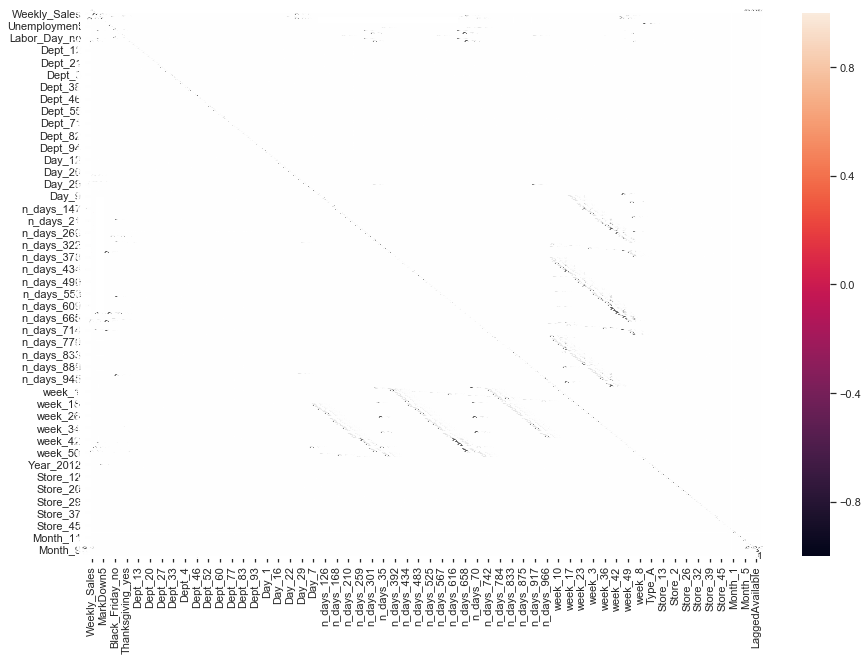

In [191]:
# Plotting correlation between all important features
corr =df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

Observations

Not many features are correlated apart from MarkDown1 and MarkDown4 and Fuel_Price and year
Size and Type are negative correlated
Correlated Features should be deleted

In [192]:
df.head(10)

Store    Dept       Date  Weekly_Sales        IsHoliday  Temperature  \
0  Store_1  Dept_1 2010-02-05      24924.50  IsHoliday_False        42.31   
1  Store_1  Dept_1 2010-02-19      41595.55  IsHoliday_False        39.93   
2  Store_1  Dept_1 2010-02-26      19403.54  IsHoliday_False        46.63   
3  Store_1  Dept_1 2011-02-04      21665.76  IsHoliday_False        42.27   
4  Store_1  Dept_1 2011-02-18      46845.87  IsHoliday_False        57.36   
5  Store_1  Dept_1 2011-02-25      19363.83  IsHoliday_False        62.90   
6  Store_1  Dept_1 2012-02-03      23510.49  IsHoliday_False        56.55   
7  Store_1  Dept_1 2012-02-17      54060.10  IsHoliday_False        45.32   
8  Store_1  Dept_1 2012-02-24      20124.22  IsHoliday_False        57.25   
9  Store_1  Dept_2 2010-02-05      50605.27  IsHoliday_False        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  Month_7  Month_8  \
0       2.572        NaN        NaN        NaN  ...        0        0   
1       2.514        NaN        NaN        NaN  ...        0        0   
2       2.561        NaN        NaN        NaN  ...        0        0   
3       2.989        NaN        NaN        NaN  ...        0        0   
4       3.045        NaN        NaN        NaN  ...        0        0   
5       3.065        NaN        NaN        NaN  ...        0        0   
6       3.360   34577.06    3579.21     160.53  ...        0        0   
7       3.510    9873.33   11062.27       9.80  ...        0        0   
8       3.555    9349.61    7556.01       3.20  ...        0        0   
9       2.572        NaN        NaN        NaN  ...        0        0   

   Month_9  Median_Sales                                                Key  \
0        0      23510.49  Type_ADept_1Store_12010-02-05 00:00:00IsHolida...   
1        0      23510.49  Type_ADept_1Store_12010-02-19 00:00:00IsHolida...   
2        0      23510.49  Type_ADept_1Store_12010-02-26 00:00:00IsHolida...   
3        0      23510.49  Type_ADept_1Store_12011-02-04 00:00:00IsHolida...   
4        0      23510.49  Type_ADept_1Store_12011-02-18 00:00:00IsHolida...   
5        0      23510.49  Type_ADept_1Store_12011-02-25 00:00:00IsHolida...   
6        0      23510.49  Type_ADept_1Store_12012-02-03 00:00:00IsHolida...   
7        0      23510.49  Type_ADept_1Store_12012-02-17 00:00:00IsHolida...   
8        0      23510.49  Type_ADept_1Store_12012-02-24 00:00:00IsHolida...   
9        0      47080.12  Type_ADept_2Store_12010-02-05 00:00:00IsHolida...   

   DateLagged LaggedSales LaggedAvailable Sales_dif  Difference  
0  2010-01-29    23510.49             0.0      0.00    -1414.01  
1  2010-02-12    46039.49             1.0 -22529.00   -18085.06  
2  2010-02-19    41595.55             1.0 -18085.06     4106.95  
3  2011-01-28    18461.18             1.0   5049.31     1844.73  
4  2011-02-11    37887.17             1.0 -14376.68   -23335.38  
5  2011-02-18    46845.87             1.0 -23335.38     4146.66  
6  2012-01-27    18378.16             1.0   5132.33        0.00  
7  2012-02-10    36988.49             1.0 -13478.00   -30549.61  
8  2012-02-17    54060.10             1.0 -30549.61     3386.27  
9  2010-01-29    47080.12             0.0      0.00    -3525.15  

[10 rows x 421 columns]

In [193]:
df.dtypes

Store                      object
Dept                       object
Date               datetime64[ns]
Weekly_Sales              float64
IsHoliday                  object
                        ...      
DateLagged         datetime64[ns]
LaggedSales               float64
LaggedAvailable           float64
Sales_dif                 float64
Difference                float64
Length: 421, dtype: object

In [194]:
df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1        Store_1   Dept_1 2010-02-19      41595.55  IsHoliday_False   
2        Store_1   Dept_1 2010-02-26      19403.54  IsHoliday_False   
3        Store_1   Dept_1 2011-02-04      21665.76  IsHoliday_False   
4        Store_1   Dept_1 2011-02-18      46845.87  IsHoliday_False   
...          ...      ...        ...           ...              ...   
421565  Store_45  Dept_49 2012-06-29        -34.00  IsHoliday_False   
421566  Store_45  Dept_47 2012-08-03        224.00  IsHoliday_False   
421567  Store_45  Dept_45 2012-09-07         11.94   IsHoliday_True   
421568  Store_45  Dept_47 2012-09-07         39.96   IsHoliday_True   
421569  Store_45  Dept_96 2012-09-14          2.94  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             39.93       2.514        NaN        NaN        NaN  ...   
2             46.63       2.561        NaN        NaN        NaN  ...   
3             42.27       2.989        NaN        NaN        NaN  ...   
4             57.36       3.045        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        75.22       3.506    3291.36     425.60        NaN  ...   
421566        76.58       3.654   24853.05      39.56      17.96  ...   
421567        75.70       3.911   11024.45      12.80      52.63  ...   
421568        75.70       3.911   11024.45      12.80      52.63  ...   
421569        67.87       3.948   11407.95        NaN       4.30  ...   

        Month_7  Month_8  Month_9  Median_Sales  \
0             0        0        0     23510.490   
1             0        0        0     23510.490   
2             0        0        0     23510.490   
3             0        0        0     23510.490   
4             0        0        0     23510.490   
...         ...      ...      ...           ...   
421565        0        0        0         4.415   
421566        0        1        0       224.000   
421567        0        0        1        11.940   
421568        0        0        1        39.960   
421569        0        0        1         2.940   

                                                      Key  DateLagged  \
0       Type_ADept_1Store_12010-02-05 00:00:00IsHolida...  2010-01-29   
1       Type_ADept_1Store_12010-02-19 00:00:00IsHolida...  2010-02-12   
2       Type_ADept_1Store_12010-02-26 00:00:00IsHolida...  2010-02-19   
3       Type_ADept_1Store_12011-02-04 00:00:00IsHolida...  2011-01-28   
4       Type_ADept_1Store_12011-02-18 00:00:00IsHolida...  2011-02-11   
...                                                   ...         ...   
421565  Type_BDept_49Store_452012-06-29 00:00:00IsHoli...  2012-06-22   
421566  Type_BDept_47Store_452012-08-03 00:00:00IsHoli...  2012-07-27   
421567  Type_BDept_45Store_452012-09-07 00:00:00IsHoli...  2012-08-31   
421568  Type_BDept_47Store_452012-09-07 00:00:00IsHoli...  2012-08-31   
421569  Type_BDept_96Store_452012-09-14 00:00:00IsHoli...  2012-09-07   

       LaggedSales LaggedAvailable  Sales_dif  Difference  
0         23510.49             0.0      0.000   -1414.010  
1         46039.49             1.0 -22529.000  -18085.060  
2         41595.55             1.0 -18085.060    4106.950  
3         18461.18             1.0   5049.310    1844.730  
4         37887.17             1.0 -14376.680  -23335.380  
...            ...             ...        ...         ...  
421565       20.00             1.0    -15.585      38.415  
421566      224.00             0.0      0.000       0.000  
421567       11.94             0.0      0.000       0.000  
421568       39.96             0.0      0.000       0.000  
421569        2.94             0.0      0.000       0.000  

[421570 rows x 421 columns]

In [195]:
df_des = df.describe()
df_des

Weekly_Sales    Temperature     Fuel_Price      MarkDown1  \
count  421570.000000  421570.000000  421570.000000  150681.000000   
mean    15981.258123      60.090059       3.361027    7246.420196   
std     22711.183519      18.447931       0.458515    8291.221345   
min     -4988.940000      -2.060000       2.472000       0.270000   
25%      2079.650000      46.680000       2.933000    2240.270000   
50%      7612.030000      62.090000       3.452000    5347.450000   
75%     20205.852500      74.280000       3.738000    9210.900000   
max    693099.360000     100.140000       4.468000   88646.760000   

           MarkDown2      MarkDown3      MarkDown4      MarkDown5  \
count  111248.000000  137091.000000  134967.000000  151432.000000   
mean     3334.628621    1439.421384    3383.168256    4628.975079   
std      9475.357325    9623.078290    6292.384031    5962.887455   
min      -265.760000     -29.100000       0.220000     135.160000   
25%        41.600000       5.080000     504.220000    1878.440000   
50%       192.000000      24.600000    1481.310000    3359.450000   
75%      1926.940000     103.990000    3595.040000    5563.800000   
max    104519.540000  141630.610000   67474.850000  108519.280000   

                 CPI   Unemployment  ...        Month_5        Month_6  \
count  421570.000000  421570.000000  ...  421570.000000  421570.000000   
mean      171.201947       7.960289  ...       0.083768       0.090464   
std        39.159276       1.863296  ...       0.277040       0.286846   
min       126.064000       3.879000  ...       0.000000       0.000000   
25%       132.022667       6.891000  ...       0.000000       0.000000   
50%       182.318780       7.866000  ...       0.000000       0.000000   
75%       212.416993       8.572000  ...       0.000000       0.000000   
max       227.232807      14.313000  ...       1.000000       1.000000   

             Month_7        Month_8        Month_9   Median_Sales  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean        0.097208       0.090540       0.090943   15732.652272   
std         0.296241       0.286954       0.287529   22163.957390   
min         0.000000       0.000000       0.000000   -1750.000000   
25%         0.000000       0.000000       0.000000    2085.040000   
50%         0.000000       0.000000       0.000000    7563.040000   
75%         0.000000       0.000000       0.000000   19975.120000   
max         1.000000       1.000000       1.000000  662049.275000   

         LaggedSales  LaggedAvailable      Sales_dif     Difference  
count  421570.000000    421570.000000  421570.000000  421570.000000  
mean    15983.362341         0.977591    -250.710069    -248.605851  
std     22717.222300         0.148010    6762.271925    3943.442510  
min     -1750.000000         0.000000 -540263.085000 -215578.850000  
25%      2080.000000         1.000000    -595.710000    -526.661250  
50%      7611.605000         1.000000       0.000000       0.000000  
75%     20201.990000         1.000000     541.210000     456.273750  
max    693099.360000         1.000000  579251.325000   81171.165000  

[8 rows x 402 columns]

In [196]:
df_des.to_csv("df_des.csv")

# Missing values
We will start with filling in any blank values. There seem to be some missing values in the data.

We have to make sure to deal with them before feeding anything into the network.

In [197]:
df.isnull()

Store   Dept   Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0       False  False  False         False      False        False       False   
1       False  False  False         False      False        False       False   
2       False  False  False         False      False        False       False   
3       False  False  False         False      False        False       False   
4       False  False  False         False      False        False       False   
...       ...    ...    ...           ...        ...          ...         ...   
421565  False  False  False         False      False        False       False   
421566  False  False  False         False      False        False       False   
421567  False  False  False         False      False        False       False   
421568  False  False  False         False      False        False       False   
421569  False  False  False         False      False        False       False   

        MarkDown1  MarkDown2  MarkDown3  ...  Month_7  Month_8  Month_9  \
0            True       True       True  ...    False    False    False   
1            True       True       True  ...    False    False    False   
2            True       True       True  ...    False    False    False   
3            True       True       True  ...    False    False    False   
4            True       True       True  ...    False    False    False   
...           ...        ...        ...  ...      ...      ...      ...   
421565      False      False       True  ...    False    False    False   
421566      False      False      False  ...    False    False    False   
421567      False      False      False  ...    False    False    False   
421568      False      False      False  ...    False    False    False   
421569      False       True      False  ...    False    False    False   

        Median_Sales    Key  DateLagged  LaggedSales  LaggedAvailable  \
0              False  False       False        False            False   
1              False  False       False        False            False   
2              False  False       False        False            False   
3              False  False       False        False            False   
4              False  False       False        False            False   
...              ...    ...         ...          ...              ...   
421565         False  False       False        False            False   
421566         False  False       False        False            False   
421567         False  False       False        False            False   
421568         False  False       False        False            False   
421569         False  False       False        False            False   

        Sales_dif  Difference  
0           False       False  
1           False       False  
2           False       False  
3           False       False  
4           False       False  
...           ...         ...  
421565      False       False  
421566      False       False  
421567      False       False  
421568      False       False  
421569      False       False  

[421570 rows x 421 columns]

In [198]:
df.Store.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: Store, Length: 421570, dtype: bool

In [199]:
df.Dept.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: Dept, Length: 421570, dtype: bool

In [200]:
df[df.Store.isnull()]

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Type, Size, Split, Year, Month, Week, Day, n_days, week, Super_Bowl, Labor_Day, Thanksgiving, Christmas, Black_Friday, Pre_christmas, Super_Bowl_no, Super_Bowl_yes, Black_Friday_no, Black_Friday_yes, Pre_christmas_no, Pre_christmas_yes, Labor_Day_no, Labor_Day_yes, Thanksgiving_no, Thanksgiving_yes, Christmas_no, Christmas_yes, Dept_1, Dept_10, Dept_11, Dept_12, Dept_13, Dept_14, Dept_16, Dept_17, Dept_18, Dept_19, Dept_2, Dept_20, Dept_21, Dept_22, Dept_23, Dept_24, Dept_25, Dept_26, Dept_27, Dept_28, Dept_29, Dept_3, Dept_30, Dept_31, Dept_32, Dept_33, Dept_34, Dept_35, Dept_36, Dept_37, Dept_38, Dept_39, Dept_4, Dept_40, Dept_41, Dept_42, Dept_43, Dept_44, Dept_45, Dept_46, Dept_47, Dept_48, Dept_49, Dept_5, Dept_50, Dept_51, Dept_52, Dept_54, Dept_55, Dept_56, Dept_58, Dept_59, Dept_6, Dept_60, Dept_65, Dept_67, Dept_7, Dept_71, Dept_72, ...]
Index: []

[0 rows x 421 columns]

In [201]:
df[df.Dept.isnull()]

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Type, Size, Split, Year, Month, Week, Day, n_days, week, Super_Bowl, Labor_Day, Thanksgiving, Christmas, Black_Friday, Pre_christmas, Super_Bowl_no, Super_Bowl_yes, Black_Friday_no, Black_Friday_yes, Pre_christmas_no, Pre_christmas_yes, Labor_Day_no, Labor_Day_yes, Thanksgiving_no, Thanksgiving_yes, Christmas_no, Christmas_yes, Dept_1, Dept_10, Dept_11, Dept_12, Dept_13, Dept_14, Dept_16, Dept_17, Dept_18, Dept_19, Dept_2, Dept_20, Dept_21, Dept_22, Dept_23, Dept_24, Dept_25, Dept_26, Dept_27, Dept_28, Dept_29, Dept_3, Dept_30, Dept_31, Dept_32, Dept_33, Dept_34, Dept_35, Dept_36, Dept_37, Dept_38, Dept_39, Dept_4, Dept_40, Dept_41, Dept_42, Dept_43, Dept_44, Dept_45, Dept_46, Dept_47, Dept_48, Dept_49, Dept_5, Dept_50, Dept_51, Dept_52, Dept_54, Dept_55, Dept_56, Dept_58, Dept_59, Dept_6, Dept_60, Dept_65, Dept_67, Dept_7, Dept_71, Dept_72, ...]
Index: []

[0 rows x 421 columns]

In [202]:
df['Store'].value_counts()

Store_13    10474
Store_10    10315
Store_4     10272
Store_1     10244
Store_2     10238
Store_24    10228
Store_27    10225
Store_34    10224
Store_20    10214
Store_6     10211
Store_32    10202
Store_19    10148
Store_31    10142
Store_28    10113
Store_41    10088
Store_11    10062
Store_23    10050
Store_14    10040
Store_40    10017
Store_15     9901
Store_8      9895
Store_39     9878
Store_17     9864
Store_18     9859
Store_26     9854
Store_25     9804
Store_7      9762
Store_12     9705
Store_22     9688
Store_45     9637
Store_21     9582
Store_35     9528
Store_29     9455
Store_16     9443
Store_3      9036
Store_5      8999
Store_9      8867
Store_38     7362
Store_37     7206
Store_44     7169
Store_30     7156
Store_42     6953
Store_43     6751
Store_33     6487
Store_36     6222
Name: Store, dtype: int64

In [203]:
df['Dept'].value_counts()

Dept_8     6435
Dept_16    6435
Dept_79    6435
Dept_90    6435
Dept_81    6435
           ... 
Dept_78     235
Dept_77     150
Dept_65     143
Dept_39      16
Dept_43      12
Name: Dept, Length: 81, dtype: int64

In [204]:
df.isnull().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
                  ..
DateLagged         0
LaggedSales        0
LaggedAvailable    0
Sales_dif          0
Difference         0
Length: 421, dtype: int64

In [205]:
df.loc[(df['MarkDown1'] <= 0) | (df['MarkDown1'].isnull()), 'MarkDown1'] = NaN
df.loc[(df['MarkDown2'] <= 0) | (df['MarkDown2'].isnull()), 'MarkDown2'] = NaN
df.loc[(df['MarkDown3'] <= 0) | (df['MarkDown3'].isnull()), 'MarkDown3'] = NaN
df.loc[(df['MarkDown4'] <= 0) | (df['MarkDown4'].isnull()), 'MarkDown4'] = NaN
df.loc[(df['MarkDown5'] <= 0) | (df['MarkDown5'].isnull()), 'MarkDown5'] = NaN
df.loc[(df['Weekly_Sales'] <= 0) | (df['Weekly_Sales'].isnull()), 'Weekly_Sales'] = NaN
df.loc[(df['Temperature'] <= 0) | (df['Temperature'].isnull()), 'Temperature'] = NaN
df.loc[(df['CPI'] <= 0) | (df['CPI'].isnull()), 'CPI'] = NaN
df.loc[(df['Difference'] <= 0) | (df['Difference'].isnull()), 'Difference'] = NaN
df.loc[(df['Sales_dif'] <= 0) | (df['Sales_dif'].isnull()), 'Sales_dif'] = NaN
df.loc[(df['Unemployment'] <= 0) | (df['Unemployment'].isnull()), 'Unemployment'] = NaN
df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1 2010-02-05      24924.50  IsHoliday_False   
1        Store_1   Dept_1 2010-02-19      41595.55  IsHoliday_False   
2        Store_1   Dept_1 2010-02-26      19403.54  IsHoliday_False   
3        Store_1   Dept_1 2011-02-04      21665.76  IsHoliday_False   
4        Store_1   Dept_1 2011-02-18      46845.87  IsHoliday_False   
...          ...      ...        ...           ...              ...   
421565  Store_45  Dept_49 2012-06-29           NaN  IsHoliday_False   
421566  Store_45  Dept_47 2012-08-03        224.00  IsHoliday_False   
421567  Store_45  Dept_45 2012-09-07         11.94   IsHoliday_True   
421568  Store_45  Dept_47 2012-09-07         39.96   IsHoliday_True   
421569  Store_45  Dept_96 2012-09-14          2.94  IsHoliday_False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  \
0             42.31       2.572        NaN        NaN        NaN  ...   
1             39.93       2.514        NaN        NaN        NaN  ...   
2             46.63       2.561        NaN        NaN        NaN  ...   
3             42.27       2.989        NaN        NaN        NaN  ...   
4             57.36       3.045        NaN        NaN        NaN  ...   
...             ...         ...        ...        ...        ...  ...   
421565        75.22       3.506    3291.36     425.60        NaN  ...   
421566        76.58       3.654   24853.05      39.56      17.96  ...   
421567        75.70       3.911   11024.45      12.80      52.63  ...   
421568        75.70       3.911   11024.45      12.80      52.63  ...   
421569        67.87       3.948   11407.95        NaN       4.30  ...   

        Month_7  Month_8  Month_9  Median_Sales  \
0             0        0        0     23510.490   
1             0        0        0     23510.490   
2             0        0        0     23510.490   
3             0        0        0     23510.490   
4             0        0        0     23510.490   
...         ...      ...      ...           ...   
421565        0        0        0         4.415   
421566        0        1        0       224.000   
421567        0        0        1        11.940   
421568        0        0        1        39.960   
421569        0        0        1         2.940   

                                                      Key  DateLagged  \
0       Type_ADept_1Store_12010-02-05 00:00:00IsHolida...  2010-01-29   
1       Type_ADept_1Store_12010-02-19 00:00:00IsHolida...  2010-02-12   
2       Type_ADept_1Store_12010-02-26 00:00:00IsHolida...  2010-02-19   
3       Type_ADept_1Store_12011-02-04 00:00:00IsHolida...  2011-01-28   
4       Type_ADept_1Store_12011-02-18 00:00:00IsHolida...  2011-02-11   
...                                                   ...         ...   
421565  Type_BDept_49Store_452012-06-29 00:00:00IsHoli...  2012-06-22   
421566  Type_BDept_47Store_452012-08-03 00:00:00IsHoli...  2012-07-27   
421567  Type_BDept_45Store_452012-09-07 00:00:00IsHoli...  2012-08-31   
421568  Type_BDept_47Store_452012-09-07 00:00:00IsHoli...  2012-08-31   
421569  Type_BDept_96Store_452012-09-14 00:00:00IsHoli...  2012-09-07   

       LaggedSales LaggedAvailable Sales_dif  Difference  
0         23510.49             0.0       NaN         NaN  
1         46039.49             1.0       NaN         NaN  
2         41595.55             1.0       NaN    4106.950  
3         18461.18             1.0   5049.31    1844.730  
4         37887.17             1.0       NaN         NaN  
...            ...             ...       ...         ...  
421565       20.00             1.0       NaN      38.415  
421566      224.00             0.0       NaN         NaN  
421567       11.94             0.0       NaN         NaN  
421568       39.96             0.0       NaN         NaN  
421569        2.94             0.0       NaN         NaN  

[421570 rows x 421 columns]

In [206]:
df.CPI.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: CPI, Length: 421570, dtype: bool

In [207]:
df.Temperature.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: Temperature, Length: 421570, dtype: bool

In [208]:
df.Unemployment.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: Unemployment, Length: 421570, dtype: bool

In [209]:
df.MarkDown1.isnull()

0          True
1          True
2          True
3          True
4          True
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: MarkDown1, Length: 421570, dtype: bool

In [210]:
df.MarkDown2.isnull()

0          True
1          True
2          True
3          True
4          True
          ...  
421565    False
421566    False
421567    False
421568    False
421569     True
Name: MarkDown2, Length: 421570, dtype: bool

In [211]:
df.MarkDown3.isnull()

0          True
1          True
2          True
3          True
4          True
          ...  
421565     True
421566    False
421567    False
421568    False
421569    False
Name: MarkDown3, Length: 421570, dtype: bool

In [212]:
df.MarkDown4.isnull()

0          True
1          True
2          True
3          True
4          True
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: MarkDown4, Length: 421570, dtype: bool

In [213]:
df.Weekly_Sales.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
421565     True
421566    False
421567    False
421568    False
421569    False
Name: Weekly_Sales, Length: 421570, dtype: bool

In [214]:
df.Difference.isnull()

0          True
1          True
2         False
3         False
4          True
          ...  
421565    False
421566     True
421567     True
421568     True
421569     True
Name: Difference, Length: 421570, dtype: bool

In [215]:
#df.Sales_dif.isnull()

In [216]:
df.Store.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: Store, Length: 421570, dtype: bool

In [217]:
df.Dept.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: Dept, Length: 421570, dtype: bool

In [218]:
df['CPI'] = df['CPI'].fillna(df['CPI'].mean())
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].mean())
df['MarkDown1'] = df['MarkDown1'].fillna(df['MarkDown1'].mean())
df['MarkDown2'] = df['MarkDown2'].fillna(df['MarkDown2'].mean())
df['MarkDown3'] = df['MarkDown3'].fillna(df['MarkDown3'].mean())
df['MarkDown4'] = df['MarkDown4'].fillna(df['MarkDown4'].mean())
df['MarkDown5'] = df['MarkDown5'].fillna(df['MarkDown5'].mean())
df['Weekly_Sales'] = df['Weekly_Sales'].fillna(df['Weekly_Sales'].mean())
df['Difference'] = df['Difference'].fillna(df['Difference'].mean())
df['Sales_dif'] = df['Sales_dif'].fillna(df['Sales_dif'].mean())

In [219]:
df

Store     Dept       Date  Weekly_Sales        IsHoliday  \
0        Store_1   Dept_1 2010-02-05  24924.500000  IsHoliday_False   
1        Store_1   Dept_1 2010-02-19  41595.550000  IsHoliday_False   
2        Store_1   Dept_1 2010-02-26  19403.540000  IsHoliday_False   
3        Store_1   Dept_1 2011-02-04  21665.760000  IsHoliday_False   
4        Store_1   Dept_1 2011-02-18  46845.870000  IsHoliday_False   
...          ...      ...        ...           ...              ...   
421565  Store_45  Dept_49 2012-06-29  16033.114591  IsHoliday_False   
421566  Store_45  Dept_47 2012-08-03    224.000000  IsHoliday_False   
421567  Store_45  Dept_45 2012-09-07     11.940000   IsHoliday_True   
421568  Store_45  Dept_47 2012-09-07     39.960000   IsHoliday_True   
421569  Store_45  Dept_96 2012-09-14      2.940000  IsHoliday_False   

        Temperature  Fuel_Price     MarkDown1    MarkDown2    MarkDown3  ...  \
0             42.31       2.572   7246.420196  3381.128457  1442.847588  ...   
1             39.93       2.514   7246.420196  3381.128457  1442.847588  ...   
2             46.63       2.561   7246.420196  3381.128457  1442.847588  ...   
3             42.27       2.989   7246.420196  3381.128457  1442.847588  ...   
4             57.36       3.045   7246.420196  3381.128457  1442.847588  ...   
...             ...         ...           ...          ...          ...  ...   
421565        75.22       3.506   3291.360000   425.600000  1442.847588  ...   
421566        76.58       3.654  24853.050000    39.560000    17.960000  ...   
421567        75.70       3.911  11024.450000    12.800000    52.630000  ...   
421568        75.70       3.911  11024.450000    12.800000    52.630000  ...   
421569        67.87       3.948  11407.950000  3381.128457     4.300000  ...   

        Month_7  Month_8  Month_9  Median_Sales  \
0             0        0        0     23510.490   
1             0        0        0     23510.490   
2             0        0        0     23510.490   
3             0        0        0     23510.490   
4             0        0        0     23510.490   
...         ...      ...      ...           ...   
421565        0        0        0         4.415   
421566        0        1        0       224.000   
421567        0        0        1        11.940   
421568        0        0        1        39.960   
421569        0        0        1         2.940   

                                                      Key  DateLagged  \
0       Type_ADept_1Store_12010-02-05 00:00:00IsHolida...  2010-01-29   
1       Type_ADept_1Store_12010-02-19 00:00:00IsHolida...  2010-02-12   
2       Type_ADept_1Store_12010-02-26 00:00:00IsHolida...  2010-02-19   
3       Type_ADept_1Store_12011-02-04 00:00:00IsHolida...  2011-01-28   
4       Type_ADept_1Store_12011-02-18 00:00:00IsHolida...  2011-02-11   
...                                                   ...         ...   
421565  Type_BDept_49Store_452012-06-29 00:00:00IsHoli...  2012-06-22   
421566  Type_BDept_47Store_452012-08-03 00:00:00IsHoli...  2012-07-27   
421567  Type_BDept_45Store_452012-09-07 00:00:00IsHoli...  2012-08-31   
421568  Type_BDept_47Store_452012-09-07 00:00:00IsHoli...  2012-08-31   
421569  Type_BDept_96Store_452012-09-14 00:00:00IsHoli...  2012-09-07   

       LaggedSales LaggedAvailable    Sales_dif   Difference  
0         23510.49             0.0  1763.024436  1373.626047  
1         46039.49             1.0  1763.024436  1373.626047  
2         41595.55             1.0  1763.024436  4106.950000  
3         18461.18             1.0  5049.310000  1844.730000  
4         37887.17             1.0  1763.024436  1373.626047  
...            ...             ...          ...          ...  
421565       20.00             1.0  1763.024436    38.415000  
421566      224.00             0.0  1763.024436  1373.626047  
421567       11.94             0.0  1763.024436  1373.626047  
421568       39.96             0.0  1763.024436  1373.626047  
421569        

In [220]:
df.describe()

Weekly_Sales    Temperature     Fuel_Price      MarkDown1  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    16033.114591      60.100233       3.361027    7246.420196   
std     22692.853335      18.430785       0.458515    4956.920816   
min         0.010000       5.540000       2.472000       0.270000   
25%      2133.602500      46.700000       2.933000    7246.420196   
50%      7715.425000      62.090000       3.452000    7246.420196   
75%     20205.852500      74.280000       3.738000    7246.420196   
max    693099.360000     100.140000       4.468000   88646.760000   

           MarkDown2      MarkDown3      MarkDown4      MarkDown5  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean     3381.128457    1442.847588    3383.168256    4628.975079   
std      4863.253574    5487.454759    3560.353127    3573.795304   
min         0.020000       0.010000       0.220000     135.160000   
25%      3381.128457     117.380000    3383.168256    4628.975079   
50%      3381.128457    1442.847588    3383.168256    4628.975079   
75%      3381.128457    1442.847588    3383.168256    4628.975079   
max    104519.540000  141630.610000   67474.850000  108519.280000   

                 CPI   Unemployment  ...        Month_5        Month_6  \
count  421570.000000  421570.000000  ...  421570.000000  421570.000000   
mean      171.201947       7.960289  ...       0.083768       0.090464   
std        39.159276       1.863296  ...       0.277040       0.286846   
min       126.064000       3.879000  ...       0.000000       0.000000   
25%       132.022667       6.891000  ...       0.000000       0.000000   
50%       182.318780       7.866000  ...       0.000000       0.000000   
75%       212.416993       8.572000  ...       0.000000       0.000000   
max       227.232807      14.313000  ...       1.000000       1.000000   

             Month_7        Month_8        Month_9   Median_Sales  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean        0.097208       0.090540       0.090943   15732.652272   
std         0.296241       0.286954       0.287529   22163.957390   
min         0.000000       0.000000       0.000000   -1750.000000   
25%         0.000000       0.000000       0.000000    2085.040000   
50%         0.000000       0.000000       0.000000    7563.040000   
75%         0.000000       0.000000       0.000000   19975.120000   
max         1.000000       1.000000       1.000000  662049.275000   

         LaggedSales  LaggedAvailable      Sales_dif     Difference  
count  421570.000000    421570.000000  421570.000000  421570.000000  
mean    15983.362341         0.977591    1763.024436    1373.626047  
std     22717.222300         0.148010    4111.788547    1820.195979  
min     -1750.000000         0.000000       0.005000       0.005000  
25%      2080.000000         1.000000     674.196250     588.080000  
50%      7611.605000         1.000000    1763.024436    1373.626047  
75%     20201.990000         1.000000    1763.024436    1373.626047  
max    693099.360000         1.000000  579251.325000   81171.165000  

[8 rows x 402 columns]

In [221]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       ...
       'Month_7', 'Month_8', 'Month_9', 'Median_Sales', 'Key', 'DateLagged',
       'LaggedSales', 'LaggedAvailable', 'Sales_dif', 'Difference'],
      dtype='object', length=421)

In [222]:
len(df.columns)

421

In [223]:
df['Weekly_Sales'].describe()

count    421570.000000
mean      16033.114591
std       22692.853335
min           0.010000
25%        2133.602500
50%        7715.425000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

In [224]:
df.shape

(421570, 421)

**By Analyzing the Graph we can see the following:**

* Deviation from the Normal Distribution.
* Have Positive Skewness.
* Show Peakedness

Also let's see the measurement of Skewness: 

In [225]:
print("Skewness of Weekly_Sales is: ",df['Weekly_Sales'].skew())

Skewness of Weekly_Sales is:  3.2642033709247618


**Log Transformation: -**

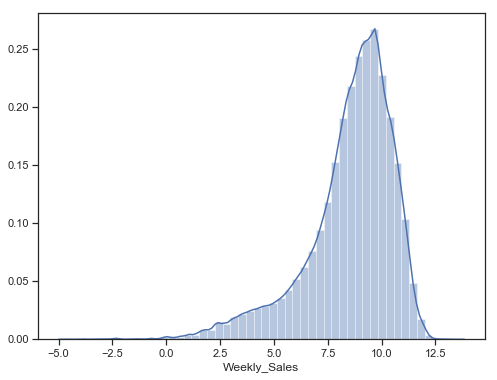

In [226]:
train_over_zero=df[df['Weekly_Sales']>0]
train_below_zero=df[df['Weekly_Sales']<=0]
sales_over_zero = np.log(train_over_zero['Weekly_Sales'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(sales_over_zero)

In [227]:
sales_over_zero 

0         10.123607
1         10.635748
2          9.873211
3          9.983488
4         10.754618
            ...    
421565     9.682412
421566     5.411646
421567     2.479894
421568     3.687879
421569     1.078410
Name: Weekly_Sales, Length: 421570, dtype: float64

In [228]:
pd.DataFrame(sales_over_zero )

Weekly_Sales
0          10.123607
1          10.635748
2           9.873211
3           9.983488
4          10.754618
...              ...
421565      9.682412
421566      5.411646
421567      2.479894
421568      3.687879
421569      1.078410

[421570 rows x 1 columns]

In [229]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       ...
       'Month_7', 'Month_8', 'Month_9', 'Median_Sales', 'Key', 'DateLagged',
       'LaggedSales', 'LaggedAvailable', 'Sales_dif', 'Difference'],
      dtype='object', length=421)

In [230]:
del df['Date']
df

Store     Dept  Weekly_Sales        IsHoliday  Temperature  \
0        Store_1   Dept_1  24924.500000  IsHoliday_False        42.31   
1        Store_1   Dept_1  41595.550000  IsHoliday_False        39.93   
2        Store_1   Dept_1  19403.540000  IsHoliday_False        46.63   
3        Store_1   Dept_1  21665.760000  IsHoliday_False        42.27   
4        Store_1   Dept_1  46845.870000  IsHoliday_False        57.36   
...          ...      ...           ...              ...          ...   
421565  Store_45  Dept_49  16033.114591  IsHoliday_False        75.22   
421566  Store_45  Dept_47    224.000000  IsHoliday_False        76.58   
421567  Store_45  Dept_45     11.940000   IsHoliday_True        75.70   
421568  Store_45  Dept_47     39.960000   IsHoliday_True        75.70   
421569  Store_45  Dept_96      2.940000  IsHoliday_False        67.87   

        Fuel_Price     MarkDown1    MarkDown2    MarkDown3     MarkDown4  ...  \
0            2.572   7246.420196  3381.128457  1442.847588   3383.168256  ...   
1            2.514   7246.420196  3381.128457  1442.847588   3383.168256  ...   
2            2.561   7246.420196  3381.128457  1442.847588   3383.168256  ...   
3            2.989   7246.420196  3381.128457  1442.847588   3383.168256  ...   
4            3.045   7246.420196  3381.128457  1442.847588   3383.168256  ...   
...            ...           ...          ...          ...           ...  ...   
421565       3.506   3291.360000   425.600000  1442.847588    314.880000  ...   
421566       3.654  24853.050000    39.560000    17.960000  11142.690000  ...   
421567       3.911  11024.450000    12.800000    52.630000   1854.770000  ...   
421568       3.911  11024.450000    12.800000    52.630000   1854.770000  ...   
421569       3.948  11407.950000  3381.128457     4.300000   3421.720000  ...   

        Month_7  Month_8  Month_9 Median_Sales  \
0             0        0        0    23510.490   
1             0        0        0    23510.490   
2             0        0        0    23510.490   
3             0        0        0    23510.490   
4             0        0        0    23510.490   
...         ...      ...      ...          ...   
421565        0        0        0        4.415   
421566        0        1        0      224.000   
421567        0        0        1       11.940   
421568        0        0        1       39.960   
421569        0        0        1        2.940   

                                                      Key DateLagged  \
0       Type_ADept_1Store_12010-02-05 00:00:00IsHolida... 2010-01-29   
1       Type_ADept_1Store_12010-02-19 00:00:00IsHolida... 2010-02-12   
2       Type_ADept_1Store_12010-02-26 00:00:00IsHolida... 2010-02-19   
3       Type_ADept_1Store_12011-02-04 00:00:00IsHolida... 2011-01-28   
4       Type_ADept_1Store_12011-02-18 00:00:00IsHolida... 2011-02-11   
...                                                   ...        ...   
421565  Type_BDept_49Store_452012-06-29 00:00:00IsHoli... 2012-06-22   
421566  Type_BDept_47Store_452012-08-03 00:00:00IsHoli... 2012-07-27   
421567  Type_BDept_45Store_452012-09-07 00:00:00IsHoli... 2012-08-31   
421568  Type_BDept_47Store_452012-09-07 00:00:00IsHoli... 2012-08-31   
421569  Type_BDept_96Store_452012-09-14 00:00:00IsHoli... 2012-09-07   

       LaggedSales LaggedAvailable    Sales_dif   Difference  
0         23510.49             0.0  1763.024436  1373.626047  
1         46039.49             1.0  1763.024436  1373.626047  
2         41595.55             1.0  1763.024436  4106.950000  
3         18461.18             1.0  5049.310000  1844.730000  
4         37887.17             1.0  1763.024436  1373.626047  
...            ...             ...          ...          ...  
421565       20.00             1.0  1763.024436    38.415000  
421566      224.00             0.0  1763.024436  1373.626047  
421567       11.94             0.0  1763.024436  1373.626047  
421568       39.96             0.0  1763.024436  1373.626047  
42

In [231]:
df = df.drop(['Dept', 'IsHoliday', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas','week','Split', 'Store', 'Type', 'Month', 'Black_Friday', 'Pre_christmas', 'Key', 'DateLagged','Year','Day','n_days'],axis = 1)
df

Weekly_Sales  Temperature  Fuel_Price     MarkDown1    MarkDown2  \
0       24924.500000        42.31       2.572   7246.420196  3381.128457   
1       41595.550000        39.93       2.514   7246.420196  3381.128457   
2       19403.540000        46.63       2.561   7246.420196  3381.128457   
3       21665.760000        42.27       2.989   7246.420196  3381.128457   
4       46845.870000        57.36       3.045   7246.420196  3381.128457   
...              ...          ...         ...           ...          ...   
421565  16033.114591        75.22       3.506   3291.360000   425.600000   
421566    224.000000        76.58       3.654  24853.050000    39.560000   
421567     11.940000        75.70       3.911  11024.450000    12.800000   
421568     39.960000        75.70       3.911  11024.450000    12.800000   
421569      2.940000        67.87       3.948  11407.950000  3381.128457   

          MarkDown3     MarkDown4    MarkDown5         CPI  Unemployment  ...  \
0       1442.847588   3383.168256  4628.975079  211.096358         8.106  ...   
1       1442.847588   3383.168256  4628.975079  211.289143         8.106  ...   
2       1442.847588   3383.168256  4628.975079  211.319643         8.106  ...   
3       1442.847588   3383.168256  4628.975079  212.566881         7.742  ...   
4       1442.847588   3383.168256  4628.975079  213.247885         7.742  ...   
...             ...           ...          ...         ...           ...  ...   
421565  1442.847588    314.880000  2255.340000  191.099246         8.567  ...   
421566    17.960000  11142.690000  2768.320000  191.164090         8.684  ...   
421567    52.630000   1854.770000  2055.700000  191.577676         8.684  ...   
421568    52.630000   1854.770000  2055.700000  191.577676         8.684  ...   
421569     4.300000   3421.720000  5268.920000  191.699850         8.684  ...   

        Month_5  Month_6  Month_7  Month_8  Month_9  Median_Sales  \
0             0        0        0        0        0     23510.490   
1             0        0        0        0        0     23510.490   
2             0        0        0        0        0     23510.490   
3             0        0        0        0        0     23510.490   
4             0        0        0        0        0     23510.490   
...         ...      ...      ...      ...      ...           ...   
421565        0        1        0        0        0         4.415   
421566        0        0        0        1        0       224.000   
421567        0        0        0        0        1        11.940   
421568        0        0        0        0        1        39.960   
421569        0        0        0        0        1         2.940   

        LaggedSales  LaggedAvailable    Sales_dif   Difference  
0          23510.49              0.0  1763.024436  1373.626047  
1          46039.49              1.0  1763.024436  1373.626047  
2          41595.55              1.0  1763.024436  4106.950000  
3          18461.18              1.0  5049.310000  1844.730000  
4          37887.17              1.0  1763.024436  1373.626047  
...             ...              ...          ...          ...  
421565        20.00              1.0  1763.024436    38.415000  
421566       224.00              0.0  1763.024436  1373.626047  
421567        11.94              0.0  1763.024436  1373.626047  
421568        39.96              0.0  1763.024436  1373.626047  
421569         2.94              0.0  1763.024436  1373.626047  

[421570 rows x 402 columns]

In [232]:
df.to_csv("df1.csv")

In [233]:
df.dtypes

Weekly_Sales       float64
Temperature        float64
Fuel_Price         float64
MarkDown1          float64
MarkDown2          float64
                    ...   
Median_Sales       float64
LaggedSales        float64
LaggedAvailable    float64
Sales_dif          float64
Difference         float64
Length: 402, dtype: object

In [234]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32','uint8']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Week', 'Super_Bowl_no', 'Super_Bowl_yes', 'Black_Friday_no', 'Black_Friday_yes', 'Pre_christmas_no', 'Pre_christmas_yes', 'Labor_Day_no', 'Labor_Day_yes', 'Thanksgiving_no', 'Thanksgiving_yes', 'Christmas_no', 'Christmas_yes', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14', 'Dept_16', 'Dept_17', 'Dept_18', 'Dept_19', 'Dept_2', 'Dept_20', 'Dept_21', 'Dept_22', 'Dept_23', 'Dept_24', 'Dept_25', 'Dept_26', 'Dept_27', 'Dept_28', 'Dept_29', 'Dept_3', 'Dept_30', 'Dept_31', 'Dept_32', 'Dept_33', 'Dept_34', 'Dept_35', 'Dept_36', 'Dept_37', 'Dept_38', 'Dept_39', 'Dept_4', 'Dept_40', 'Dept_41', 'Dept_42', 'Dept_43', 'Dept_44', 'Dept_45', 'Dept_46', 'Dept_47', 'Dept_48', 'Dept_49', 'Dept_5', 'Dept_50', 'Dept_51', 'Dept_52', 'Dept_54', 'Dept_55', 'Dept_56', 'Dept_58', 'Dept_59', 'Dept_6', 'Dept_60', 'Dept_65', 'Dept_67', 'Dept_7', 'Dept_71',

In [235]:
df_full_num = df[numeric_var_names]

In [236]:
df_full_num

Weekly_Sales  Temperature  Fuel_Price     MarkDown1    MarkDown2  \
0       24924.500000        42.31       2.572   7246.420196  3381.128457   
1       41595.550000        39.93       2.514   7246.420196  3381.128457   
2       19403.540000        46.63       2.561   7246.420196  3381.128457   
3       21665.760000        42.27       2.989   7246.420196  3381.128457   
4       46845.870000        57.36       3.045   7246.420196  3381.128457   
...              ...          ...         ...           ...          ...   
421565  16033.114591        75.22       3.506   3291.360000   425.600000   
421566    224.000000        76.58       3.654  24853.050000    39.560000   
421567     11.940000        75.70       3.911  11024.450000    12.800000   
421568     39.960000        75.70       3.911  11024.450000    12.800000   
421569      2.940000        67.87       3.948  11407.950000  3381.128457   

          MarkDown3     MarkDown4    MarkDown5         CPI  Unemployment  ...  \
0       1442.847588   3383.168256  4628.975079  211.096358         8.106  ...   
1       1442.847588   3383.168256  4628.975079  211.289143         8.106  ...   
2       1442.847588   3383.168256  4628.975079  211.319643         8.106  ...   
3       1442.847588   3383.168256  4628.975079  212.566881         7.742  ...   
4       1442.847588   3383.168256  4628.975079  213.247885         7.742  ...   
...             ...           ...          ...         ...           ...  ...   
421565  1442.847588    314.880000  2255.340000  191.099246         8.567  ...   
421566    17.960000  11142.690000  2768.320000  191.164090         8.684  ...   
421567    52.630000   1854.770000  2055.700000  191.577676         8.684  ...   
421568    52.630000   1854.770000  2055.700000  191.577676         8.684  ...   
421569     4.300000   3421.720000  5268.920000  191.699850         8.684  ...   

        Month_5  Month_6  Month_7  Month_8  Month_9  Median_Sales  \
0             0        0        0        0        0     23510.490   
1             0        0        0        0        0     23510.490   
2             0        0        0        0        0     23510.490   
3             0        0        0        0        0     23510.490   
4             0        0        0        0        0     23510.490   
...         ...      ...      ...      ...      ...           ...   
421565        0        1        0        0        0         4.415   
421566        0        0        0        1        0       224.000   
421567        0        0        0        0        1        11.940   
421568        0        0        0        0        1        39.960   
421569        0        0        0        0        1         2.940   

        LaggedSales  LaggedAvailable    Sales_dif   Difference  
0          23510.49              0.0  1763.024436  1373.626047  
1          46039.49              1.0  1763.024436  1373.626047  
2          41595.55              1.0  1763.024436  4106.950000  
3          18461.18              1.0  5049.310000  1844.730000  
4          37887.17              1.0  1763.024436  1373.626047  
...             ...              ...          ...          ...  
421565        20.00              1.0  1763.024436    38.415000  
421566       224.00              0.0  1763.024436  1373.626047  
421567        11.94              0.0  1763.024436  1373.626047  
421568        39.96              0.0  1763.024436  1373.626047  
421569         2.94              0.0  1763.024436  1373.626047  

[421570 rows x 402 columns]

In [237]:
df_full_num.to_csv("df_full_num.csv")

In [238]:
df_full_cat = df[cat_var_names]

In [239]:
df_full_cat

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[421570 rows x 0 columns]

In [240]:
df_full_cat.to_csv("df_full_cat.csv")

In [241]:
df_full_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Columns: 402 entries, Weekly_Sales to Difference
dtypes: float64(15), int64(2), uint8(385)
memory usage: 212.7 MB


In [242]:
df_full_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Empty DataFrame

In [243]:
#('Dept' ,'IsHoliday','Store','Type','DateType','Key' ,'DateLagged')

# Creating Data audit Report

In [244]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary = df_full_num.apply(lambda x: var_summary(x)).T

In [245]:
num_summary

N  NMISS           SUM          MEAN       MEDIAN  \
Weekly_Sales     421570.0    0.0  6.759080e+09  16033.114591  7715.425000   
Temperature      421570.0    0.0  2.533646e+07     60.100233    62.090000   
Fuel_Price       421570.0    0.0  1.416908e+06      3.361027     3.452000   
MarkDown1        421570.0    0.0  3.054873e+09   7246.420196  7246.420196   
MarkDown2        421570.0    0.0  1.425382e+09   3381.128457  3381.128457   
...                   ...    ...           ...           ...          ...   
Median_Sales     421570.0    0.0  6.632414e+09  15732.652272  7563.040000   
LaggedSales      421570.0    0.0  6.738106e+09  15983.362341  7611.605000   
LaggedAvailable  421570.0    0.0  4.121230e+05      0.977591     1.000000   
Sales_dif        421570.0    0.0  7.432382e+08   1763.024436  1763.024436   
Difference       421570.0    0.0  5.790795e+08   1373.626047  1373.626047   

                          STD           VAR       MIN      P1        P5  \
Weekly_Sales     22692.853335  5.149656e+08     0.010   7.470   68.0000   
Temperature         18.430785  3.396938e+02     5.540  18.360   27.3100   
Fuel_Price           0.458515  2.102356e-01     2.472   2.565    2.6530   
MarkDown1         4956.920816  2.457106e+07     0.270  58.340  709.3200   
MarkDown2         4863.253574  2.365124e+07     0.020   2.100   26.8000   
...                       ...           ...       ...     ...       ...   
Median_Sales     22163.957390  4.912410e+08 -1750.000  10.000   64.6900   
LaggedSales      22717.222300  5.160722e+08 -1750.000   7.060   63.3290   
LaggedAvailable      0.148010  2.190697e-02     0.000   0.000    1.0000   
Sales_dif         4111.788547  1.690681e+07     0.005   5.540   40.3795   
Difference        1820.195979  3.313113e+06     0.005   4.290   33.2200   

                       P10          P25          P50           P75  \
Weekly_Sales      313.7990  2133.602500  7715.425000  20205.852500   
Temperature        33.9900    46.700000    62.090000     74.280000   
Fuel_Price          2.7200     2.933000     3.452000      3.738000   
MarkDown1        2565.8000  7246.420196  7246.420196   7246.420196   
MarkDown2         102.5000  3381.128457  3381.128457   3381.128457   
...                    ...          ...          ...           ...   
Median_Sales      307.8750  2085.040000  7563.040000  19975.120000   
LaggedSales       296.3980  2080.000000  7611.605000  20201.990000   
LaggedAvailable     1.0000     1.000000     1.000000      1.000000   
Sales_dif         122.9695   674.196250  1763.024436   1763.024436   
Difference        102.1845   588.080000  1373.626047   1373.626047   

                          P90         P95          P99         MAX  
Weekly_Sales     42845.673000  61201.9510  106479.5860  693099.360  
Temperature         83.580000     87.2700      92.8100     100.140  
Fuel_Price           3.917000      4.0290       4.2020       4.468  
MarkDown1         8624.560000  12407.7100   28177.2900   88646.760  
MarkDown2         3381.128457   3789.5600   21813.1600  104519.540  
...                       ...         ...          ...         ...  
Median_Sales     42111.420000  60378.9750  104862.2100  662049.275  
LaggedSales      42847.835000  61211.3115  106508.6162  693099.360  
LaggedAvailable      1.000000      1.0000       1.0000       1.000  
Sales_dif         2097.425500   3965.1385   11182.0618  579251.325  
Difference        1768.856500   3275.9495    8968.2313   81171.165  

[402 rows x 18 columns]

In [246]:
num_summary.head().T

Weekly_Sales   Temperature    Fuel_Price     MarkDown1     MarkDown2
N       4.215700e+05  4.215700e+05  4.215700e+05  4.215700e+05  4.215700e+05
NMISS   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
SUM     6.759080e+09  2.533646e+07  1.416908e+06  3.054873e+09  1.425382e+09
MEAN    1.603311e+04  6.010023e+01  3.361027e+00  7.246420e+03  3.381128e+03
MEDIAN  7.715425e+03  6.209000e+01  3.452000e+00  7.246420e+03  3.381128e+03
STD     2.269285e+04  1.843079e+01  4.585145e-01  4.956921e+03  4.863254e+03
VAR     5.149656e+08  3.396938e+02  2.102356e-01  2.457106e+07  2.365124e+07
MIN     1.000000e-02  5.540000e+00  2.472000e+00  2.700000e-01  2.000000e-02
P1      7.470000e+00  1.836000e+01  2.565000e+00  5.834000e+01  2.100000e+00
P5      6.800000e+01  2.731000e+01  2.653000e+00  7.093200e+02  2.680000e+01
P10     3.137990e+02  3.399000e+01  2.720000e+00  2.565800e+03  1.025000e+02
P25     2.133602e+03  4.670000e+01  2.933000e+00  7.246420e+03  3.381128e+03
P50     7.715425e+03  6.209000e+01  3.452000e+00  7.246420e+03  3.381128e+03
P75     2.020585e+04  7.428000e+01  3.738000e+00  7.246420e+03  3.381128e+03
P90     4.284567e+04  8.358000e+01  3.917000e+00  8.624560e+03  3.381128e+03
P95     6.120195e+04  8.727000e+01  4.029000e+00  1.240771e+04  3.789560e+03
P99     1.064796e+05  9.281000e+01  4.202000e+00  2.817729e+04  2.181316e+04
MAX     6.930994e+05  1.001400e+02  4.468000e+00  8.864676e+04  1.045195e+05

In [247]:
num_summary.to_csv("num_summary.csv")

**Handling Outliers - Method2**

In [248]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [249]:
df_full_num=df_full_num.apply(lambda x: outlier_capping(x))
df_full_num

Weekly_Sales  Temperature  Fuel_Price     MarkDown1    MarkDown2  \
0       24924.500000        42.31       2.572   7246.420196  3381.128457   
1       41595.550000        39.93       2.565   7246.420196  3381.128457   
2       19403.540000        46.63       2.565   7246.420196  3381.128457   
3       21665.760000        42.27       2.989   7246.420196  3381.128457   
4       46845.870000        57.36       3.045   7246.420196  3381.128457   
...              ...          ...         ...           ...          ...   
421565  16033.114591        75.22       3.506   3291.360000   425.600000   
421566    224.000000        76.58       3.654  24853.050000    39.560000   
421567     11.940000        75.70       3.911  11024.450000    12.800000   
421568     39.960000        75.70       3.911  11024.450000    12.800000   
421569      7.470000        67.87       3.948  11407.950000  3381.128457   

          MarkDown3     MarkDown4    MarkDown5         CPI  Unemployment  ...  \
0       1442.847588   3383.168256  4628.975079  211.096358         8.106  ...   
1       1442.847588   3383.168256  4628.975079  211.289143         8.106  ...   
2       1442.847588   3383.168256  4628.975079  211.319643         8.106  ...   
3       1442.847588   3383.168256  4628.975079  212.566881         7.742  ...   
4       1442.847588   3383.168256  4628.975079  213.247885         7.742  ...   
...             ...           ...          ...         ...           ...  ...   
421565  1442.847588    314.880000  2255.340000  191.099246         8.567  ...   
421566    17.960000  11142.690000  2768.320000  191.164090         8.684  ...   
421567    52.630000   1854.770000  2055.700000  191.577676         8.684  ...   
421568    52.630000   1854.770000  2055.700000  191.577676         8.684  ...   
421569     4.300000   3421.720000  5268.920000  191.699850         8.684  ...   

        Month_5  Month_6  Month_7  Month_8  Month_9  Median_Sales  \
0             0        0        0        0        0      23510.49   
1             0        0        0        0        0      23510.49   
2             0        0        0        0        0      23510.49   
3             0        0        0        0        0      23510.49   
4             0        0        0        0        0      23510.49   
...         ...      ...      ...      ...      ...           ...   
421565        0        1        0        0        0         10.00   
421566        0        0        0        1        0        224.00   
421567        0        0        0        0        1         11.94   
421568        0        0        0        0        1         39.96   
421569        0        0        0        0        1         10.00   

        LaggedSales  LaggedAvailable    Sales_dif   Difference  
0          23510.49              0.0  1763.024436  1373.626047  
1          46039.49              1.0  1763.024436  1373.626047  
2          41595.55              1.0  1763.024436  4106.950000  
3          18461.18              1.0  5049.310000  1844.730000  
4          37887.17              1.0  1763.024436  1373.626047  
...             ...              ...          ...          ...  
421565        20.00              1.0  1763.024436    38.415000  
421566       224.00              0.0  1763.024436  1373.626047  
421567        11.94              0.0  1763.024436  1373.626047  
421568        39.96              0.0  1763.024436  1373.626047  
421569         7.06              0.0  1763.024436  1373.626047  

[421570 rows x 402 columns]

**Handling missings - Method2**

In [250]:
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

In [251]:
df_full_num=df_full_num.apply(lambda x: Missing_imputation(x))
df_full_num

Weekly_Sales  Temperature  Fuel_Price     MarkDown1    MarkDown2  \
0       24924.500000        42.31       2.572   7246.420196  3381.128457   
1       41595.550000        39.93       2.565   7246.420196  3381.128457   
2       19403.540000        46.63       2.565   7246.420196  3381.128457   
3       21665.760000        42.27       2.989   7246.420196  3381.128457   
4       46845.870000        57.36       3.045   7246.420196  3381.128457   
...              ...          ...         ...           ...          ...   
421565  16033.114591        75.22       3.506   3291.360000   425.600000   
421566    224.000000        76.58       3.654  24853.050000    39.560000   
421567     11.940000        75.70       3.911  11024.450000    12.800000   
421568     39.960000        75.70       3.911  11024.450000    12.800000   
421569      7.470000        67.87       3.948  11407.950000  3381.128457   

          MarkDown3     MarkDown4    MarkDown5         CPI  Unemployment  ...  \
0       1442.847588   3383.168256  4628.975079  211.096358         8.106  ...   
1       1442.847588   3383.168256  4628.975079  211.289143         8.106  ...   
2       1442.847588   3383.168256  4628.975079  211.319643         8.106  ...   
3       1442.847588   3383.168256  4628.975079  212.566881         7.742  ...   
4       1442.847588   3383.168256  4628.975079  213.247885         7.742  ...   
...             ...           ...          ...         ...           ...  ...   
421565  1442.847588    314.880000  2255.340000  191.099246         8.567  ...   
421566    17.960000  11142.690000  2768.320000  191.164090         8.684  ...   
421567    52.630000   1854.770000  2055.700000  191.577676         8.684  ...   
421568    52.630000   1854.770000  2055.700000  191.577676         8.684  ...   
421569     4.300000   3421.720000  5268.920000  191.699850         8.684  ...   

        Month_5  Month_6  Month_7  Month_8  Month_9  Median_Sales  \
0             0        0        0        0        0      23510.49   
1             0        0        0        0        0      23510.49   
2             0        0        0        0        0      23510.49   
3             0        0        0        0        0      23510.49   
4             0        0        0        0        0      23510.49   
...         ...      ...      ...      ...      ...           ...   
421565        0        1        0        0        0         10.00   
421566        0        0        0        1        0        224.00   
421567        0        0        0        0        1         11.94   
421568        0        0        0        0        1         39.96   
421569        0        0        0        0        1         10.00   

        LaggedSales  LaggedAvailable    Sales_dif   Difference  
0          23510.49              0.0  1763.024436  1373.626047  
1          46039.49              1.0  1763.024436  1373.626047  
2          41595.55              1.0  1763.024436  4106.950000  
3          18461.18              1.0  5049.310000  1844.730000  
4          37887.17              1.0  1763.024436  1373.626047  
...             ...              ...          ...          ...  
421565        20.00              1.0  1763.024436    38.415000  
421566       224.00              0.0  1763.024436  1373.626047  
421567        11.94              0.0  1763.024436  1373.626047  
421568        39.96              0.0  1763.024436  1373.626047  
421569         7.06              0.0  1763.024436  1373.626047  

[421570 rows x 402 columns]

**Handling missings - Method2**

In [252]:
def Cat_Missing_imputation(x):
    x = x.fillna(x.mode())
    return x

In [253]:
df_full_cat.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [254]:
df_full_cat.head().T

Empty DataFrame
Columns: [0, 1, 2, 3, 4]
Index: []

In [255]:
df_full_num.head()

Weekly_Sales  Temperature  Fuel_Price    MarkDown1    MarkDown2  \
0      24924.50        42.31       2.572  7246.420196  3381.128457   
1      41595.55        39.93       2.565  7246.420196  3381.128457   
2      19403.54        46.63       2.565  7246.420196  3381.128457   
3      21665.76        42.27       2.989  7246.420196  3381.128457   
4      46845.87        57.36       3.045  7246.420196  3381.128457   

     MarkDown3    MarkDown4    MarkDown5         CPI  Unemployment  ...  \
0  1442.847588  3383.168256  4628.975079  211.096358         8.106  ...   
1  1442.847588  3383.168256  4628.975079  211.289143         8.106  ...   
2  1442.847588  3383.168256  4628.975079  211.319643         8.106  ...   
3  1442.847588  3383.168256  4628.975079  212.566881         7.742  ...   
4  1442.847588  3383.168256  4628.975079  213.247885         7.742  ...   

   Month_5  Month_6  Month_7  Month_8  Month_9  Median_Sales  LaggedSales  \
0        0        0        0        0        0      23510.49     23510.49   
1        0        0        0        0        0      23510.49     46039.49   
2        0        0        0        0        0      23510.49     41595.55   
3        0        0        0        0        0      23510.49     18461.18   
4        0        0        0        0        0      23510.49     37887.17   

   LaggedAvailable    Sales_dif   Difference  
0              0.0  1763.024436  1373.626047  
1              1.0  1763.024436  1373.626047  
2              1.0  1763.024436  4106.950000  
3              1.0  5049.310000  1844.730000  
4              1.0  1763.024436  1373.626047  

[5 rows x 402 columns]

In [256]:
df_full_new = pd.concat([df_full_num, df_full_cat], axis=1)

df_full_new.head()

Weekly_Sales  Temperature  Fuel_Price    MarkDown1    MarkDown2  \
0      24924.50        42.31       2.572  7246.420196  3381.128457   
1      41595.55        39.93       2.565  7246.420196  3381.128457   
2      19403.54        46.63       2.565  7246.420196  3381.128457   
3      21665.76        42.27       2.989  7246.420196  3381.128457   
4      46845.87        57.36       3.045  7246.420196  3381.128457   

     MarkDown3    MarkDown4    MarkDown5         CPI  Unemployment  ...  \
0  1442.847588  3383.168256  4628.975079  211.096358         8.106  ...   
1  1442.847588  3383.168256  4628.975079  211.289143         8.106  ...   
2  1442.847588  3383.168256  4628.975079  211.319643         8.106  ...   
3  1442.847588  3383.168256  4628.975079  212.566881         7.742  ...   
4  1442.847588  3383.168256  4628.975079  213.247885         7.742  ...   

   Month_5  Month_6  Month_7  Month_8  Month_9  Median_Sales  LaggedSales  \
0        0        0        0        0        0      23510.49     23510.49   
1        0        0        0        0        0      23510.49     46039.49   
2        0        0        0        0        0      23510.49     41595.55   
3        0        0        0        0        0      23510.49     18461.18   
4        0        0        0        0        0      23510.49     37887.17   

   LaggedAvailable    Sales_dif   Difference  
0              0.0  1763.024436  1373.626047  
1              1.0  1763.024436  1373.626047  
2              1.0  1763.024436  4106.950000  
3              1.0  5049.310000  1844.730000  
4              1.0  1763.024436  1373.626047  

[5 rows x 402 columns]

In [257]:
df_full_new.describe().T.head(10)

count          mean           std         min          25%  \
Weekly_Sales  421570.0  15706.188522  20762.611801    7.470000  2133.602500   
Temperature   421570.0     60.115544     18.288102   18.360000    46.700000   
Fuel_Price    421570.0      3.360265      0.456205    2.565000     2.933000   
MarkDown1     421570.0   7108.278469   3885.739305   58.340000  7246.420196   
MarkDown2     421570.0   3165.926337   2684.870061    2.100000  3381.128457   
MarkDown3     421570.0   1030.935588    641.207718    0.400000   117.380000   
MarkDown4     421570.0   3233.812676   2202.154626   14.330000  3383.168256   
MarkDown5     421570.0   4491.218335   2016.136352  548.020000  4628.975079   
CPI           421570.0    171.195504     39.149643  126.111903   132.022667   
Unemployment  421570.0      7.959971      1.859419    4.156000     6.891000   

                      50%           75%            max  
Weekly_Sales  7715.425000  20205.852500  106479.586000  
Temperature     62.090000     74.280000      92.810000  
Fuel_Price       3.452000      3.738000       4.202000  
MarkDown1     7246.420196   7246.420196   28177.290000  
MarkDown2     3381.128457   3381.128457   21813.160000  
MarkDown3     1442.847588   1442.847588    2083.280000  
MarkDown4     3383.168256   3383.168256   16822.460000  
MarkDown5     4628.975079   4628.975079   15590.530000  
CPI            182.318780    212.416993     225.473509  
Unemployment     7.866000      8.572000      14.180000

In [258]:
df_full_new.describe().T.to_csv("df_full_new.describe().T.csv")

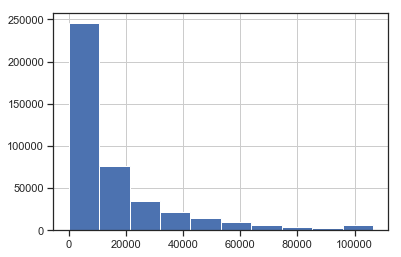

In [259]:
df_full_new.Weekly_Sales.hist()

In [260]:
train_over_zero=df_full_new[df_full_new['Weekly_Sales']>0]
train_below_zero=df_full_new[df_full_new['Weekly_Sales']<=0]
df_full_new["ln_Weekly_Sales"] = np.log(train_over_zero['Weekly_Sales'])
#histogram
#f, ax = plt.subplots(figsize=(8, 6))
#sns.distplot(sales_over_zero)

In [261]:
df_full_new

Weekly_Sales  Temperature  Fuel_Price     MarkDown1    MarkDown2  \
0       24924.500000        42.31       2.572   7246.420196  3381.128457   
1       41595.550000        39.93       2.565   7246.420196  3381.128457   
2       19403.540000        46.63       2.565   7246.420196  3381.128457   
3       21665.760000        42.27       2.989   7246.420196  3381.128457   
4       46845.870000        57.36       3.045   7246.420196  3381.128457   
...              ...          ...         ...           ...          ...   
421565  16033.114591        75.22       3.506   3291.360000   425.600000   
421566    224.000000        76.58       3.654  24853.050000    39.560000   
421567     11.940000        75.70       3.911  11024.450000    12.800000   
421568     39.960000        75.70       3.911  11024.450000    12.800000   
421569      7.470000        67.87       3.948  11407.950000  3381.128457   

          MarkDown3     MarkDown4    MarkDown5         CPI  Unemployment  ...  \
0       1442.847588   3383.168256  4628.975079  211.096358         8.106  ...   
1       1442.847588   3383.168256  4628.975079  211.289143         8.106  ...   
2       1442.847588   3383.168256  4628.975079  211.319643         8.106  ...   
3       1442.847588   3383.168256  4628.975079  212.566881         7.742  ...   
4       1442.847588   3383.168256  4628.975079  213.247885         7.742  ...   
...             ...           ...          ...         ...           ...  ...   
421565  1442.847588    314.880000  2255.340000  191.099246         8.567  ...   
421566    17.960000  11142.690000  2768.320000  191.164090         8.684  ...   
421567    52.630000   1854.770000  2055.700000  191.577676         8.684  ...   
421568    52.630000   1854.770000  2055.700000  191.577676         8.684  ...   
421569     4.300000   3421.720000  5268.920000  191.699850         8.684  ...   

        Month_6  Month_7  Month_8  Month_9  Median_Sales  LaggedSales  \
0             0        0        0        0      23510.49     23510.49   
1             0        0        0        0      23510.49     46039.49   
2             0        0        0        0      23510.49     41595.55   
3             0        0        0        0      23510.49     18461.18   
4             0        0        0        0      23510.49     37887.17   
...         ...      ...      ...      ...           ...          ...   
421565        1        0        0        0         10.00        20.00   
421566        0        0        1        0        224.00       224.00   
421567        0        0        0        1         11.94        11.94   
421568        0        0        0        1         39.96        39.96   
421569        0        0        0        1         10.00         7.06   

        LaggedAvailable    Sales_dif   Difference  ln_Weekly_Sales  
0                   0.0  1763.024436  1373.626047        10.123607  
1                   1.0  1763.024436  1373.626047        10.635748  
2                   1.0  1763.024436  4106.950000         9.873211  
3                   1.0  5049.310000  1844.730000         9.983488  
4                   1.0  1763.024436  1373.626047        10.754618  
...                 ...          ...          ...              ...  
421565              1.0  1763.024436    38.415000         9.682412  
421566              0.0  1763.024436  1373.626047         5.411646  
421567              0.0  1763.024436  1373.626047         2.479894  
421568              0.0  1763.024436  1373.626047         3.687879  
421569              0.0  1763.024436  1373.626047         2.010895  

[421570 rows x 403 columns]

In [262]:
del df_full_new['Weekly_Sales']
df_full_new

Temperature  Fuel_Price     MarkDown1    MarkDown2    MarkDown3  \
0             42.31       2.572   7246.420196  3381.128457  1442.847588   
1             39.93       2.565   7246.420196  3381.128457  1442.847588   
2             46.63       2.565   7246.420196  3381.128457  1442.847588   
3             42.27       2.989   7246.420196  3381.128457  1442.847588   
4             57.36       3.045   7246.420196  3381.128457  1442.847588   
...             ...         ...           ...          ...          ...   
421565        75.22       3.506   3291.360000   425.600000  1442.847588   
421566        76.58       3.654  24853.050000    39.560000    17.960000   
421567        75.70       3.911  11024.450000    12.800000    52.630000   
421568        75.70       3.911  11024.450000    12.800000    52.630000   
421569        67.87       3.948  11407.950000  3381.128457     4.300000   

           MarkDown4    MarkDown5         CPI  Unemployment    Size  ...  \
0        3383.168256  4628.975079  211.096358         8.106  151315  ...   
1        3383.168256  4628.975079  211.289143         8.106  151315  ...   
2        3383.168256  4628.975079  211.319643         8.106  151315  ...   
3        3383.168256  4628.975079  212.566881         7.742  151315  ...   
4        3383.168256  4628.975079  213.247885         7.742  151315  ...   
...              ...          ...         ...           ...     ...  ...   
421565    314.880000  2255.340000  191.099246         8.567  118221  ...   
421566  11142.690000  2768.320000  191.164090         8.684  118221  ...   
421567   1854.770000  2055.700000  191.577676         8.684  118221  ...   
421568   1854.770000  2055.700000  191.577676         8.684  118221  ...   
421569   3421.720000  5268.920000  191.699850         8.684  118221  ...   

        Month_6  Month_7  Month_8  Month_9  Median_Sales  LaggedSales  \
0             0        0        0        0      23510.49     23510.49   
1             0        0        0        0      23510.49     46039.49   
2             0        0        0        0      23510.49     41595.55   
3             0        0        0        0      23510.49     18461.18   
4             0        0        0        0      23510.49     37887.17   
...         ...      ...      ...      ...           ...          ...   
421565        1        0        0        0         10.00        20.00   
421566        0        0        1        0        224.00       224.00   
421567        0        0        0        1         11.94        11.94   
421568        0        0        0        1         39.96        39.96   
421569        0        0        0        1         10.00         7.06   

        LaggedAvailable    Sales_dif   Difference  ln_Weekly_Sales  
0                   0.0  1763.024436  1373.626047        10.123607  
1                   1.0  1763.024436  1373.626047        10.635748  
2                   1.0  1763.024436  4106.950000         9.873211  
3                   1.0  5049.310000  1844.730000         9.983488  
4                   1.0  1763.024436  1373.626047        10.754618  
...                 ...          ...          ...              ...  
421565              1.0  1763.024436    38.415000         9.682412  
421566              0.0  1763.024436  1373.626047         5.411646  
421567              0.0  1763.024436  1373.626047         2.479894  
421568              0.0  1763.024436  1373.626047         3.687879  
421569              0.0  1763.024436  1373.626047         2.010895  

[421570 rows x 402 columns]

In [263]:
df_full_new

Temperature  Fuel_Price     MarkDown1    MarkDown2    MarkDown3  \
0             42.31       2.572   7246.420196  3381.128457  1442.847588   
1             39.93       2.565   7246.420196  3381.128457  1442.847588   
2             46.63       2.565   7246.420196  3381.128457  1442.847588   
3             42.27       2.989   7246.420196  3381.128457  1442.847588   
4             57.36       3.045   7246.420196  3381.128457  1442.847588   
...             ...         ...           ...          ...          ...   
421565        75.22       3.506   3291.360000   425.600000  1442.847588   
421566        76.58       3.654  24853.050000    39.560000    17.960000   
421567        75.70       3.911  11024.450000    12.800000    52.630000   
421568        75.70       3.911  11024.450000    12.800000    52.630000   
421569        67.87       3.948  11407.950000  3381.128457     4.300000   

           MarkDown4    MarkDown5         CPI  Unemployment    Size  ...  \
0        3383.168256  4628.975079  211.096358         8.106  151315  ...   
1        3383.168256  4628.975079  211.289143         8.106  151315  ...   
2        3383.168256  4628.975079  211.319643         8.106  151315  ...   
3        3383.168256  4628.975079  212.566881         7.742  151315  ...   
4        3383.168256  4628.975079  213.247885         7.742  151315  ...   
...              ...          ...         ...           ...     ...  ...   
421565    314.880000  2255.340000  191.099246         8.567  118221  ...   
421566  11142.690000  2768.320000  191.164090         8.684  118221  ...   
421567   1854.770000  2055.700000  191.577676         8.684  118221  ...   
421568   1854.770000  2055.700000  191.577676         8.684  118221  ...   
421569   3421.720000  5268.920000  191.699850         8.684  118221  ...   

        Month_6  Month_7  Month_8  Month_9  Median_Sales  LaggedSales  \
0             0        0        0        0      23510.49     23510.49   
1             0        0        0        0      23510.49     46039.49   
2             0        0        0        0      23510.49     41595.55   
3             0        0        0        0      23510.49     18461.18   
4             0        0        0        0      23510.49     37887.17   
...         ...      ...      ...      ...           ...          ...   
421565        1        0        0        0         10.00        20.00   
421566        0        0        1        0        224.00       224.00   
421567        0        0        0        1         11.94        11.94   
421568        0        0        0        1         39.96        39.96   
421569        0        0        0        1         10.00         7.06   

        LaggedAvailable    Sales_dif   Difference  ln_Weekly_Sales  
0                   0.0  1763.024436  1373.626047        10.123607  
1                   1.0  1763.024436  1373.626047        10.635748  
2                   1.0  1763.024436  4106.950000         9.873211  
3                   1.0  5049.310000  1844.730000         9.983488  
4                   1.0  1763.024436  1373.626047        10.754618  
...                 ...          ...          ...              ...  
421565              1.0  1763.024436    38.415000         9.682412  
421566              0.0  1763.024436  1373.626047         5.411646  
421567              0.0  1763.024436  1373.626047         2.479894  
421568              0.0  1763.024436  1373.626047         3.687879  
421569              0.0  1763.024436  1373.626047         2.010895  

[421570 rows x 402 columns]

In [264]:
df_full_new.to_csv('df_full_new.csv')


# Applying PCA

In [265]:
# center and scale the data
from sklearn.cluster import KMeans                          
from sklearn.preprocessing import StandardScaler

In [266]:
from sklearn.decomposition import PCA

In [267]:
sc=StandardScaler()
df_full_scaled=sc.fit_transform(df_full_num)

In [268]:
pc = PCA(n_components=402)

In [269]:
pc.fit(df_full_scaled)

PCA(copy=True, iterated_power='auto', n_components=402, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [270]:
pc.explained_variance_

array([6.50328408e+00, 4.89636506e+00, 4.67317324e+00, 4.34896121e+00,
       4.01333386e+00, 3.55435219e+00, 3.24652590e+00, 3.13331845e+00,
       2.93055024e+00, 2.72516535e+00, 2.60545189e+00, 2.49331146e+00,
       2.43203856e+00, 2.38359790e+00, 2.32522966e+00, 2.26162804e+00,
       2.16849244e+00, 2.13204229e+00, 2.11664688e+00, 2.10141022e+00,
       2.03288417e+00, 1.97664164e+00, 1.92119934e+00, 1.90510251e+00,
       1.82664925e+00, 1.79074897e+00, 1.74417203e+00, 1.71771158e+00,
       1.67901599e+00, 1.61498314e+00, 1.61255872e+00, 1.58275201e+00,
       1.56246115e+00, 1.54988620e+00, 1.50402763e+00, 1.49874025e+00,
       1.47157799e+00, 1.44805812e+00, 1.42959327e+00, 1.38434378e+00,
       1.37315750e+00, 1.33893580e+00, 1.32209613e+00, 1.28678802e+00,
       1.27363022e+00, 1.26193611e+00, 1.25642887e+00, 1.19471053e+00,
       1.18616228e+00, 1.16701670e+00, 1.14686708e+00, 1.11088822e+00,
       1.08899826e+00, 1.08241474e+00, 1.06921487e+00, 1.06240286e+00,
      

In [271]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

In [272]:
var

array([2.65439537e-02, 1.99851161e-02, 1.90741312e-02, 1.77508200e-02,
       1.63809157e-02, 1.45075256e-02, 1.32510947e-02, 1.27890246e-02,
       1.19614012e-02, 1.11230975e-02, 1.06344723e-02, 1.01767573e-02,
       9.92666444e-03, 9.72894795e-03, 9.49071081e-03, 9.23111295e-03,
       8.85096857e-03, 8.70219279e-03, 8.63935455e-03, 8.57716422e-03,
       8.29746673e-03, 8.06790592e-03, 7.84161136e-03, 7.77591016e-03,
       7.45569353e-03, 7.30916213e-03, 7.11905264e-03, 7.01105105e-03,
       6.85311022e-03, 6.59175230e-03, 6.58185673e-03, 6.46019698e-03,
       6.37737734e-03, 6.32605111e-03, 6.13887371e-03, 6.11729261e-03,
       6.00642653e-03, 5.91042730e-03, 5.83506073e-03, 5.65036938e-03,
       5.60471121e-03, 5.46503111e-03, 5.39629792e-03, 5.25218354e-03,
       5.19847836e-03, 5.15074742e-03, 5.12826896e-03, 4.87635793e-03,
       4.84146721e-03, 4.76332215e-03, 4.68107904e-03, 4.53422686e-03,
       4.44488032e-03, 4.41800886e-03, 4.36413198e-03, 4.33632792e-03,
      

In [273]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([ 2.65,  4.65,  6.56,  8.34,  9.98, 11.43, 12.76, 14.04, 15.24,
       16.35, 17.41, 18.43, 19.42, 20.39, 21.34, 22.26, 23.15, 24.02,
       24.88, 25.74, 26.57, 27.38, 28.16, 28.94, 29.69, 30.42, 31.13,
       31.83, 32.52, 33.18, 33.84, 34.49, 35.13, 35.76, 36.37, 36.98,
       37.58, 38.17, 38.75, 39.32, 39.88, 40.43, 40.97, 41.5 , 42.02,
       42.54, 43.05, 43.54, 44.02, 44.5 , 44.97, 45.42, 45.86, 46.3 ,
       46.74, 47.17, 47.6 , 48.03, 48.46, 48.88, 49.3 , 49.72, 50.14,
       50.56, 50.98, 51.4 , 51.82, 52.24, 52.66, 53.08, 53.5 , 53.92,
       54.34, 54.76, 55.18, 55.6 , 56.02, 56.44, 56.86, 57.28, 57.7 ,
       58.12, 58.54, 58.96, 59.38, 59.8 , 60.22, 60.64, 61.06, 61.48,
       61.9 , 62.32, 62.74, 63.16, 63.58, 64.  , 64.42, 64.84, 65.26,
       65.67, 66.08, 66.49, 66.9 , 67.31, 67.72, 68.13, 68.54, 68.95,
       69.36, 69.77, 70.18, 70.59, 71.  , 71.41, 71.82, 72.23, 72.64,
       73.05, 73.46, 73.87, 74.28, 74.69, 75.1 , 75.51, 75.92, 76.33,
       76.74, 77.15,

In [274]:
pc_final=PCA(n_components=173).fit(df_full_scaled)
pc_final

PCA(copy=True, iterated_power='auto', n_components=173, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [275]:
pc_final.explained_variance_

array([6.50328408, 4.89636504, 4.67317323, 4.34896119, 4.01333384,
       3.55435207, 3.2465256 , 3.13331821, 2.93054957, 2.72516456,
       2.60545082, 2.4933097 , 2.43203738, 2.38359704, 2.32522711,
       2.26161871, 2.16849117, 2.13203139, 2.11664292, 2.10140563,
       2.03286767, 1.97663772, 1.92119252, 1.90507136, 1.82664274,
       1.79072182, 1.74415564, 1.71770272, 1.67894676, 1.61495344,
       1.61251969, 1.5827162 , 1.56244105, 1.54979152, 1.50380088,
       1.49856125, 1.47142126, 1.44800932, 1.42954921, 1.3843097 ,
       1.37312622, 1.33882415, 1.32200291, 1.28663446, 1.27333345,
       1.26175265, 1.25571851, 1.194449  , 1.18593469, 1.16646895,
       1.14627726, 1.11055128, 1.08869099, 1.08147633, 1.06883188,
       1.06180886, 1.05228319, 1.04706838, 1.0431131 , 1.03951205,
       1.03665011, 1.03513262, 1.03242437, 1.03089961, 1.03066146,
       1.02915785, 1.02809755, 1.02772598, 1.02718348, 1.02626962,
       1.02621048, 1.02522976, 1.02502671, 1.02498513, 1.02486

In [276]:
reduced_cr=pc_final.fit_transform(df_full_scaled)  # the out put is Factors (F1, F2, ...F9)
reduced_cr

array([[-0.16653655,  1.24113846,  1.17850785, ..., -0.28879348,
        -0.22525809,  0.27547958],
       [-0.07275004,  1.35873995,  2.03763464, ...,  0.1651437 ,
        -0.66533203, -1.69002155],
       [ 0.63001636,  0.84497939,  2.12580969, ...,  1.15179222,
         0.3094346 , -0.99750601],
       ...,
       [ 3.83041569,  5.10205648, -5.12761084, ...,  0.18589523,
        -0.62988711,  2.25053172],
       [ 3.8305231 ,  5.10248384, -5.12610858, ...,  0.18574586,
        -0.63005379,  2.25049805],
       [-0.92852485, -0.35039552, -1.9439591 , ..., -0.09382479,
        -0.22305569,  1.79673396]])

In [277]:
dimensions = pd.DataFrame(reduced_cr)
dimensions

0         1         2         3          4         5         6    \
0      -0.166537  1.241138  1.178508 -2.007282  -2.433169  1.100521 -2.320182   
1      -0.072750  1.358740  2.037635 -1.588575  -1.998545  0.765850 -1.180427   
2       0.630016  0.844979  2.125810 -1.645948  -1.853402  0.851301 -0.993164   
3      -0.175039  1.221230  1.675269 -2.127618  -1.896030  0.425186 -0.850876   
4      -0.321030  1.123347  1.893013 -1.822856  -1.432112  0.231135 -0.297521   
...          ...       ...       ...       ...        ...       ...       ...   
421565 -1.043119 -1.690071 -1.621820  0.245393   0.809530 -0.222831  0.346685   
421566 -1.465474 -0.085842 -1.080043 -1.489054   0.478258  0.082523 -2.390146   
421567  3.830416  5.102056 -5.127611  0.105139  10.462166  2.168874  1.812248   
421568  3.830523  5.102484 -5.126109  0.105096  10.462336  2.168785  1.813065   
421569 -0.928525 -0.350396 -1.943959 -0.019741   1.582915 -0.015196  0.080147   

             7         8         9    ...       163       164       165  \
0       0.370608 -2.611053  1.171013  ...  1.922824 -1.121417 -0.552973   
1       0.452560 -1.929332 -0.220222  ...  1.445333 -1.029551 -0.081305   
2       0.318246 -1.417422 -0.017993  ...  0.803687 -0.862915 -0.722789   
3      -0.325482 -1.951037  1.125944  ...  0.999006 -1.114331  1.272295   
4      -0.264359 -1.220553 -0.037435  ...  1.356333 -1.026867 -0.202219   
...          ...       ...       ...  ...       ...       ...       ...   
421565  1.012197  1.689367 -0.868503  ... -0.501766  0.928549  2.530646   
421566  1.737778  2.048722  7.151631  ...  0.678213  0.240814  0.323296   
421567 -1.391552 -2.803095  2.245161  ...  1.303654  0.098461 -1.583488   
421568 -1.390858 -2.803188  2.245127  ...  1.303675  0.098390 -1.583428   
421569 -0.203923 -0.038830  1.972150  ...  4.964429 -0.351117 -1.449970   

             166       167       168       169       170       171       172  
0      -2.016503 -0.109435  0.221585 -0.655813 -0.288793 -0.225258  0.275480  
1      -1.026081 -0.443109  2.361288 -1.497818  0.165144 -0.665332 -1.690022  
2      -1.173608 -1.656097 -1.188341  0.112092  1.151792  0.309435 -0.997506  
3       2.100941  0.317609 -1.283668 -0.372570 -1.875368  0.082580 -1.856730  
4      -0.254090  0.110014 -0.624402 -1.228461 -1.098522  0.159105  0.948557  
...          ...       ...       ...       ...       ...       ...       ...  
421565  1.046496 -1.324400  0.527559 -0.186644 -0.343942 -0.331315 -0.106762  
421566  0.150679 -0.916122  0.641926  0.308203  0.112559 -1.585543  2.472962  
421567 -0.268016 -0.841205  1.253851 -0.203304  0.185895 -0.629887  2.250532  
421568 -0.268284 -0.841257  1.253800 -0.203592  0.185746 -0.630054  2.250498  
421569 -0.599675  0.224485  1.608957 -0.063342 -0.093825 -0.223056  1.796734  

[421570 rows x 173 columns]

In [278]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8","C9","C10","C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18","C19","C20","C21", "C22", "C23", "C24", "C25", "C26", "C27", "C28","C29","C30","C31", "C32", "C33", "C34", "C35", "C36", "C37", "C38","C39","C40","C41", "C42", "C43", "C44", "C45", "C46", "C47", "C48","C49","C50","C51", "C52", "C53", "C54", "C55", "C56", "C57", "C58","C59","C60","C61","C62", "C63", "C64", "C65", "C66", "C67", "C68", "C69","C70","C71","C72", "C73", "C74", "C75", "C76", "C77", "C78", "C79","C80","C81","C82", "C83", "C84", "C85", "C86", "C87", "C88", "C89","C90","C91","C92", "C93", "C94", "C95", "C96", "C97", "C98", "99","C100","C101","C102", "C103", "C104", "C105", "C106", "C107", "C108", "C109","C110","C111","C112", "C113", "C114", "C115", "C116", "C117", "C118", "C119","C120","C121","C122", "C123", "C124", "C125", "C126", "C127", "C128", "C129","C130","C131","C132", "C133", "C134", "C135", "C136", "C137", "C138", "C139","C140","C141","C142", "C143", "C144", "C145", "C146", "C147", "C148", "C149","C150", "C151","C152","C153","C154", "C155", "C156", "C157", "C158", "C159", "C160","C161","C162","C163","C164", "C165", "C166", "C167", "C168", "C169", "C170", "C171","C172","C173"]
dimensions.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       ...
       'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C170', 'C171', 'C172',
       'C173'],
      dtype='object', length=173)

In [279]:
dimensions.head()

C1        C2        C3        C4        C5        C6        C7  \
0 -0.166537  1.241138  1.178508 -2.007282 -2.433169  1.100521 -2.320182   
1 -0.072750  1.358740  2.037635 -1.588575 -1.998545  0.765850 -1.180427   
2  0.630016  0.844979  2.125810 -1.645948 -1.853402  0.851301 -0.993164   
3 -0.175039  1.221230  1.675269 -2.127618 -1.896030  0.425186 -0.850876   
4 -0.321030  1.123347  1.893013 -1.822856 -1.432112  0.231135 -0.297521   

         C8        C9       C10  ...      C164      C165      C166      C167  \
0  0.370608 -2.611053  1.171013  ...  1.922824 -1.121417 -0.552973 -2.016503   
1  0.452560 -1.929332 -0.220222  ...  1.445333 -1.029551 -0.081305 -1.026081   
2  0.318246 -1.417422 -0.017993  ...  0.803687 -0.862915 -0.722789 -1.173608   
3 -0.325482 -1.951037  1.125944  ...  0.999006 -1.114331  1.272295  2.100941   
4 -0.264359 -1.220553 -0.037435  ...  1.356333 -1.026867 -0.202219 -0.254090   

       C168      C169      C170      C171      C172      C173  
0 -0.109435  0.221585 -0.655813 -0.288793 -0.225258  0.275480  
1 -0.443109  2.361288 -1.497818  0.165144 -0.665332 -1.690022  
2 -1.656097 -1.188341  0.112092  1.151792  0.309435 -0.997506  
3  0.317609 -1.283668 -0.372570 -1.875368  0.082580 -1.856730  
4  0.110014 -0.624402 -1.228461 -1.098522  0.159105  0.948557  

[5 rows x 173 columns]

In [280]:
dimensions.to_csv("dimensions10.csv")

In [281]:
Loadings10 = pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=df_full_num.columns).T
Loadings10

0         1         2         3         4         5    \
Weekly_Sales     0.068819  0.220814  0.798221 -0.027402  0.082511 -0.019570   
Temperature     -0.199812 -0.212276  0.028882  0.065544  0.564071 -0.028243   
Fuel_Price      -0.169480 -0.094263 -0.055314 -0.097514  0.255711 -0.240446   
MarkDown1       -0.087490  0.239363  0.167086 -0.256285 -0.001043  0.008159   
MarkDown2        0.078367  0.246588 -0.036514  0.089480 -0.236478 -0.290793   
...                   ...       ...       ...       ...       ...       ...   
Median_Sales     0.072598  0.224113  0.809876 -0.037259  0.089744 -0.035238   
LaggedSales      0.060351  0.252145  0.784902 -0.002412  0.077672 -0.067835   
LaggedAvailable  0.003029  0.000703  0.071854  0.051658  0.082842 -0.045048   
Sales_dif        0.172608  0.105875  0.450538 -0.041017  0.017688 -0.005106   
Difference       0.039215  0.145457  0.456284  0.001772  0.024578  0.004645   

                      6         7         8         9    ...       163  \
Weekly_Sales     0.365763  0.293702 -0.036483 -0.009014  ...  0.008486   
Temperature     -0.210874  0.285647  0.451693 -0.077842  ... -0.002468   
Fuel_Price       0.353914 -0.182993  0.326196  0.208972  ...  0.013529   
MarkDown1       -0.343555  0.021994 -0.047817  0.461163  ... -0.092427   
MarkDown2        0.004469 -0.079180 -0.221192 -0.070289  ...  0.043376   
...                   ...       ...       ...       ...  ...       ...   
Median_Sales     0.361456  0.311317 -0.043940 -0.014923  ...  0.005031   
LaggedSales      0.357086  0.300029 -0.036946 -0.017894  ...  0.004931   
LaggedAvailable  0.083485 -0.015775  0.103245 -0.071401  ... -0.107866   
Sales_dif        0.161490  0.196334 -0.087582  0.061797  ...  0.013892   
Difference       0.167308  0.218932 -0.067612  0.016919  ... -0.000113   

                      164       165       166       167       168       169  \
Weekly_Sales    -0.017327  0.023142 -0.069790 -0.016991 -0.012224 -0.075436   
Temperature      0.017685  0.024231  0.012398 -0.000423 -0.011257 -0.013458   
Fuel_Price       0.018730 -0.017701 -0.079394 -0.056092  0.069397  0.078094   
MarkDown1       -0.021163 -0.014224 -0.043326  0.014561  0.001597 -0.014013   
MarkDown2        0.033285  0.215904 -0.126510  0.122654 -0.054283  0.097901   
...                   ...       ...       ...       ...       ...       ...   
Median_Sales    -0.015125  0.008604 -0.035689 -0.006284 -0.006035 -0.035961   
LaggedSales     -0.018102  0.010975 -0.075501 -0.009281 -0.012180 -0.075039   
LaggedAvailable -0.003977  0.111770  0.184331 -0.029376 -0.083484 -0.030849   
Sales_dif        0.019946 -0.018016  0.251265  0.008783  0.036363  0.206909   
Difference       0.010751 -0.080921  0.240298  0.077382  0.057851  0.291830   

                      170       171       172  
Weekly_Sales    -0.038780 -0.038751 -0.011468  
Temperature      0.022427  0.029627  0.015733  
Fuel_Price       0.034437 -0.006934 -0.019002  
MarkDown1        0.031478  0.075610  0.007408  
MarkDown2        0.025942  0.054705  0.022314  
...                   ...       ...       ...  
Median_Sales    -0.020082 -0.024959 -0.006909  
LaggedSales     -0.038994 -0.044035 -0.007066  
LaggedAvailable -0.000262  0.024996 -0.213567  
Sales_dif        0.124930  0.115565  0.024540  
Difference       0.157083  0.140274  0.070246  

[402 rows x 173 columns]

In [282]:
Loadings10.to_csv("Loadings20.csv")

# Variable Reduction.
Recursive Feature Elimination.


# Assumptions of Regression¶

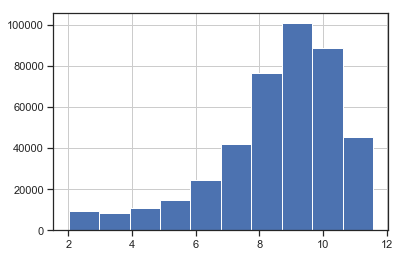

In [283]:
df_full_new.ln_Weekly_Sales.hist()

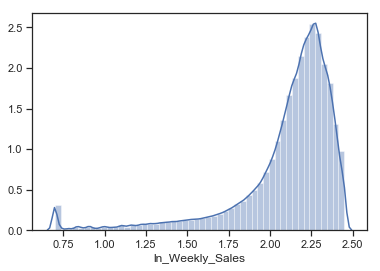

In [284]:
# Distribution of variables
import seaborn as sns
sns.distplot(np.log(df_full_new.ln_Weekly_Sales))

In [285]:
# correlation matrix (ranges from 1 to -1)
corrm=df_full_new.corr()
corrm.to_csv('corrm55.csv')

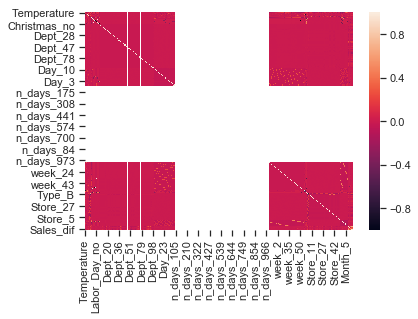

In [286]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(df_full_new.corr())

# Variable Reduction

Recursive Feature Elimination

In [287]:
features = df_full_new[df_full_new.columns.difference(['ln_Weekly_Sales', 'Weekly_Sales','Pre_christmas','Black_Friday','DateLagged','Dept','Store','Type','IsHoliday','Split','Key'])]
target = df_full_new['ln_Weekly_Sales']

In [288]:
features     

Black_Friday_no  Black_Friday_yes         CPI  Christmas_no  \
0                     1                 0  211.096358             1   
1                     1                 0  211.289143             1   
2                     1                 0  211.319643             1   
3                     1                 0  212.566881             1   
4                     1                 0  213.247885             1   
...                 ...               ...         ...           ...   
421565                1                 0  191.099246             1   
421566                1                 0  191.164090             1   
421567                1                 0  191.577676             1   
421568                1                 0  191.577676             1   
421569                1                 0  191.699850             1   

        Christmas_yes  Day_1  Day_10  Day_11  Day_12  Day_13  ...  week_48  \
0                   0      0       0       0       0       0  ...        0   
1                   0      0       0       0       0       0  ...        0   
2                   0      0       0       0       0       0  ...        0   
3                   0      0       0       0       0       0  ...        0   
4                   0      0       0       0       0       0  ...        0   
...               ...    ...     ...     ...     ...     ...  ...      ...   
421565              0      0       0       0       0       0  ...        0   
421566              0      0       0       0       0       0  ...        0   
421567              0      0       0       0       0       0  ...        0   
421568              0      0       0       0       0       0  ...        0   
421569              0      0       0       0       0       0  ...        0   

        week_49  week_5  week_50  week_51  week_52  week_6  week_7  week_8  \
0             0       1        0        0        0       0       0       0   
1             0       0        0        0        0       0       1       0   
2             0       0        0        0        0       0       0       1   
3             0       1        0        0        0       0       0       0   
4             0       0        0        0        0       0       1       0   
...         ...     ...      ...      ...      ...     ...     ...     ...   
421565        0       0        0        0        0       0       0       0   
421566        0       0        0        0        0       0       0       0   
421567        0       0        0        0        0       0       0       0   
421568        0       0        0        0        0       0       0       0   
421569        0       0        0        0        0       0       0       0   

        week_9  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
421565       0  
421566       0  
421567       0  
421568       0  
421569       0  

[421570 rows x 401 columns]

In [289]:
features.columns

Index(['Black_Friday_no', 'Black_Friday_yes', 'CPI', 'Christmas_no',
       'Christmas_yes', 'Day_1', 'Day_10', 'Day_11', 'Day_12', 'Day_13',
       ...
       'week_48', 'week_49', 'week_5', 'week_50', 'week_51', 'week_52',
       'week_6', 'week_7', 'week_8', 'week_9'],
      dtype='object', length=401)

In [290]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Columns: 401 entries, Black_Friday_no to week_9
dtypes: float64(14), int64(158), uint8(229)
memory usage: 648.5 MB


In [291]:
target

0         10.123607
1         10.635748
2          9.873211
3          9.983488
4         10.754618
            ...    
421565     9.682412
421566     5.411646
421567     2.479894
421568     3.687879
421569     2.010895
Name: ln_Weekly_Sales, Length: 421570, dtype: float64

In [292]:
features.to_csv("features.csv")

In [293]:
target.to_csv("target.csv")



# Variable Reduction

# Recursive Feature Elimination

In [294]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import itertools

In [295]:
features.shape

(421570, 401)

In [296]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [297]:
features.count()

Black_Friday_no     421570
Black_Friday_yes    421570
CPI                 421570
Christmas_no        421570
Christmas_yes       421570
                     ...  
week_52             421570
week_6              421570
week_7              421570
week_8              421570
week_9              421570
Length: 401, dtype: int64

In [298]:
# create the RFE model and select 30 attributes
rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(features, target)

In [299]:
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=30, step=1, verbose=0)

In [300]:
rfe.get_support()

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,

In [301]:
features.columns

Index(['Black_Friday_no', 'Black_Friday_yes', 'CPI', 'Christmas_no',
       'Christmas_yes', 'Day_1', 'Day_10', 'Day_11', 'Day_12', 'Day_13',
       ...
       'week_48', 'week_49', 'week_5', 'week_50', 'week_51', 'week_52',
       'week_6', 'week_7', 'week_8', 'week_9'],
      dtype='object', length=401)

In [302]:
features.columns[rfe.get_support()]

Index(['Black_Friday_no', 'Christmas_no', 'IsHoliday_False', 'IsHoliday_True',
       'Labor_Day_no', 'Labor_Day_yes', 'Month_11', 'Month_12', 'Month_2',
       'Pre_christmas_no', 'Pre_christmas_yes', 'Super_Bowl_no',
       'Super_Bowl_yes', 'Thanksgiving_no', 'Thanksgiving_yes', 'Type_A',
       'Type_B', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48',
       'week_49', 'week_5', 'week_50', 'week_51', 'week_52', 'week_6',
       'week_7', 'week_8'],
      dtype='object')

In [303]:
features.columns

Index(['Black_Friday_no', 'Black_Friday_yes', 'CPI', 'Christmas_no',
       'Christmas_yes', 'Day_1', 'Day_10', 'Day_11', 'Day_12', 'Day_13',
       ...
       'week_48', 'week_49', 'week_5', 'week_50', 'week_51', 'week_52',
       'week_6', 'week_7', 'week_8', 'week_9'],
      dtype='object', length=401)

In [304]:
rfe.get_support()

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,

In [305]:
# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(features.columns, rfe.get_support())]

In [306]:
feature_map

[('Black_Friday_no', True),
 ('Black_Friday_yes', False),
 ('CPI', False),
 ('Christmas_no', True),
 ('Christmas_yes', False),
 ('Day_1', False),
 ('Day_10', False),
 ('Day_11', False),
 ('Day_12', False),
 ('Day_13', False),
 ('Day_14', False),
 ('Day_15', False),
 ('Day_16', False),
 ('Day_17', False),
 ('Day_18', False),
 ('Day_19', False),
 ('Day_2', False),
 ('Day_20', False),
 ('Day_21', False),
 ('Day_22', False),
 ('Day_23', False),
 ('Day_24', False),
 ('Day_25', False),
 ('Day_26', False),
 ('Day_27', False),
 ('Day_28', False),
 ('Day_29', False),
 ('Day_3', False),
 ('Day_30', False),
 ('Day_31', False),
 ('Day_4', False),
 ('Day_5', False),
 ('Day_6', False),
 ('Day_7', False),
 ('Day_8', False),
 ('Day_9', False),
 ('Dept_1', False),
 ('Dept_10', False),
 ('Dept_11', False),
 ('Dept_12', False),
 ('Dept_13', False),
 ('Dept_14', False),
 ('Dept_16', False),
 ('Dept_17', False),
 ('Dept_18', False),
 ('Dept_19', False),
 ('Dept_2', False),
 ('Dept_20', False),
 ('Dept_21',

In [307]:
features.columns

Index(['Black_Friday_no', 'Black_Friday_yes', 'CPI', 'Christmas_no',
       'Christmas_yes', 'Day_1', 'Day_10', 'Day_11', 'Day_12', 'Day_13',
       ...
       'week_48', 'week_49', 'week_5', 'week_50', 'week_51', 'week_52',
       'week_6', 'week_7', 'week_8', 'week_9'],
      dtype='object', length=401)

In [308]:
rfe.get_support()

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,

In [309]:
features.columns[rfe.get_support()]

Index(['Black_Friday_no', 'Christmas_no', 'IsHoliday_False', 'IsHoliday_True',
       'Labor_Day_no', 'Labor_Day_yes', 'Month_11', 'Month_12', 'Month_2',
       'Pre_christmas_no', 'Pre_christmas_yes', 'Super_Bowl_no',
       'Super_Bowl_yes', 'Thanksgiving_no', 'Thanksgiving_yes', 'Type_A',
       'Type_B', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48',
       'week_49', 'week_5', 'week_50', 'week_51', 'week_52', 'week_6',
       'week_7', 'week_8'],
      dtype='object')

**Alternative of capturing the important variables**

In [310]:
RFE_features=features.columns[rfe.get_support()]

In [311]:
RFE_features

Index(['Black_Friday_no', 'Christmas_no', 'IsHoliday_False', 'IsHoliday_True',
       'Labor_Day_no', 'Labor_Day_yes', 'Month_11', 'Month_12', 'Month_2',
       'Pre_christmas_no', 'Pre_christmas_yes', 'Super_Bowl_no',
       'Super_Bowl_yes', 'Thanksgiving_no', 'Thanksgiving_yes', 'Type_A',
       'Type_B', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48',
       'week_49', 'week_5', 'week_50', 'week_51', 'week_52', 'week_6',
       'week_7', 'week_8'],
      dtype='object')

In [312]:
features1 = features[RFE_features]

In [313]:
features1.head()

Black_Friday_no  Christmas_no  IsHoliday_False  IsHoliday_True  \
0                1             1                1               0   
1                1             1                1               0   
2                1             1                1               0   
3                1             1                1               0   
4                1             1                1               0   

   Labor_Day_no  Labor_Day_yes  Month_11  Month_12  Month_2  Pre_christmas_no  \
0             1              0         0         0        1                 1   
1             1              0         0         0        1                 1   
2             1              0         0         0        1                 1   
3             1              0         0         0        1                 1   
4             1              0         0         0        1                 1   

   ...  week_47  week_48  week_49  week_5  week_50  week_51  week_52  week_6  \
0  ...        0        0        0       1        0        0        0       0   
1  ...        0        0        0       0        0        0        0       0   
2  ...        0        0        0       0        0        0        0       0   
3  ...        0        0        0       1        0        0        0       0   
4  ...        0        0        0       0        0        0        0       0   

   week_7  week_8  
0       0       0  
1       1       0  
2       0       1  
3       0       0  
4       1       0  

[5 rows x 30 columns]

In [314]:
features1

Black_Friday_no  Christmas_no  IsHoliday_False  IsHoliday_True  \
0                     1             1                1               0   
1                     1             1                1               0   
2                     1             1                1               0   
3                     1             1                1               0   
4                     1             1                1               0   
...                 ...           ...              ...             ...   
421565                1             1                1               0   
421566                1             1                1               0   
421567                1             1                0               1   
421568                1             1                0               1   
421569                1             1                1               0   

        Labor_Day_no  Labor_Day_yes  Month_11  Month_12  Month_2  \
0                  1              0         0         0        1   
1                  1              0         0         0        1   
2                  1              0         0         0        1   
3                  1              0         0         0        1   
4                  1              0         0         0        1   
...              ...            ...       ...       ...      ...   
421565             1              0         0         0        0   
421566             1              0         0         0        0   
421567             0              1         0         0        0   
421568             0              1         0         0        0   
421569             1              0         0         0        0   

        Pre_christmas_no  ...  week_47  week_48  week_49  week_5  week_50  \
0                      1  ...        0        0        0       1        0   
1                      1  ...        0        0        0       0        0   
2                      1  ...        0        0        0       0        0   
3                      1  ...        0        0        0       1        0   
4                      1  ...        0        0        0       0        0   
...                  ...  ...      ...      ...      ...     ...      ...   
421565                 1  ...        0        0        0       0        0   
421566                 1  ...        0        0        0       0        0   
421567                 1  ...        0        0        0       0        0   
421568                 1  ...        0        0        0       0        0   
421569                 1  ...        0        0        0       0        0   

        week_51  week_52  week_6  week_7  week_8  
0             0        0       0       0       0  
1             0        0       0       1       0  
2             0        0       0       0       1  
3             0        0       0       0       0  
4             0        0       0       1       0  
...         ...      ...     ...     ...     ...  
421565        0        0       0       0       0  
421566        0        0       0       0       0  
421567        0        0       0       0       0  
421568        0        0       0       0       0  
421569        0        0       0       0       0  

[421570 rows x 30 columns]

In [315]:
features1.to_csv("features2.csv")

# F-Regression

**Feature Selection based on importance**

In [316]:
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(features1, target)

In [317]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features1.columns, F_values,['%.3f' % p for p in p_values])]

In [318]:
f_reg_results = pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results

Variable       F_Value P_Value
0     Black_Friday_no     88.665367   0.000
1        Christmas_no      3.760824   0.052
2     IsHoliday_False     10.293249   0.001
3      IsHoliday_True     10.293249   0.001
4        Labor_Day_no      5.853911   0.016
5       Labor_Day_yes      5.853911   0.016
6            Month_11     45.045163   0.000
7            Month_12    350.414838   0.000
8             Month_2      0.161480   0.688
9    Pre_christmas_no    360.109482   0.000
10  Pre_christmas_yes    360.109482   0.000
11      Super_Bowl_no      3.927355   0.048
12     Super_Bowl_yes      3.927355   0.048
13    Thanksgiving_no     88.665367   0.000
14   Thanksgiving_yes     88.665367   0.000
15             Type_A  16157.089045   0.000
16             Type_B    978.021947   0.000
17            week_44      2.394461   0.122
18            week_45      1.647028   0.199
19            week_46      0.720977   0.396
20            week_47     88.665367   0.000
21            week_48     12.980958   0.000
22            week_49     68.583047   0.000
23             week_5      1.487907   0.223
24            week_50    136.178315   0.000
25            week_51    360.109482   0.000
26            week_52      3.760824   0.052
27             week_6      3.927355   0.048
28             week_7      8.095453   0.004
29             week_8      8.101202   0.004

In [319]:
f_reg_results = f_reg_results.dropna()
f_reg_results

Variable       F_Value P_Value
0     Black_Friday_no     88.665367   0.000
1        Christmas_no      3.760824   0.052
2     IsHoliday_False     10.293249   0.001
3      IsHoliday_True     10.293249   0.001
4        Labor_Day_no      5.853911   0.016
5       Labor_Day_yes      5.853911   0.016
6            Month_11     45.045163   0.000
7            Month_12    350.414838   0.000
8             Month_2      0.161480   0.688
9    Pre_christmas_no    360.109482   0.000
10  Pre_christmas_yes    360.109482   0.000
11      Super_Bowl_no      3.927355   0.048
12     Super_Bowl_yes      3.927355   0.048
13    Thanksgiving_no     88.665367   0.000
14   Thanksgiving_yes     88.665367   0.000
15             Type_A  16157.089045   0.000
16             Type_B    978.021947   0.000
17            week_44      2.394461   0.122
18            week_45      1.647028   0.199
19            week_46      0.720977   0.396
20            week_47     88.665367   0.000
21            week_48     12.980958   0.000
22            week_49     68.583047   0.000
23             week_5      1.487907   0.223
24            week_50    136.178315   0.000
25            week_51    360.109482   0.000
26            week_52      3.760824   0.052
27             week_6      3.927355   0.048
28             week_7      8.095453   0.004
29             week_8      8.101202   0.004

In [320]:
#f_reg_results.mean()

In [321]:
#f_reg_results = f_reg_results.fillna(f_reg_results.mean())
#f_reg_results

In [322]:
#f_reg_results = f_reg_results.apply(lambda x: x.fillna(x.mean()),axis=0)
#f_reg_results

In [323]:
f_reg_results = f_reg_results.sort_values(by=['F_Value'], ascending=False)
f_reg_results

Variable       F_Value P_Value
15             Type_A  16157.089045   0.000
16             Type_B    978.021947   0.000
10  Pre_christmas_yes    360.109482   0.000
25            week_51    360.109482   0.000
9    Pre_christmas_no    360.109482   0.000
7            Month_12    350.414838   0.000
24            week_50    136.178315   0.000
20            week_47     88.665367   0.000
14   Thanksgiving_yes     88.665367   0.000
13    Thanksgiving_no     88.665367   0.000
0     Black_Friday_no     88.665367   0.000
22            week_49     68.583047   0.000
6            Month_11     45.045163   0.000
21            week_48     12.980958   0.000
3      IsHoliday_True     10.293249   0.001
2     IsHoliday_False     10.293249   0.001
29             week_8      8.101202   0.004
28             week_7      8.095453   0.004
4        Labor_Day_no      5.853911   0.016
5       Labor_Day_yes      5.853911   0.016
12     Super_Bowl_yes      3.927355   0.048
27             week_6      3.927355   0.048
11      Super_Bowl_no      3.927355   0.048
1        Christmas_no      3.760824   0.052
26            week_52      3.760824   0.052
17            week_44      2.394461   0.122
18            week_45      1.647028   0.199
23             week_5      1.487907   0.223
19            week_46      0.720977   0.396
8             Month_2      0.161480   0.688

In [324]:
f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

In [325]:
f_reg_results

Variable       F_Value  P_Value
15             Type_A  16157.089045    0.000
16             Type_B    978.021947    0.000
10  Pre_christmas_yes    360.109482    0.000
25            week_51    360.109482    0.000
9    Pre_christmas_no    360.109482    0.000
7            Month_12    350.414838    0.000
24            week_50    136.178315    0.000
20            week_47     88.665367    0.000
14   Thanksgiving_yes     88.665367    0.000
13    Thanksgiving_no     88.665367    0.000
0     Black_Friday_no     88.665367    0.000
22            week_49     68.583047    0.000
6            Month_11     45.045163    0.000
21            week_48     12.980958    0.000
3      IsHoliday_True     10.293249    0.001
2     IsHoliday_False     10.293249    0.001
29             week_8      8.101202    0.004
28             week_7      8.095453    0.004
4        Labor_Day_no      5.853911    0.016
5       Labor_Day_yes      5.853911    0.016
12     Super_Bowl_yes      3.927355    0.048
27             week_6      3.927355    0.048
11      Super_Bowl_no      3.927355    0.048
1        Christmas_no      3.760824    0.052
26            week_52      3.760824    0.052
17            week_44      2.394461    0.122
18            week_45      1.647028    0.199
23             week_5      1.487907    0.223
19            week_46      0.720977    0.396
8             Month_2      0.161480    0.688

In [326]:
f_reg_results_new=f_reg_results[f_reg_results.P_Value<=0.2]

In [327]:
f_reg_results_new

Variable       F_Value  P_Value
15             Type_A  16157.089045    0.000
16             Type_B    978.021947    0.000
10  Pre_christmas_yes    360.109482    0.000
25            week_51    360.109482    0.000
9    Pre_christmas_no    360.109482    0.000
7            Month_12    350.414838    0.000
24            week_50    136.178315    0.000
20            week_47     88.665367    0.000
14   Thanksgiving_yes     88.665367    0.000
13    Thanksgiving_no     88.665367    0.000
0     Black_Friday_no     88.665367    0.000
22            week_49     68.583047    0.000
6            Month_11     45.045163    0.000
21            week_48     12.980958    0.000
3      IsHoliday_True     10.293249    0.001
2     IsHoliday_False     10.293249    0.001
29             week_8      8.101202    0.004
28             week_7      8.095453    0.004
4        Labor_Day_no      5.853911    0.016
5       Labor_Day_yes      5.853911    0.016
12     Super_Bowl_yes      3.927355    0.048
27             week_6      3.927355    0.048
11      Super_Bowl_no      3.927355    0.048
1        Christmas_no      3.760824    0.052
26            week_52      3.760824    0.052
17            week_44      2.394461    0.122
18            week_45      1.647028    0.199

In [328]:
f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

In [329]:
f_reg_results_new=f_reg_results[f_reg_results.P_Value<=0.2]
f_reg_results_new

Variable       F_Value  P_Value
15             Type_A  16157.089045    0.000
16             Type_B    978.021947    0.000
10  Pre_christmas_yes    360.109482    0.000
25            week_51    360.109482    0.000
9    Pre_christmas_no    360.109482    0.000
7            Month_12    350.414838    0.000
24            week_50    136.178315    0.000
20            week_47     88.665367    0.000
14   Thanksgiving_yes     88.665367    0.000
13    Thanksgiving_no     88.665367    0.000
0     Black_Friday_no     88.665367    0.000
22            week_49     68.583047    0.000
6            Month_11     45.045163    0.000
21            week_48     12.980958    0.000
3      IsHoliday_True     10.293249    0.001
2     IsHoliday_False     10.293249    0.001
29             week_8      8.101202    0.004
28             week_7      8.095453    0.004
4        Labor_Day_no      5.853911    0.016
5       Labor_Day_yes      5.853911    0.016
12     Super_Bowl_yes      3.927355    0.048
27             week_6      3.927355    0.048
11      Super_Bowl_no      3.927355    0.048
1        Christmas_no      3.760824    0.052
26            week_52      3.760824    0.052
17            week_44      2.394461    0.122
18            week_45      1.647028    0.199

In [330]:
f_reg_results_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 15 to 18
Data columns (total 3 columns):
Variable    27 non-null object
F_Value     27 non-null float64
P_Value     27 non-null float64
dtypes: float64(2), object(1)
memory usage: 864.0+ bytes


# Variable reduction using Select K-Best technique¶

In [331]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [332]:
features = df_full_new[df_full_new.columns.difference( ['ln_Weekly_Sales', 'Weekly_Sales','Pre_christmas','Black_Friday','Key','DateLagged','DateType','Dept','Store','Key','Type','IsHoliday','Split'] )]
target = df_full_new['ln_Weekly_Sales']
features_new = SelectKBest(f_classif, k=30).fit(features, target )

In [333]:
features_new.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
        True, False,  True,  True, False, False, False, False,  True,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [334]:
features_new.scores_

array([  0.99830643,   0.99830643,   1.00996439,   1.00736317,
         1.00736317,   0.9822408 ,   1.00497784,   0.98529852,
         0.9735871 ,   1.02837612,   1.01476639,   1.01839933,
         1.01188638,   1.03103214,   1.00765888,   0.97714622,
         1.00037201,   0.98802309,   1.03870354,   1.01390779,
         0.98429995,   1.00243107,   1.00945036,   0.99143126,
         0.9945623 ,   1.02564639,   1.01711548,   0.99968427,
         1.00327177,   0.98052303,   0.98135077,   0.96506298,
         1.00888864,   0.99737388,   1.00435778,   1.0243622 ,
         4.4209355 ,   2.84600216,   2.98734103,   1.24682727,
         9.97490633,   3.34461517,   2.48672463,   2.26276289,
         0.46507365,          nan,   5.69965635,   1.00008371,
         1.92480907,   2.13505516,   2.46254248,   1.76687887,
         1.03044854,   1.60971584,   0.74820325,   0.68396818,
         1.65117513,   2.50424812,   1.37778574,   0.66543087,
         1.09264185,   1.68691712,   3.15793238,   0.55

**summarize the selection of the attributes**

In [335]:
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(features.columns, features_new.get_support())]
feature_map
#Alternative of capturing the important variables
KBest_features=features.columns[features_new.get_support()]
selected_features_from_KBest = features[KBest_features]

In [336]:
KBest_features

Index(['Dept_1', 'Dept_10', 'Dept_11', 'Dept_13', 'Dept_14', 'Dept_16',
       'Dept_17', 'Dept_2', 'Dept_22', 'Dept_23', 'Dept_3', 'Dept_34',
       'Dept_38', 'Dept_4', 'Dept_40', 'Dept_46', 'Dept_67', 'Dept_7',
       'Dept_74', 'Dept_79', 'Dept_8', 'Dept_81', 'Dept_82', 'Dept_90',
       'Dept_91', 'Dept_93', 'Dept_96', 'Dept_97', 'LaggedSales',
       'Median_Sales'],
      dtype='object')

# Variance Inflation Factor (VIF)¶

In [337]:
list_vars = ['Black_Friday_no,Month_10,Month_11,Month_12,Month_2,Month_6,Month_7,Month_9,Store_16,Store_29,Store_3,Store_30,Store_37,Store_38,Store_42,Store_43,Store_44,Store_5,Store_7,Store_9,Type_A,Type_B,Type_C,week_1,week_10,week_11,week_12,week_13,week_14,week_15,week_16,week_17,week_18,week_19,week_2,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_3,week_30,week_36,week_4,week_44,week_45,week_46,week_47,week_48,week_49,week_5,week_50,week_51,week_52,week_6,week_7,week_8,week_9,Dept_1,Dept_10,Dept_11,Dept_12,Dept_13,Dept_18,Dept_2,Dept_20,Dept_21,Dept_23,Dept_24,Dept_25,Dept_27,Dept_28,Dept_29,Dept_30,Dept_31,Dept_32,Dept_33,Dept_35,Dept_36,Dept_38,Dept_4,Dept_40,Dept_41,Dept_42,Dept_44,Dept_46,Dept_52,Dept_54,Dept_56,Dept_58,Dept_59,Dept_6,Dept_60,Dept_71,Dept_72,Dept_79,Dept_8,Dept_82,Dept_83,Dept_85,Dept_9,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Difference,MarkDown1,MarkDown5,Sales_dif,Size,Store_3,Store_30,Store_33,Store_36,Store_37,Store_38,Store_42,Store_43,Store_44,Store_5,Train,LaggedAvailable,LaggedSales,week_47,IsHoliday_True,Black_Friday_yes,IsHoliday_False,week_51,Month_12,Pre_christmas_yes,Pre_christmas_no,Month_1,Temperature,Month_8,CPI,Month_4,Month_5,Dept_10']

In [338]:
list_vars

['Black_Friday_no,Month_10,Month_11,Month_12,Month_2,Month_6,Month_7,Month_9,Store_16,Store_29,Store_3,Store_30,Store_37,Store_38,Store_42,Store_43,Store_44,Store_5,Store_7,Store_9,Type_A,Type_B,Type_C,week_1,week_10,week_11,week_12,week_13,week_14,week_15,week_16,week_17,week_18,week_19,week_2,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_3,week_30,week_36,week_4,week_44,week_45,week_46,week_47,week_48,week_49,week_5,week_50,week_51,week_52,week_6,week_7,week_8,week_9,Dept_1,Dept_10,Dept_11,Dept_12,Dept_13,Dept_18,Dept_2,Dept_20,Dept_21,Dept_23,Dept_24,Dept_25,Dept_27,Dept_28,Dept_29,Dept_30,Dept_31,Dept_32,Dept_33,Dept_35,Dept_36,Dept_38,Dept_4,Dept_40,Dept_41,Dept_42,Dept_44,Dept_46,Dept_52,Dept_54,Dept_56,Dept_58,Dept_59,Dept_6,Dept_60,Dept_71,Dept_72,Dept_79,Dept_8,Dept_82,Dept_83,Dept_85,Dept_9,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Difference,MarkDown1,MarkDown5,Sales_dif,Size,Store_3,Store_30,Store_33,Store_36,Store_37,Store_38,St

In [339]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [340]:
all_columns = "+".join(list_vars)
my_formula = "ln_Weekly_Sales~" + all_columns
print(my_formula)

ln_Weekly_Sales~Black_Friday_no,Month_10,Month_11,Month_12,Month_2,Month_6,Month_7,Month_9,Store_16,Store_29,Store_3,Store_30,Store_37,Store_38,Store_42,Store_43,Store_44,Store_5,Store_7,Store_9,Type_A,Type_B,Type_C,week_1,week_10,week_11,week_12,week_13,week_14,week_15,week_16,week_17,week_18,week_19,week_2,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_3,week_30,week_36,week_4,week_44,week_45,week_46,week_47,week_48,week_49,week_5,week_50,week_51,week_52,week_6,week_7,week_8,week_9,Dept_1,Dept_10,Dept_11,Dept_12,Dept_13,Dept_18,Dept_2,Dept_20,Dept_21,Dept_23,Dept_24,Dept_25,Dept_27,Dept_28,Dept_29,Dept_30,Dept_31,Dept_32,Dept_33,Dept_35,Dept_36,Dept_38,Dept_4,Dept_40,Dept_41,Dept_42,Dept_44,Dept_46,Dept_52,Dept_54,Dept_56,Dept_58,Dept_59,Dept_6,Dept_60,Dept_71,Dept_72,Dept_79,Dept_8,Dept_82,Dept_83,Dept_85,Dept_9,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Difference,MarkDown1,MarkDown5,Sales_dif,Size,Store_3,Store_30,Store_33,Store_36,Store_

In [341]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as sm

In [342]:
#ln_Weekly_Sales~LaggedSales+Median Sales+MarkDown1+MarkDown4+MarkDown2+Unemployment+Fuel_Price+CPI+Size+MarkDown3+MarkDown5+Difference+Black_Friday_no+Black_Friday_yes+Day+IsHoliday_False+IsHoliday_True+LaggedAvailable+Month+Pre_christmas_no+Pre_christmas_yes+Sales_dif+Temperature+Week+Year+n_days

In [343]:
#model = sm.ols('ln_Weekly_Sales~Black_Friday_no+Black_Friday_yes+Christmas_yes+Dept_19+Dept_37+Dept_39+Dept_43+Dept_45+IsHoliday_True+Labor_Day_yes+Month_1+Month_5+Pre_christmas_no+Pre_christmas_yes+Super_Bowl_yes+Thanksgiving_no+week_1+week_18+week_19+week_2+week_20+week_21+week_3+week_36+week_4+week_47+week_50+week_51+week_52+week_6+Dept_13+Dept_2+Dept_27+Dept_28+Dept_31+Dept_35+Dept_36+Dept_38+Dept_4+Dept_40+Dept_41+Dept_52+Dept_54+Dept_59+Dept_60+Dept_72+Dept_85+Dept_90+Dept_92+Dept_95+Difference+LaggedAvailable+LaggedSales+Median_Sales+Sales_dif+Size+Store_38+Type_A+Type_B+Type_C+Train+LaggedAvailable+LaggedSales+week_47+IsHoliday_True+Black_Friday_yes+IsHoliday_False+week_51+Month_12+Pre_christmas_yes+Pre_christmas_no+Temperature+Month_8+CPI+Month_4+Dept_10',data = df_full_new)

In [344]:
model = sm.ols('ln_Weekly_Sales~Black_Friday_no+Month_10+Month_11+Month_12+Month_2+Month_6+Month_7+Month_9+Store_16+Store_29+Store_3+Store_30+Store_37+Store_38+Store_42+Store_43+Store_44+Store_5+Store_7+Store_9+Type_A+Type_B+Type_C+week_1+week_10+week_11+week_12+week_13+week_14+week_15+week_16+week_17+week_18+week_19+week_2+week_20+week_21+week_22+week_23+week_24+week_25+week_26+week_27+week_28+week_29+week_3+week_30+week_36+week_4+week_44+week_45+week_46+week_47+week_48+week_49+week_5+week_50+week_51+week_52+week_6+week_7+week_8+week_9+Dept_1+Dept_10+Dept_11+Dept_12+Dept_13+Dept_18+Dept_2+Dept_20+Dept_21+Dept_23+Dept_24+Dept_25+Dept_27+Dept_28+Dept_29+Dept_30+Dept_31+Dept_32+Dept_33+Dept_35+Dept_36+Dept_38+Dept_4+Dept_40+Dept_41+Dept_42+Dept_44+Dept_46+Dept_52+Dept_54+Dept_56+Dept_58+Dept_59+Dept_6+Dept_60+Dept_71+Dept_72+Dept_79+Dept_8+Dept_82+Dept_83+Dept_85+Dept_9+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Difference+MarkDown1+MarkDown5+Sales_dif+Size+Store_3+Store_30+Store_33+Store_36+Store_37+Store_38+Store_42+Store_43+Store_44+Store_5+Train+LaggedAvailable+LaggedSales+week_47+IsHoliday_True+Black_Friday_yes+IsHoliday_False+week_51+Month_12+Pre_christmas_yes+Pre_christmas_no+Month_1+Temperature+Month_8+CPI+Month_4+Month_5+Dept_10',data = df_full_new)

In [345]:
model = model.fit()

In [346]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_Weekly_Sales   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     7120.
Date:                Sat, 04 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:23:33   Log-Likelihood:            -6.5984e+05
No. Observations:              421570   AIC:                         1.320e+06
Df Residuals:                  421452   BIC:                         1.321e+06
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1610      0.005    213.764      0.000       1.150       1.172
Black_Friday_no       0.6963      0.006    122.170      0.000       0.685       0.707
Month_10              0.0719      0.009      7.811      0.000       0.054       0.090
Month_11              0.1893      0.008     23.306      0.000       0.173       0.205
Month_12              0.1144      0.009     13.218      0.000       0.097       0.131
Month_2               0.2790      0.008     34.001      0.000       0.263       0.295
Month_6              -0.0203      0.016     -1.309      0.191      -0.051       0.010
Month_7               0.0494      0.015      3.346      0.001       0.020       0.078
Month_9               0.0095      0.010      0.941      0.347      -0.010       0.029
Store_16             -0.2235      0.015    -15.285      0.000      -0.252      -0.195
Store_29             -0.1840      0.013    -14.439      0.000      -0.209      -0.159
Store_3              -0.4222      0.016    -25.620      0.000      -0.455      -0.390
Store_30             -0.1975      0.013    -15.366      0.000      -0.223      -0.172
Store_37              0.1589      0.013     12.366      0.000       0.134       0.184
Store_38             -0.2378      0.013    -18.644      0.000      -0.263      -0.213
Store_42              0.0702      0.013      5.353      0.000       0.045       0.096
Store_43              0.0687      0.013      5.247      0.000       0.043       0.094
Store_44             -0.2245      0.013    -17.456      0.000      -0.250      -0.199
Store_5              -0.4266      0.017    -25.801      0.000      -0.459      -0.394
Store_7              -0.2152      0.014    -15.284      0.000      -0.243      -0.188
Store_9              -0.2564      0.013    -19.075      0.000      -0.283      -0.230
Type_A                0.7246      0.009     77.441      0.000       0.706       0.743
Type_B                0.7984      0.003    234.634      0.000       0.792       0.805
Type_C               -0.3620      0.008    -43.733      0.000      -0.378      -0.346
week_1               -0.0122      0.013     -0.915      0.360      -0.038       0.014
week_10               0.0451      0.014      3.247      0.001       0.018       0.072
week_11               0.0891      0.014      6.481      0.000       0.062       0.116
week_12               0.0459      0.014      3.336      0.001       0.019       0.073
week_13               0.0933      0.016      5.888      0.000       0.062       0.124
week_14               0.1077      0.023      4.767      0.000       0.063       0.152
week_15              -0.0118      0.023     -0.519      0.603      -0.056       0.033
week_16               0.0182      0.023      0.803      0.422      -0.026       0.063
week_17              -0.0500      0.023     -2.203      0.028      -0.094

In [347]:
my_formula ='ln_Weekly_Sales~Month_9+Store_16+Store_29+Store_3+Store_5+Store_7+Store_9+week_10+week_11+week_12+week_13+week_15+week_16+week_17+week_19+week_2+week_20+week_21+week_22+week_23+week_24+week_25+week_26+week_27+week_28+week_29+week_3+week_30+week_4+week_44+week_45+week_46+week_49+week_5+week_50+week_52+week_6+week_7+week_8+week_9+Dept_1+Dept_10+Dept_11+Dept_12+Dept_13+Dept_18+Dept_2+Dept_20+Dept_21+Dept_23+Dept_24+Dept_25+Dept_27+Dept_28+Dept_29+Dept_30+Dept_31+Dept_32+Dept_33+Dept_35+Dept_36+Dept_38+Dept_4+Dept_40+Dept_41+Dept_42+Dept_44+Dept_46+Dept_52+Dept_54+Dept_56+Dept_58+Dept_59+Dept_6+Dept_60+Dept_71+Dept_72+Dept_79+Dept_8+Dept_82+Dept_83+Dept_85+Dept_9+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Difference+MarkDown1+MarkDown5+Sales_dif+Size+Store_3+Store_30+Store_33+Store_36+Store_37+Store_38+Store_42+Store_43+Store_44+Store_5+Train+LaggedAvailable+LaggedSales+Black_Friday_yes+IsHoliday_False+Pre_christmas_no+Month_1+Temperature+Month_8+CPI+Month_4+Month_5+Dept_10'    
my_formula

'ln_Weekly_Sales~Month_9+Store_16+Store_29+Store_3+Store_5+Store_7+Store_9+week_10+week_11+week_12+week_13+week_15+week_16+week_17+week_19+week_2+week_20+week_21+week_22+week_23+week_24+week_25+week_26+week_27+week_28+week_29+week_3+week_30+week_4+week_44+week_45+week_46+week_49+week_5+week_50+week_52+week_6+week_7+week_8+week_9+Dept_1+Dept_10+Dept_11+Dept_12+Dept_13+Dept_18+Dept_2+Dept_20+Dept_21+Dept_23+Dept_24+Dept_25+Dept_27+Dept_28+Dept_29+Dept_30+Dept_31+Dept_32+Dept_33+Dept_35+Dept_36+Dept_38+Dept_4+Dept_40+Dept_41+Dept_42+Dept_44+Dept_46+Dept_52+Dept_54+Dept_56+Dept_58+Dept_59+Dept_6+Dept_60+Dept_71+Dept_72+Dept_79+Dept_8+Dept_82+Dept_83+Dept_85+Dept_9+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Difference+MarkDown1+MarkDown5+Sales_dif+Size+Store_3+Store_30+Store_33+Store_36+Store_37+Store_38+Store_42+Store_43+Store_44+Store_5+Train+LaggedAvailable+LaggedSales+Black_Friday_yes+IsHoliday_False+Pre_christmas_no+Month_1+Temperature+Month_8+CPI+Month_4+Month_5+Dept_10'

In [348]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

**get y and X dataframes based on this regression**

In [349]:
y, X = dmatrices(my_formula,df_full_new,return_type='dataframe')
#y, #X, #X.columns

**For each X, calculate VIF and save in dataframe**

In [350]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor     features
0           0.0    Intercept
1           2.1      Month_9
2           1.4     Store_16
3           1.1     Store_29
4           1.5      Store_3
..          ...          ...
110         4.8  Temperature
111         2.2      Month_8
112         1.7          CPI
113         4.0      Month_4
114         4.4      Month_5

[115 rows x 2 columns]

In [351]:
vif.round(1).to_csv('vif.round(1)_1.csv')

In [352]:
variance_inflation_factor(X.values,1)

2.1281546360767263

In [353]:
train, test = train_test_split(df_full_new, test_size = 0.3, random_state = 1234)
print(len(train))
print(len(test))

295099
126471


In [354]:
import statsmodels.formula.api as smf

In [355]:
my_formula

'ln_Weekly_Sales~Month_9+Store_16+Store_29+Store_3+Store_5+Store_7+Store_9+week_10+week_11+week_12+week_13+week_15+week_16+week_17+week_19+week_2+week_20+week_21+week_22+week_23+week_24+week_25+week_26+week_27+week_28+week_29+week_3+week_30+week_4+week_44+week_45+week_46+week_49+week_5+week_50+week_52+week_6+week_7+week_8+week_9+Dept_1+Dept_10+Dept_11+Dept_12+Dept_13+Dept_18+Dept_2+Dept_20+Dept_21+Dept_23+Dept_24+Dept_25+Dept_27+Dept_28+Dept_29+Dept_30+Dept_31+Dept_32+Dept_33+Dept_35+Dept_36+Dept_38+Dept_4+Dept_40+Dept_41+Dept_42+Dept_44+Dept_46+Dept_52+Dept_54+Dept_56+Dept_58+Dept_59+Dept_6+Dept_60+Dept_71+Dept_72+Dept_79+Dept_8+Dept_82+Dept_83+Dept_85+Dept_9+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Difference+MarkDown1+MarkDown5+Sales_dif+Size+Store_3+Store_30+Store_33+Store_36+Store_37+Store_38+Store_42+Store_43+Store_44+Store_5+Train+LaggedAvailable+LaggedSales+Black_Friday_yes+IsHoliday_False+Pre_christmas_no+Month_1+Temperature+Month_8+CPI+Month_4+Month_5+Dept_10'

In [356]:
#my_formula ='ln_Weekly_Sales~CPI+Fuel_Price+MarkDown1+MarkDown2+MarkDown3+MarkDown4+MarkDown5+Size+Temperature+Unemployment+Dept_1+Dept_10+Dept_11+Dept_12+Dept_13+Dept_14+Dept_16+Dept_17+Dept_18+Dept_19+Dept_2+Dept_20+Dept_21+Dept_22+Dept_23+Dept_24+Dept_25+Dept_26+Dept_27+Dept_28+Dept_29+Dept_3+Dept_30+Dept_31+Dept_32+Dept_33+Dept_34+Dept_35+Dept_36+Dept_37+Dept_38+Dept_39+Dept_4+Dept_40+Dept_41+Dept_42+Dept_43+Dept_44+Dept_45+Dept_46+Dept_47+Dept_48+Dept_49+Dept_5+Dept_50+Dept_51+Dept_52+Dept_54+Dept_55+Dept_56+Dept_58+Dept_59+Dept_6+Dept_60+Dept_65+Dept_67+Dept_7+Dept_71+Dept_72+Dept_74+Dept_77+Dept_78+Dept_79+Dept_8+Dept_80+Dept_81+Dept_82+Dept_83+Dept_85+Dept_87+Dept_9+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Dept_96+Dept_97+Dept_98+Dept_99+Day_1+Day_10+Day_11+Day_12+Day_13+Day_14+Day_15+Day_16+Day_17+Day_18+Day_19+Day_2+Day_20+Day_21+Day_22+Day_23+Day_24+Day_25+Day_26+Day_27+Day_28+Day_29+Day_3+Day_30+Day_31+Day_4+Day_5+Day_6+Day_7+Day_8+Day_9+week_1+week_10+week_11+week_12+week_13+week_14+week_15+week_16+week_17+week_18+week_19+week_2+week_20+week_21+week_22+week_23+week_24+week_25+week_26+week_27+week_28+week_29+week_3+week_30+week_31+week_32+week_33+week_34+week_35+week_36+week_37+week_38+week_39+week_4+week_40+week_41+week_42+week_43+week_44+week_45+week_46+week_47+week_48+week_49+week_5+week_50+week_51+week_52+week_6+week_7+week_8+week_9+Year_2010+Year_2011+Year_2012+IsHoliday_False+IsHoliday_True+Type_A+Type_B+Type_C+Store_1+Store_10+Store_11+Store_12+Store_13+Store_14+Store_15+Store_16+Store_17+Store_18+Store_19+Store_2+Store_20+Store_21+Store_22+Store_23+Store_24+Store_25+Store_26+Store_27+Store_28+Store_29+Store_3+Store_30+Store_31+Store_32+Store_33+Store_34+Store_35+Store_36+Store_37+Store_38+Store_39+Store_4+Store_40+Store_41+Store_42+Store_43+Store_44+Store_45+Store_5+Store_6+Store_7+Store_8+Store_9+Pre_christmas_no+Pre_christmas_yes+Black_Friday_no+Black_Friday_yes+Train+Month_1+Month_10+Month_11+Month_12+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+LaggedSales+LaggedAvailable+Sales_dif+Difference'
#my_formula

In [357]:
my_formula ='ln_Weekly_Sales~Month_9+Store_16+Store_29+Store_3+Store_5+Store_7+Store_9+week_11+week_15+week_16+week_17+week_19+week_20+week_25+week_28+week_29+week_30+week_44+week_45+week_46+week_49+week_5+week_50+week_52+week_6+week_7+week_8+week_9+Dept_1+Dept_10+Dept_11+Dept_12+Dept_13+Dept_18+Dept_2+Dept_20+Dept_21+Dept_23+Dept_25+Dept_27+Dept_28+Dept_30+Dept_31+Dept_32+Dept_33+Dept_35+Dept_36+Dept_38+Dept_4+Dept_40+Dept_41+Dept_42+Dept_44+Dept_46+Dept_52+Dept_54+Dept_56+Dept_58+Dept_59+Dept_6+Dept_60+Dept_71+Dept_72+Dept_79+Dept_8+Dept_82+Dept_83+Dept_85+Dept_9+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Difference+MarkDown1+Sales_dif+Size+Store_3+Store_30+Store_33+Store_36+Store_37+Store_38+Store_42+Store_43+Store_44+Store_5+Train+LaggedAvailable+LaggedSales+Black_Friday_yes+Pre_christmas_no+Month_1+Temperature+Month_8+Month_4+Month_5+Dept_10'    
my_formula

'ln_Weekly_Sales~Month_9+Store_16+Store_29+Store_3+Store_5+Store_7+Store_9+week_11+week_15+week_16+week_17+week_19+week_20+week_25+week_28+week_29+week_30+week_44+week_45+week_46+week_49+week_5+week_50+week_52+week_6+week_7+week_8+week_9+Dept_1+Dept_10+Dept_11+Dept_12+Dept_13+Dept_18+Dept_2+Dept_20+Dept_21+Dept_23+Dept_25+Dept_27+Dept_28+Dept_30+Dept_31+Dept_32+Dept_33+Dept_35+Dept_36+Dept_38+Dept_4+Dept_40+Dept_41+Dept_42+Dept_44+Dept_46+Dept_52+Dept_54+Dept_56+Dept_58+Dept_59+Dept_6+Dept_60+Dept_71+Dept_72+Dept_79+Dept_8+Dept_82+Dept_83+Dept_85+Dept_9+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Difference+MarkDown1+Sales_dif+Size+Store_3+Store_30+Store_33+Store_36+Store_37+Store_38+Store_42+Store_43+Store_44+Store_5+Train+LaggedAvailable+LaggedSales+Black_Friday_yes+Pre_christmas_no+Month_1+Temperature+Month_8+Month_4+Month_5+Dept_10'

In [358]:
model = smf.ols(my_formula, data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        ln_Weekly_Sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     6087.
Date:                Sat, 04 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:53:38   Log-Likelihood:            -4.6181e+05
No. Observations:              295099   AIC:                         9.238e+05
Df Residuals:                  295002   BIC:                         9.248e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.8117      0.013  

In [359]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_Weekly_Sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     6087.
Date:                Sat, 04 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:53:38   Log-Likelihood:            -4.6181e+05
No. Observations:              295099   AIC:                         9.238e+05
Df Residuals:                  295002   BIC:                         9.248e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.8117      0.013    211.806      0.000       2.786       2.838
Month_9             -0.0433      0.008     -5.147      0.000      -0.060      -0.027
Store_16            -0.2622      0.016    -16.397      0.000      -0.294      -0.231
Store_29            -0.1926      0.015    -12.757      0.000      -0.222      -0.163
Store_3             -0.4718      0.017    -27.348      0.000      -0.506      -0.438
Store_5             -0.4973      0.017    -28.692      0.000      -0.531      -0.463
Store_7             -0.2322      0.016    -14.798      0.000      -0.263      -0.201
Store_9             -0.2333      0.015    -15.244      0.000      -0.263      -0.203
week_11              0.0299      0.015      1.938      0.053      -0.000       0.060
week_15             -0.1424      0.019     -7.666      0.000      -0.179      -0.106
week_16             -0.0936      0.019     -5.043      0.000      -0.130      -0.057
week_17             -0.1685      0.019     -9.025      0.000      -0.205      -0.132
week_19             -0.0387      0.018     -2.143      0.032      -0.074      -0.003
week_20             -0.0556      0.018     -3.083      0.002      -0.091      -0.020
week_25             -0.0440      0.016     -2.832      0.005      -0.074      -0.014
week_28             -0.1033      0.016     -6.618      0.000      -0.134      -0.073
week_29             -0.0768      0.016     -4.879      0.000      -0.108      -0.046
week_30             -0.0813      0.016     -5.208      0.000      -0.112      -0.051
week_44              0.0446      0.019      2.372      0.018       0.008       0.081
week_45              0.0699      0.019      3.712      0.000       0.033       0.107
week_46              0.0498      0.019      2.680      0.007       0.013       0.086
week_49              0.1310      0.019      6.852      0.000       0.093       0.168
week_5               0.9124      0.018     51.537      0.000       0.878       0.947
week_50              0.2095      0.019     10.995      0.000       0.172       0.247
week_52             -0.3911      0.019    -20.143      0.000      -0.429      -0.353
week_6               0.0826      0.017      5.001      0.000       0.050       0.115
week_7               0.1026      0.016      6.380      0.000       0.071       0.134
week_8              -0.0621      0.016     -3.875      0.000      -0.094      -0.031
week_9               0.0470      0.016      2.932      0.003       0.016       0.078
Dept_1               0.7363      0.018     41.767      0.000       0.702       0.771
Dept_10              0.3220      0.018     18.089      0.000       0.287       0.357
Dept_11              0.4424      0.018     25.082      0.000       0.408       0.477
Dept_12             -0.4519      0.018    -25.527      0.000      -0.487      -0.417
Dept_13              0.

In [360]:
train.ln_Weekly_Sales

189966     8.214855
225181     9.248168
379307     9.853256
330276     6.680441
69971      6.767343
            ...    
294543     9.431755
344728     5.478136
220532    10.629996
384053     8.690812
165158     5.804502
Name: ln_Weekly_Sales, Length: 295099, dtype: float64

In [361]:
train['pred'] = pd.DataFrame(model.predict(train))
train.head()

Temperature  Fuel_Price    MarkDown1     MarkDown2    MarkDown3  \
189966        55.00       3.821  7246.420196   3381.128457  1442.847588   
225181        45.48       3.571  3761.330000    206.480000   140.880000   
379307        36.45       2.938  7246.420196   3381.128457  1442.847588   
330276        36.39       3.158  5998.790000  18094.690000   104.920000   
69971         47.26       2.720  7246.420196   3381.128457  1442.847588   

          MarkDown4    MarkDown5         CPI  Unemployment    Size  ...  \
189966  3383.168256  4628.975079  208.317281         7.287  203742  ...   
225181   529.680000  5284.630000  136.466667         4.420  114533  ...   
379307  3383.168256  4628.975079  132.924581         5.287  155083  ...   
330276   351.550000  2890.320000  130.157516         9.653  158114  ...   
69971   3383.168256  4628.975079  214.576495         6.299  155078  ...   

        Month_7  Month_8  Month_9  Median_Sales  LaggedSales  LaggedAvailable  \
189966        0        0        0      4184.430      3831.34              1.0   
225181        0        0        0      9928.425      9159.08              1.0   
379307        0        0        0     19102.240     16735.00              1.0   
330276        0        0        0       858.625      1197.34              1.0   
69971         0        0        0       959.600      1098.92              1.0   

          Sales_dif   Difference  ln_Weekly_Sales      pred  
189966   353.090000   488.990000         8.214855  7.520156  
225181   769.345000  1373.626047         9.248168  8.509403  
379307  2367.240000    82.060000         9.853256  9.041431  
330276  1763.024436    61.955000         6.680441  7.077018  
69971   1763.024436    90.600000         6.767343  7.386444  

[5 rows x 403 columns]

In [362]:
train.to_csv("train.csv")

In [363]:
test['pred'] = pd.DataFrame(model.predict(test))
test.head()

Temperature  Fuel_Price     MarkDown1    MarkDown2    MarkDown3  \
402379        78.98       3.467   7246.420196  3381.128457  1442.847588   
361348        43.96       2.565   7246.420196  3381.128457  1442.847588   
158058        30.01       3.145   8628.930000  3368.340000  1442.847588   
91947         90.69       3.807   7246.420196  3381.128457  1442.847588   
185607        48.21       3.717  10100.140000  1785.290000    92.360000   

          MarkDown4    MarkDown5         CPI  Unemployment    Size  ...  \
402379  3383.168256  4628.975079  208.164214        10.641   41062  ...   
361348  3383.168256  4628.975079  210.045102         8.554  184109  ...   
158058  3876.560000  4378.820000  130.550207         6.403   93188  ...   
91947   3383.168256  4628.975079  129.066300         8.494  126512  ...   
185607   978.960000  7776.940000  136.466667         7.866  203819  ...   

        Month_7  Month_8  Month_9  Median_Sales  LaggedSales  LaggedAvailable  \
402379        0        0        1      55106.23     54595.74              1.0   
361348        0        0        0       5493.96      5649.35              1.0   
158058        0        0        0      44744.80     47285.10              1.0   
91947         0        0        0      35908.96     37746.05              1.0   
185607        0        0        0       2411.04      2506.17              1.0   

          Sales_dif   Difference  ln_Weekly_Sales       pred  
402379   510.490000  5516.390000        10.811541   9.556988  
361348  1763.024436  1373.626047         8.645474   8.744916  
158058  1763.024436  1373.626047        10.796668  10.185313  
91947   1763.024436  2408.800000        10.419305  10.781573  
185607  1763.024436   495.150000         7.557938   7.944230  

[5 rows x 403 columns]

In [364]:
test.to_csv("test.csv")

**calculate these metrics by hand!**

In [365]:
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [366]:
R1 = pd.DataFrame(train.ln_Weekly_Sales - train.pred)
R1

0
189966  0.694699
225181  0.738765
379307  0.811825
330276 -0.396577
69971  -0.619101
...          ...
294543  0.543779
344728 -1.521626
220532 -0.373418
384053  0.128183
165158 -0.005081

[295099 rows x 1 columns]

In [367]:
R2 = pd.DataFrame((train.ln_Weekly_Sales - train.pred)/train.ln_Weekly_Sales)
R2

0
189966  0.084566
225181  0.079882
379307  0.082392
330276 -0.059364
69971  -0.091484
...          ...
294543  0.057654
344728 -0.277763
220532 -0.035129
384053  0.014749
165158 -0.000875

[295099 rows x 1 columns]

In [368]:
R3 = pd.DataFrame(np.abs((train.ln_Weekly_Sales - train.pred)/train.ln_Weekly_Sales))
R3

0
189966  0.084566
225181  0.079882
379307  0.082392
330276  0.059364
69971   0.091484
...          ...
294543  0.057654
344728  0.277763
220532  0.035129
384053  0.014749
165158  0.000875

[295099 rows x 1 columns]

In [369]:
np.mean(R3)

0    0.132753
dtype: float64

**Train Data**

**Test Data**

In [370]:
MAPE_train = np.mean(np.abs(train.ln_Weekly_Sales - train.pred)/train.ln_Weekly_Sales )
print('The MAPE of train is=',MAPE_train)

RMSE_train = metrics.mean_squared_error(train.ln_Weekly_Sales , train.pred)
print('The RMSE of train is=',RMSE_train)

MAE_train = metrics.mean_absolute_error(train.ln_Weekly_Sales , train.pred)
print('The MAE of train is=',MAE_train)

Corr_train = stats.stats.pearsonr(train.ln_Weekly_Sales , train.pred)
print('The Corr of train is =',Corr_train)

MAPE_test = np.mean(np.abs(test.ln_Weekly_Sales - test.pred)/test.ln_Weekly_Sales )
print('The MAPE of test is=',MAPE_test)

RMSE_test = metrics.mean_squared_error(test.ln_Weekly_Sales , test.pred)
print('The RMSE of test is=',RMSE_test)

MAE_test = metrics.mean_absolute_error(test.ln_Weekly_Sales , test.pred)
print('The MAE of test is=',MAE_test)

Corr_test = stats.stats.pearsonr(test.ln_Weekly_Sales, test.pred)
print('The Corr of test is =',Corr_test)

The MAPE of train is= 0.1327526949511267
The RMSE of train is= 1.3390690698980212
The MAE of train is= 0.762618748710729
The Corr of train is = (0.8151816652938884, 0.0)
The MAPE of test is= 0.13263705306280557
The RMSE of test is= 1.3446820439437452
The MAE of test is= 0.7636088683139702
The Corr of test is = (0.813747508611882, 0.0)


**Conclusion: Model is getting validated**

**Decile analysis**

In [371]:
train['Deciles']=pd.qcut(train['pred'],10, labels=False)

train.head()

Temperature  Fuel_Price    MarkDown1     MarkDown2    MarkDown3  \
189966        55.00       3.821  7246.420196   3381.128457  1442.847588   
225181        45.48       3.571  3761.330000    206.480000   140.880000   
379307        36.45       2.938  7246.420196   3381.128457  1442.847588   
330276        36.39       3.158  5998.790000  18094.690000   104.920000   
69971         47.26       2.720  7246.420196   3381.128457  1442.847588   

          MarkDown4    MarkDown5         CPI  Unemployment    Size  ...  \
189966  3383.168256  4628.975079  208.317281         7.287  203742  ...   
225181   529.680000  5284.630000  136.466667         4.420  114533  ...   
379307  3383.168256  4628.975079  132.924581         5.287  155083  ...   
330276   351.550000  2890.320000  130.157516         9.653  158114  ...   
69971   3383.168256  4628.975079  214.576495         6.299  155078  ...   

        Month_8  Month_9  Median_Sales  LaggedSales  LaggedAvailable  \
189966        0        0      4184.430      3831.34              1.0   
225181        0        0      9928.425      9159.08              1.0   
379307        0        0     19102.240     16735.00              1.0   
330276        0        0       858.625      1197.34              1.0   
69971         0        0       959.600      1098.92              1.0   

          Sales_dif   Difference  ln_Weekly_Sales      pred  Deciles  
189966   353.090000   488.990000         8.214855  7.520156        2  
225181   769.345000  1373.626047         9.248168  8.509403        5  
379307  2367.240000    82.060000         9.853256  9.041431        6  
330276  1763.024436    61.955000         6.680441  7.077018        1  
69971   1763.024436    90.600000         6.767343  7.386444        2  

[5 rows x 404 columns]

In [372]:
avg_actual = train[['Deciles','ln_Weekly_Sales']].groupby(train.Deciles).mean().sort_index(ascending=False)['ln_Weekly_Sales']
avg_pred = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']

In [373]:
avg_actual 

Deciles
9    10.984714
8    10.290163
7     9.845711
6     9.443596
5     8.925345
4     8.197547
3     7.960202
2     7.805946
1     6.800460
0     5.073883
Name: ln_Weekly_Sales, dtype: float64

In [374]:
avg_pred

Deciles
9    11.633379
8    10.112618
7     9.383439
6     8.918050
5     8.608133
4     8.360487
3     8.063054
2     7.611291
1     7.006920
0     5.630184
Name: pred, dtype: float64

In [375]:
Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

In [376]:
Decile_analysis_train

ln_Weekly_Sales       pred
Deciles                            
9              10.984714  11.633379
8              10.290163  10.112618
7               9.845711   9.383439
6               9.443596   8.918050
5               8.925345   8.608133
4               8.197547   8.360487
3               7.960202   8.063054
2               7.805946   7.611291
1               6.800460   7.006920
0               5.073883   5.630184

In [377]:
Decile_analysis_train.to_csv("Decile_analysis_train.csv")

In [378]:
test['Deciles']=pd.qcut(test['pred'],10, labels=False)

avg_actual_test = test[['Deciles','ln_Weekly_Sales']].groupby(test.Deciles).mean().sort_index(ascending=False)['ln_Weekly_Sales']
avg_pred_test = test[['Deciles','pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred']

Decile_analysis_test = pd.concat([avg_actual_test, avg_pred_test], axis=1)

In [379]:
Decile_analysis_test

ln_Weekly_Sales       pred
Deciles                            
9              10.989441  11.645865
8              10.298347  10.126871
7               9.844481   9.389363
6               9.450923   8.920843
5               8.919796   8.604312
4               8.181149   8.357389
3               7.948128   8.062737
2               7.821203   7.611338
1               6.811897   7.011025
0               5.103314   5.630799

In [380]:
Decile_analysis_test.to_csv("Decile_analysis_test.csv")

# Decision Trees

# Prediction using Decision Trees

In [381]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [382]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [383]:
from collections import defaultdict
import time
import gc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_regression
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.linear_model.ridge import Ridge
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.svm.classes import SVR
from sklearn.utils import shuffle

In [384]:
from sklearn.linear_model import LinearRegression

In [385]:
import sklearn.tree as dt

In [386]:
dir(dt)

['BaseDecisionTree',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classes',
 '_criterion',
 '_export',
 '_reingold_tilford',
 '_splitter',
 '_tree',
 '_utils',
 'export_graphviz',
 'export_text',
 'plot_tree']

In [387]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [388]:
from sklearn.model_selection import train_test_split
X = selected_features_from_KBest
y = target
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [389]:
### Building Decision Tree Model
import sklearn.tree as dt
dir(dt)

['BaseDecisionTree',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classes',
 '_criterion',
 '_export',
 '_reingold_tilford',
 '_splitter',
 '_tree',
 '_utils',
 'export',
 'export_graphviz',
 'export_text',
 'plot_tree']

In [390]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import learning_curve, GridSearchCV

In [391]:
reg_tree = DecisionTreeRegressor( max_depth = 3 )
reg_tree=reg_tree.fit( train_X, train_y )

In [392]:
pd.DataFrame(reg_tree.predict(train_X)).head()

0
0  8.152872
1  9.062462
2  7.177596
3  8.152872
4  8.152872

In [393]:
pd.DataFrame(reg_tree.predict(train_X))

0
0        8.152872
1        9.062462
2        7.177596
3        8.152872
4        8.152872
...           ...
295094   9.062462
295095   8.152872
295096  10.886164
295097   8.152872
295098   9.915004

[295099 rows x 1 columns]

In [394]:
pred = pd.DataFrame(reg_tree.predict( train_X ), index=train_X.index)
pred

0
338670   8.152872
165121   9.062462
9708     7.177596
275300   8.152872
84869    8.152872
...           ...
259178   9.062462
365838   8.152872
131932  10.886164
146867   8.152872
121958   9.915004

[295099 rows x 1 columns]

In [395]:
tree_train_pred = pd.concat([train_y, pred], axis=1)
tree_train_pred

ln_Weekly_Sales          0
338670         8.388450   8.152872
165121         9.361845   9.062462
9708           7.438883   7.177596
275300         8.373254   8.152872
84869          7.881677   8.152872
...                 ...        ...
259178         9.774290   9.062462
365838         8.401787   8.152872
131932        10.899791  10.886164
146867         7.585931   8.152872
121958         9.748863   9.915004

[295099 rows x 2 columns]

In [396]:
tree_train_pred.columns = ['actual', 'predicted']
tree_train_pred.columns

Index(['actual', 'predicted'], dtype='object')

In [397]:
tree_train_pred.head()

actual  predicted
338670  8.388450   8.152872
165121  9.361845   9.062462
9708    7.438883   7.177596
275300  8.373254   8.152872
84869   7.881677   8.152872

In [398]:
tree_train_pred.to_csv("tree_train_pred.csv")

In [399]:
pred_test = pd.DataFrame(reg_tree.predict( test_X ), index=test_X.index)
tree_test_pred = pd.concat([test_y, pred_test], axis=1)
tree_test_pred.columns = ['actual', 'predicted']
tree_test_pred.head()

actual  predicted
272342  11.072593  10.886164
176581  10.243233   9.915004
354212   3.845456   3.577501
281444   9.123844   9.062462
124208  10.208497   9.915004

In [400]:
tree_test_pred.to_csv("tree_test_pred.csv")

In [401]:
print("train_mean_squared_error:")
print(metrics.mean_squared_error(tree_train_pred.actual, tree_train_pred.predicted))

print("test_mean_squared_error:")
print(metrics.mean_squared_error( tree_test_pred.actual, tree_test_pred.predicted))

train_mean_squared_error:
0.33716286842974885
test_mean_squared_error:
0.3381275732437137


# Fine Tuning the parameters¶


In [402]:
param_grid = {'max_depth': np.arange(3, 30),
             'max_features': np.arange(3,30)}

In [403]:
reg_tree = DecisionTreeRegressor(max_depth = 30, max_features=30)

In [404]:
reg_tree.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=30, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [405]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
tree.fit(train_X, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28,

In [406]:
tree.best_score_

0.9416361703377936

In [407]:
tree.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=28, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [408]:
tree.best_params_

{'max_depth': 8, 'max_features': 28}

In [409]:
train_pred = tree.predict(train_X)
train_pred

array([ 8.2308086 ,  9.05087484,  8.13357469, ..., 10.69133792,
        7.99418847,  9.73285921])

In [410]:
print(metrics.completeness_score(train_y, train_pred))
print(metrics.mean_squared_error(train_y, train_pred))
print(metrics.mean_absolute_error(train_y, train_pred))
print(metrics.mean_squared_log_error(train_y, train_pred))
print(metrics.median_absolute_error(train_y, train_pred))
print(metrics.explained_variance_score(train_y, train_pred))

0.9513694500059946
0.22549726284866325
0.1982507856212047
0.00644943379229021
0.09284033000595748
0.9437467515271802


In [411]:
test_pred = tree.predict(test_X)
test_pred

array([10.91204862, 10.3002195 ,  3.5591463 , ...,  2.93932213,
        8.45539225,  6.37200282])

In [412]:
print(metrics.completeness_score(test_y, test_pred))
print(metrics.mean_squared_error(test_y, test_pred))
print(metrics.mean_absolute_error(test_y, test_pred))
print(metrics.mean_squared_log_error(test_y, test_pred))
print(metrics.median_absolute_error(test_y, test_pred))
print(metrics.explained_variance_score(test_y, test_pred))

0.9665544762953706
0.23461470879286958
0.19974228852490988
0.006605316191963239
0.09287261240802991
0.9404580008726949


# Building Final Decision Tree Model

In [413]:
reg_tree = DecisionTreeRegressor( max_depth = 30, max_features=30, max_leaf_nodes=2 )
reg_tree.fit( train_X, train_y )

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=30, max_leaf_nodes=2,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


# Feature Relative Importance

In [414]:
reg_tree.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [415]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(train_X.columns, reg_tree.feature_importances_)]
feature_map

[('Dept_1', 0.0),
 ('Dept_10', 0.0),
 ('Dept_11', 0.0),
 ('Dept_13', 0.0),
 ('Dept_14', 0.0),
 ('Dept_16', 0.0),
 ('Dept_17', 0.0),
 ('Dept_2', 0.0),
 ('Dept_22', 0.0),
 ('Dept_23', 0.0),
 ('Dept_3', 0.0),
 ('Dept_34', 0.0),
 ('Dept_38', 0.0),
 ('Dept_4', 0.0),
 ('Dept_40', 0.0),
 ('Dept_46', 0.0),
 ('Dept_67', 0.0),
 ('Dept_7', 0.0),
 ('Dept_74', 0.0),
 ('Dept_79', 0.0),
 ('Dept_8', 0.0),
 ('Dept_81', 0.0),
 ('Dept_82', 0.0),
 ('Dept_90', 0.0),
 ('Dept_91', 0.0),
 ('Dept_93', 0.0),
 ('Dept_96', 0.0),
 ('Dept_97', 0.0),
 ('LaggedSales', 0.0),
 ('Median_Sales', 1.0)]

In [416]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

Feature  importance
29  Median_Sales         1.0
1        Dept_10         0.0
28   LaggedSales         0.0
27       Dept_97         0.0
26       Dept_96         0.0
25       Dept_93         0.0
24       Dept_91         0.0
23       Dept_90         0.0
22       Dept_82         0.0
21       Dept_81         0.0
20        Dept_8         0.0
19       Dept_79         0.0
18       Dept_74         0.0
17        Dept_7         0.0
16       Dept_67         0.0
0         Dept_1         0.0
14       Dept_40         0.0
13        Dept_4         0.0
12       Dept_38         0.0
11       Dept_34         0.0
10        Dept_3         0.0
9        Dept_23         0.0
8        Dept_22         0.0
7         Dept_2         0.0
6        Dept_17         0.0
5        Dept_16         0.0
4        Dept_14         0.0
3        Dept_13         0.0
2        Dept_11         0.0
15       Dept_46         0.0

In [417]:
Feature_importance.to_csv("Feature_importance.csv")

In [418]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,'predicted': reg_tree.predict( test_X ) } )

In [419]:
tree_test_pred.sample( n = 10 )

actual  predicted
247122   8.067939   9.443160
171514   6.727036   5.787962
22890    8.894275   9.443160
131143   8.969650   9.443160
374397  10.743022   9.443160
31572    7.685786   9.443160
286533   3.178054   5.787962
377990   8.841296   9.443160
348232   8.026405   9.443160
117558   3.214064   5.787962

In [420]:
metrics.completeness_score(tree_test_pred.actual, tree_test_pred.predicted)

0.9875475891657803

# Generate Rules from Decision Trees

To create a decision tree visualization graph.

Install GraphViz (As per the OS and version you are using) pip install pydotplus Add the path to environmental variables 

Note: The notebook needs a restart.



In [421]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [422]:
# Exporting the tree output in the form opendocument
export_graphviz( reg_tree,
              out_file = "credit_card_tree.odt",
              feature_names = train_X.columns )

In [423]:
# Converting open document file to jpg imanage
import pydotplus as pdot
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'credit_card_tree.odt' )

In [424]:
chd_tree_graph.write_jpg( 'credit_card_tree.jpg' )

True

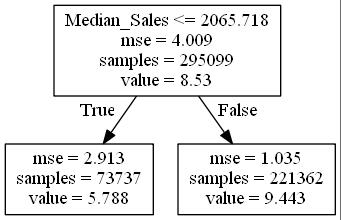

In [425]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='credit_card_tree.jpg')

# Machine Learning Models

# Random Forest¶

In [426]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [427]:
y=np.array(df_full_new['ln_Weekly_Sales'])
y

array([10.12360653, 10.63574847,  9.8732108 , ...,  2.47989411,
        3.68787895,  2.010895  ])

In [428]:
X=np.array(df_full_new.drop(['ln_Weekly_Sales'],axis=1))
X

array([[4.23100000e+01, 2.57200000e+00, 7.24642020e+03, ...,
        0.00000000e+00, 1.76302444e+03, 1.37362605e+03],
       [3.99300000e+01, 2.56500000e+00, 7.24642020e+03, ...,
        1.00000000e+00, 1.76302444e+03, 1.37362605e+03],
       [4.66300000e+01, 2.56500000e+00, 7.24642020e+03, ...,
        1.00000000e+00, 1.76302444e+03, 4.10695000e+03],
       ...,
       [7.57000000e+01, 3.91100000e+00, 1.10244500e+04, ...,
        0.00000000e+00, 1.76302444e+03, 1.37362605e+03],
       [7.57000000e+01, 3.91100000e+00, 1.10244500e+04, ...,
        0.00000000e+00, 1.76302444e+03, 1.37362605e+03],
       [6.78700000e+01, 3.94800000e+00, 1.14079500e+04, ...,
        0.00000000e+00, 1.76302444e+03, 1.37362605e+03]])

In [429]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Random Model

In [430]:
#from sklearn.model_selection import train_test_split
X = selected_features_from_KBest
y = target
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [431]:
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
sc_X = StandardScaler()
X_train = sc_X.fit_transform(train_X)
X_test = sc_X.transform(test_X)

In [432]:
sc_X

StandardScaler(copy=True, with_mean=True, with_std=True)

In [433]:
X_train 

array([[-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
        -0.55945752, -0.58115595],
       [-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
        -0.43718143, -0.32036589],
       [-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
        -0.41531351, -0.66919939],
       ...,
       [-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
         1.32603779,  1.49298474],
       [-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
        -0.64343974, -0.59830327],
       [-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
         0.07529851,  0.01175908]])

In [434]:
X_test

array([[-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
         2.58538536,  1.94532246],
       [-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
         0.76177157,  0.65436216],
       [-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
        -0.75051909, -0.75468534],
       ...,
       [-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
        -0.75249178, -0.75510183],
       [-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
        -0.5180714 , -0.51157545],
       [-0.12391924, -0.12476231, -0.12486033, ..., -0.12137139,
        -0.72259555, -0.72520188]])

In [435]:
param_grid={'max_depth':[1,5,10,15,20,25,30],'n_estimators':[10,50,80],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10], }

In [436]:
RFR=RandomForestRegressor()
model_rf=RandomizedSearchCV(RFR,param_grid,scoring='neg_median_absolute_error',n_jobs=-1,pre_dispatch='2*n_jobs').fit(X_train,train_y)

In [437]:
RFR

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [440]:
model_rf

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [441]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
param_grid={'max_depth':[1,5,10,15,20,25,30],'n_estimators':[20,50,100],
  'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10], }
RFR=RandomForestRegressor()
model_rf=RandomizedSearchCV(RFR,param_grid,scoring='neg_median_absolute_error',n_jobs=-1,pre_dispatch='2*n_jobs').fit(X_train,train_y)

In [442]:
print("Best Hyperparam Values",model_rf.best_params_)
print("Median cross-validated score ",model_rf.best_score_) 

Best Hyperparam Values {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 15}
Median cross-validated score  -0.08972472034050591


In [443]:
random_frgr=RandomForestRegressor(n_estimators=100,min_samples_split=5,min_samples_leaf=2,max_depth=30,n_jobs=-1).fit(X_train,train_y)

In [444]:
random_frgr

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

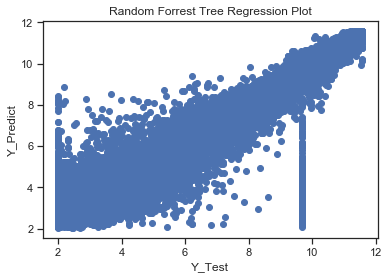

In [445]:
y_pred=random_frgr.predict(X_test)
plt.scatter(test_y,y_pred)
plt.title("Random Forrest Tree Regression Plot")
plt.xlabel("Y_Test")
plt.ylabel("Y_Predict")
plt.show()

In [446]:
from sklearn.metrics import median_absolute_error
print("MAD score : ",median_absolute_error(test_y,y_pred))
print("R2 Score : ",random_frgr.score(X_test,test_y))

MAD score :  0.0950988092174736
R2 Score :  0.9379284528498284


In [447]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=15, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(train_X, train_y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [448]:
print(regr.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.32825294 0.67174706]


In [449]:
print(regr.predict(train_X))

[ 8.62481973  8.62481973  7.27764608 ... 10.29648158  8.62481973
 10.29648158]


In [450]:
from sklearn.ensemble import RandomForestRegressor
regr_reg = RandomForestRegressor(oob_score=False,n_estimators=100 , max_features='auto', n_jobs=None)
regr_reg.fit( train_X, train_y )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [451]:
regr_test_pred = pd.DataFrame( { 'actual':  test_y, 'predicted': regr_reg.predict( test_X ) } )
metrics.completeness_score(regr_test_pred.actual, regr_test_pred.predicted )

0.9800763222961739

In [452]:
metrics.completeness_score

<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

# Feature importance from the Random Forest Model

In [453]:
regr_reg.feature_importances_
indices = np.argsort(regr_reg.feature_importances_)[::-1]

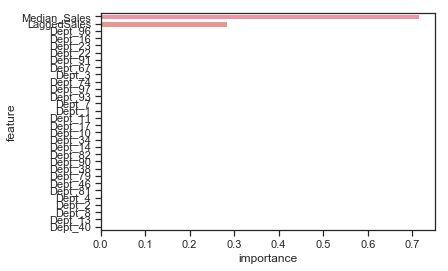

In [454]:
indices = np.argsort(regr_reg.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         regr_reg.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

# Tuning parameters¶

In [455]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [5,6,7,8,9,10,11,12]}

from sklearn.model_selection import learning_curve, GridSearchCV
gscv_Rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [456]:
gscv_results = gscv_Rf.fit(train_X, train_y)
gscv_results.best_score_

-0.25433533469694625

In [457]:
gscv_results.best_params_

{'max_features': 5, 'n_estimators': 100}

In [458]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [459]:
reg = RandomForestRegressor(criterion='mse')
reg.fit(train_X,train_y)
modelPred = reg.predict(train_X)
print(modelPred)
print("Number of predictions:",len(modelPred))
meanSquaredError=mean_squared_error(train_y, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MAPE_train = np.mean(np.abs(train_y - modelPred)/train_y)
print("MAPE:", MAPE_train)
Corr_train = stats.stats.pearsonr(train_y, modelPred)
print("Corr_train:",Corr_train)

[ 8.31825608  9.19463898  7.4812152  ... 10.84675932  7.77252991
  9.7336101 ]
Number of predictions: 295099
MSE: 0.11418124941874339
RMSE: 0.33790716094623297
MAPE: 0.019959259584830163
Corr_train: (0.9856738839486137, 0.0)


In [460]:
reg = RandomForestRegressor(criterion='mse')
reg.fit(test_X,test_y)
modelPred = reg.predict(test_X)
print(modelPred)
print("Number of predictions:",len(modelPred))
meanSquaredError=mean_squared_error(test_y, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MAPE_test = np.mean(np.abs(test_y - modelPred)/test_y)
print("MAPE:",MAPE_test)
Corr_test = stats.stats.pearsonr(test_y, modelPred)
print("Corr_test:",Corr_test)

[11.03900299 10.26687967  3.70408196 ...  3.15774791  8.59040521
  6.61861011]
Number of predictions: 126471
MSE: 0.10239329348814011
RMSE: 0.3199895209036385
MAPE: 0.018831758978464456
Corr_test: (0.9869495752499942, 0.0)


# Gradient Boost

In [461]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve, GridSearchCV
gscv_gbm = GridSearchCV(estimator=GradientBoostingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
gscv_gbm.fit(train_X, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [462]:
gscv_gbm.best_params_

{'max_features': 12, 'n_estimators': 100}

In [463]:
clf_gbm = gscv_gbm.best_estimator_
gscv_gbm.best_score_

-0.23246917647312632

In [464]:
gbm=GradientBoostingRegressor(learning_rate = 0.1, n_estimators=800)
gbm.fit(train_X, train_y )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [465]:
print(pd.Series(cross_val_score(gbm, train_X, train_y, cv=10)).describe()[['min', 'mean', 'max']])

min     0.939159
mean    0.942747
max     0.945280
dtype: float64


# XGBOOST

In [466]:
import xgboost
from xgboost import XGBRegressor

In [467]:
#All Columns
xgb_estimator = XGBRegressor(n_estimators=200,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=0)

In [468]:
train_X = train_X.loc[:,~train_X.columns.duplicated()]

In [469]:
test_X = test_X.loc[:,~test_X.columns.duplicated()] 

In [470]:
xgb_estimator.fit(train_X, train_y)

[10:00:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbose=0, verbosity=1)

In [471]:
xgb_estimator.predict(train_X)

array([ 8.208782,  8.987937,  7.929704, ..., 10.724686,  7.941471,
        9.713728], dtype=float32)

In [472]:
xgb_estimator.predict(test_X)

array([10.943711 , 10.267514 ,  3.5705323, ...,  3.0895271,  8.509745 ,
        6.446494 ], dtype=float32)

In [473]:
metrics.mean_squared_error(train_y,pd.DataFrame(xgb_estimator.predict(train_X)))

0.22323411229759016

In [474]:
metrics.mean_squared_error(test_y,pd.DataFrame(xgb_estimator.predict(test_X)))

0.23021906759474073

In [475]:
print(metrics.mean_squared_error(train_y, xgb_estimator.predict(train_X)))
print(metrics.mean_squared_error(test_y, xgb_estimator.predict(test_X)))

0.22323411229759016
0.23021906759474073


In [476]:
# with all tuning parameters
xgb_estimator = XGBRegressor( learning_rate=0.01,
                               n_estimators=100,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=0)

In [477]:
xgb_estimator.fit(train_X, train_y)

[10:01:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpa=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbose=0, verbosity=1)

In [478]:
print(metrics.mean_squared_error(train_y,pd.DataFrame(xgb_estimator.predict(train_X))))
print(metrics.mean_squared_error(test_y,pd.DataFrame(xgb_estimator.predict(test_X))))

9.464343833502111
9.486351524447173


In [479]:
print(metrics.completeness_score(train_y, xgb_estimator.predict(train_X)))
print(metrics.completeness_score(test_y, xgb_estimator.predict(test_X)))

0.9698041383956478
0.979383485692255
